<font size="5"> Petrophysical calculations in ZZL Breda Fm</font>

<font size="3"> Author: Freek Smit
    
as part of MSc thesis at TU Delft</font>

In [1]:
# Imports
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline
import lasio
import statistics
from collections import Counter

<font size="5">Import data from excel file</font>

In [3]:
file_loc = 'Petrophysics.xlsx'

# KRD-01 well
MD_KRD   = pd.read_excel(file_loc, sheet_name = 'KRD_01', index_col=None, na_values=['NA'], usecols="C").to_numpy()
RHOB_KRD = pd.read_excel(file_loc, sheet_name = 'KRD_01', index_col=None, na_values=['NA'], usecols="D").to_numpy()
NPHI_KRD = pd.read_excel(file_loc, sheet_name = 'KRD_01', index_col=None, na_values=['NA'], usecols="N").to_numpy()
GR_KRD   = pd.read_excel(file_loc, sheet_name = 'KRD_01', index_col=None, na_values=['NA'], usecols="G").to_numpy()

In [40]:
file_loc = 'Petrophysics.xlsx'

# ALE-01 well
MD_ALE   = pd.read_excel(file_loc, sheet_name = 'ALE_01', index_col=None, na_values=['NA'], usecols="C").to_numpy()
RHOB_ALE = pd.read_excel(file_loc, sheet_name = 'ALE_01', index_col=None, na_values=['NA'], usecols="D").to_numpy()
NPHI_ALE = pd.read_excel(file_loc, sheet_name = 'ALE_01', index_col=None, na_values=['NA'], usecols="N").to_numpy()
GR_ALE   = pd.read_excel(file_loc, sheet_name = 'ALE_01', index_col=None, na_values=['NA'], usecols="G").to_numpy()

In [5]:
file_loc = 'Petrophysics.xlsx'

# RST-01 well
MD_RST   = pd.read_excel(file_loc, sheet_name = 'RST_01', index_col=None, na_values=['NA'], usecols="C").to_numpy()
RHOB_RST = pd.read_excel(file_loc, sheet_name = 'RST_01', index_col=None, na_values=['NA'], usecols="D").to_numpy()
GR_RST   = pd.read_excel(file_loc, sheet_name = 'RST_01', index_col=None, na_values=['NA'], usecols="G").to_numpy()
DT_RST   = pd.read_excel(file_loc, sheet_name = 'RST_01', index_col=None, na_values=['NA'], usecols="T").to_numpy()

In [5]:
file_loc = 'Petrophysics.xlsx'

# NDN-120 well
MD_NDN      = pd.read_excel(file_loc, sheet_name = 'NDN_120', index_col=None, na_values=['NA'], usecols="C").to_numpy()
RHOB_NDN    = pd.read_excel(file_loc, sheet_name = 'NDN_120', index_col=None, na_values=['NA'], usecols="D").to_numpy()
GR_NDN      = pd.read_excel(file_loc, sheet_name = 'NDN_120', index_col=None, na_values=['NA'], usecols="G").to_numpy()

In [6]:
file_loc = 'Petrophysics.xlsx'

# WSP-01 well
MD_WSP   = pd.read_excel(file_loc, sheet_name = 'WSP_01', index_col=None, na_values=['NA'], usecols="C").to_numpy()
RHOB_WSP = pd.read_excel(file_loc, sheet_name = 'WSP_01', index_col=None, na_values=['NA'], usecols="D").to_numpy()
GR_WSP   = pd.read_excel(file_loc, sheet_name = 'WSP_01', index_col=None, na_values=['NA'], usecols="G").to_numpy()
DT_WSP   = pd.read_excel(file_loc, sheet_name = 'WSP_01', index_col=None, na_values=['NA'], usecols="T").to_numpy()

In [7]:
file_loc = 'Petrophysics.xlsx'

# BLA-01 well
MD_BLA = pd.read_excel(file_loc, sheet_name = 'BLA_01', index_col=None, na_values=['NA'], usecols="C").to_numpy()
DT_BLA = pd.read_excel(file_loc, sheet_name = 'BLA_01', index_col=None, na_values=['NA'], usecols="B").to_numpy()
#SP_BLA = 
GR_BLA = pd.read_excel(file_loc, sheet_name = 'BLA_01', index_col=None, na_values=['NA'], usecols="G").to_numpy()

In [4]:
file_loc = 'Petrophysics.xlsx'

# LEL-01 well
MD_LEL = pd.read_excel(file_loc, sheet_name = 'LEL_01', index_col=None, na_values=['NA'], usecols="C").to_numpy()
DT_LEL = pd.read_excel(file_loc, sheet_name = 'LEL_01', index_col=None, na_values=['NA'], usecols="B").to_numpy()
GR_LEL = pd.read_excel(file_loc, sheet_name = 'LEL_01', index_col=None, na_values=['NA'], usecols="G").to_numpy()

In [72]:
file_loc = 'Petrophysics.xlsx'

# MID-101 & MID-201
MD_MID1 = pd.read_excel(file_loc, sheet_name = 'MID', index_col=None, na_values=['NA'], usecols="C").to_numpy()
MD_MID2 = pd.read_excel(file_loc, sheet_name = 'MID', index_col=None, na_values=['NA'], usecols="G").to_numpy()
DT_MID1 = pd.read_excel(file_loc, sheet_name = 'MID', index_col=None, na_values=['NA'], usecols="B").to_numpy()
DT_MID2 = pd.read_excel(file_loc, sheet_name = 'MID', index_col=None, na_values=['NA'], usecols="F").to_numpy()
GR_MID1 = pd.read_excel(file_loc, sheet_name = 'MID', index_col=None, na_values=['NA'], usecols="D").to_numpy()
GR_MID2 = pd.read_excel(file_loc, sheet_name = 'MID', index_col=None, na_values=['NA'], usecols="H").to_numpy()

In [10]:
file_loc = 'Petrophysics.xlsx'

# ZEW-01 well
MD_ZEW = pd.read_excel(file_loc, sheet_name = 'ZEW_01', index_col=None, na_values=['NA'], usecols="C").to_numpy()
DT_ZEW = pd.read_excel(file_loc, sheet_name = 'ZEW_01', index_col=None, na_values=['NA'], usecols="B").to_numpy()
GR_ZEW = pd.read_excel(file_loc, sheet_name = 'ZEW_01', index_col=None, na_values=['NA'], usecols="G").to_numpy()

In [11]:
file_loc = 'Petrophysics.xlsx'

# OFL-01 well
MD_OFL = pd.read_excel(file_loc, sheet_name = 'OFL_01', index_col=None, na_values=['NA'], usecols="C").to_numpy()
DT_OFL = pd.read_excel(file_loc, sheet_name = 'OFL_01', index_col=None, na_values=['NA'], usecols="B").to_numpy()
GR_OFL = pd.read_excel(file_loc, sheet_name = 'OFL_01', index_col=None, na_values=['NA'], usecols="G").to_numpy()

In [12]:
file_loc = 'Petrophysics.xlsx'

# DRO-01 well
MD_DRO = pd.read_excel(file_loc, sheet_name = 'DRO_01', index_col=None, na_values=['NA'], usecols="C").to_numpy()
DT_DRO = pd.read_excel(file_loc, sheet_name = 'DRO_01', index_col=None, na_values=['NA'], usecols="B").to_numpy()
GR_DRO = pd.read_excel(file_loc, sheet_name = 'DRO_01', index_col=None, na_values=['NA'], usecols="G").to_numpy()

In [13]:
file_loc = 'Petrophysics.xlsx'

# NAG-01 well
MD_NAG = pd.read_excel(file_loc, sheet_name = 'NAG_01', index_col=None, na_values=['NA'], usecols="C").to_numpy()
DT_NAG = pd.read_excel(file_loc, sheet_name = 'NAG_01', index_col=None, na_values=['NA'], usecols="B").to_numpy()
GR_NAG = pd.read_excel(file_loc, sheet_name = 'NAG_01', index_col=None, na_values=['NA'], usecols="G").to_numpy()

In [69]:
file_loc = 'Petrophysics.xlsx'

# SLD-01 well
MD_SLD = pd.read_excel(file_loc, sheet_name = 'SLD_01', index_col=None, na_values=['NA'], usecols="C").to_numpy()
DT_SLD = pd.read_excel(file_loc, sheet_name = 'SLD_01', index_col=None, na_values=['NA'], usecols="B").to_numpy()
GR_SLD = pd.read_excel(file_loc, sheet_name = 'SLD_01', index_col=None, na_values=['NA'], usecols="G").to_numpy()

In [2]:
file_loc = 'Petrophysics.xlsx'

# EPE-01 well
MD_EPE   = pd.read_excel(file_loc, sheet_name = 'EPE_01', index_col=None, na_values=['NA'], usecols="C").to_numpy()
RHOB_EPE = pd.read_excel(file_loc, sheet_name = 'EPE_01', index_col=None, na_values=['NA'], usecols="D").to_numpy()
GR_EPE   = pd.read_excel(file_loc, sheet_name = 'EPE_01', index_col=None, na_values=['NA'], usecols="G").to_numpy()

<font size="5">Process data</font>

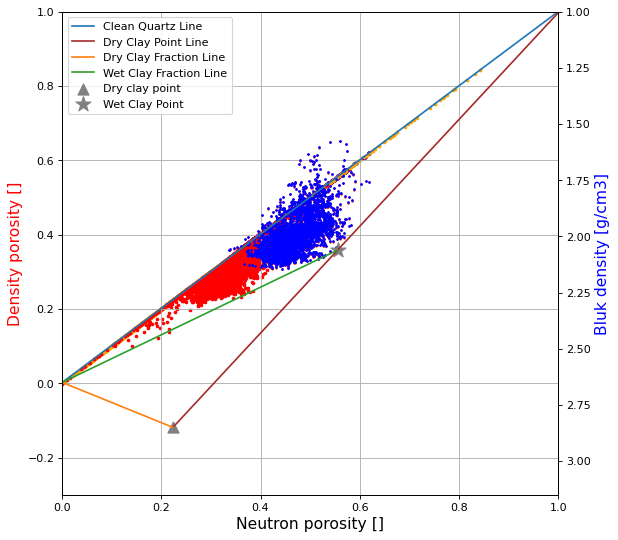

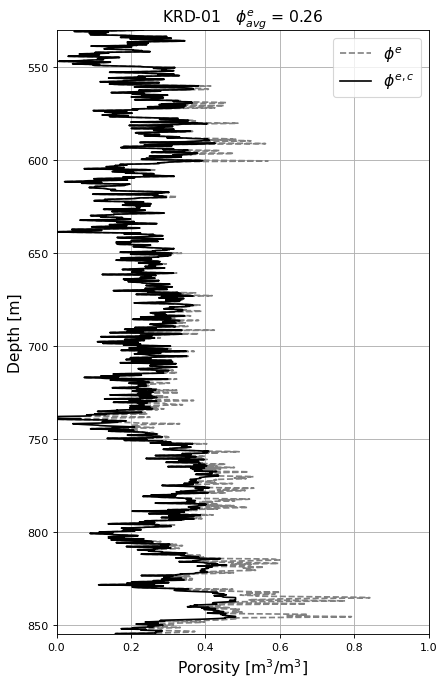

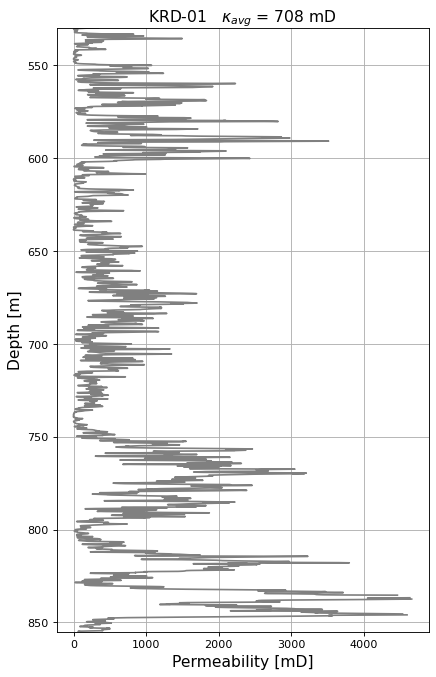

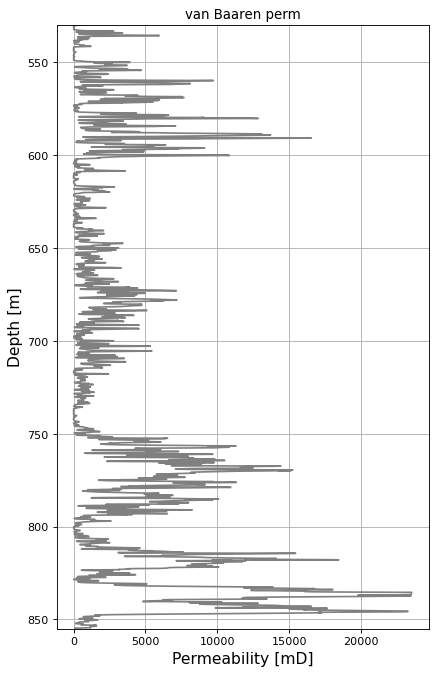

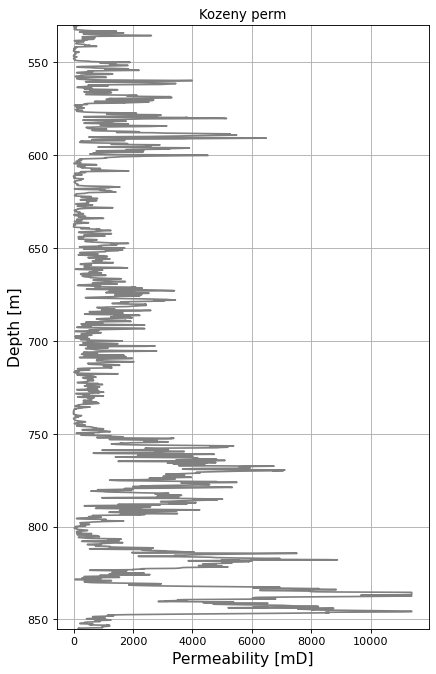

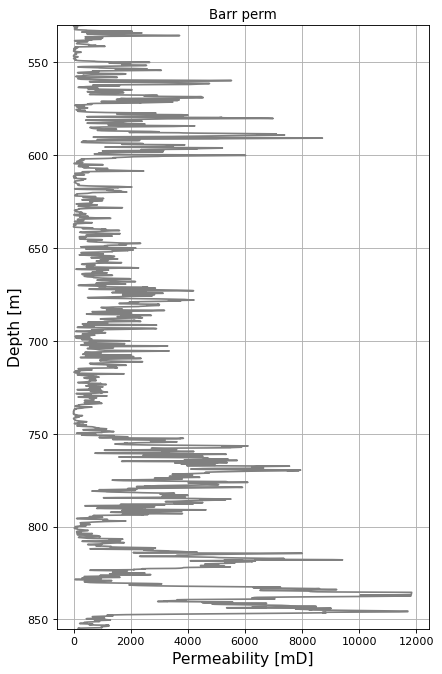

708.474595230597 2853.4421317353685 1571.121985388311 1810.6668351396322
GRV = 324.90 m, Net sand = 256.90 m, Net sand frac = 0.79


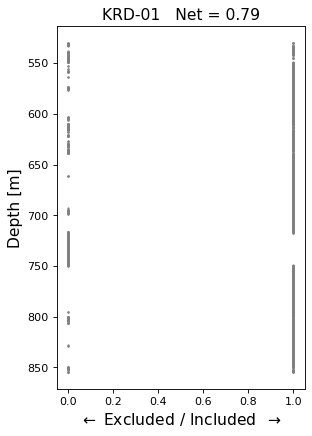

In [10]:
" Petrophysics in KRD-01 well " 

# Depth
MD = MD_KRD[2:-1]                              # Depth column without header [m]

# Top, middle and bottom boundaries and corresponding indeces
LMU = 530                                      # Late Miocene Unconformity in well KRD-01 [m depth]
index_LMU = int(np.where(MD==LMU)[0])
MMU = 750                                      # Mid Miocene Unconformity in well KRD-01[m depth]
index_MMU = int(np.where(MD==MMU)[0])
EMU = 855                                      # Early Miocene Unconformity in well KRD-01[m depth]
index_EMU = int(np.where(MD==EMU)[0])

MD_krd = MD[index_LMU:index_EMU]

## Bulk density and Neutron porosity
start_RHOB = 2304                                   # Starting index bulk density porosity log
RHOB = RHOB_KRD[index_LMU:index_EMU]                # Bulk density     [g/cm3]
NPHI = NPHI_KRD[index_LMU:index_EMU]                # Neutron porosity [fraction]

## Calculate Density porosity (RHOP)
RHO_ma = 2.65                                       # matrix density [g/cm3], initial guess = 2.65 g/cm3
RHO_fl = 1.001                                        # !! fluid density  [g/cm3]
RHOP = (RHO_ma-RHOB)/(RHO_ma-RHO_fl)                # Density porosity over full depth interval [fraction]


## Ternary diagram calculations
x    = np.linspace(0.00,1.01,len(NPHI))        # X value for plotting
# Clean Quartz line (CQL)
QD = 2.65                                      # Quartz density [g/cm3]
CQL  = -1.65*x + QD                            # Clean quartz line
# Dry clay point line (DCPL)
point_DCPL = [0.6, 1.95]                        # Reference point DCPL
slope_DCPL = -(point_DCPL[1]-1)/(1-point_DCPL[0])   # Slope of the Dry clay point line
b = 3.38                                       # Starting point DCPL. b was guessed itteratively
DCPL = slope_DCPL*x + b                        # Dry clay point line
DCPD = 2.85                                    # Dry clay point density (should be determined from GR log) [g/cm3]
DCP  = [(DCPD-b)/slope_DCPL, DCPD]             # Dry clay point [g/cm3]
for i in range(len(DCPL)):                          
    if DCPL[i] > DCPD:                              # Loop to make DCPL stop at DCP
        DCPL[i] = "NaN"
# Dry Clay Fraction Line (DCFL)
slope_DCFL = ((DCP[1]-QD)/DCP[0])              # Slope for Dry clay fraction line
DCFL = slope_DCFL*x + 2.65                     # Dry clay fraction line
for i in range(len(DCFL)):
    if DCFL[i] > DCPD:                              # Loop to make DCFL stop at DCP
        DCFL[i] = "NaN"
# Total porosity (RHOT)
RHOT = np.zeros(len(NPHI))                     # Total porosity []
for i in range(len(NPHI)):
#    parallel_DCFL = slope_DCFL*(x-NPHI[i]) + RHOB[i]  # compute parallel lines to DCFL trough all points
    RHOT[i] = (-slope_DCFL*NPHI[i] + RHOB[i] - QD) / (-1.65 - slope_DCFL)  # Compute total porosity
    
## Wet clay point calculations
# Wet clay fraction line (WCFL)
point_WCFL = [0.5, 2.12]                       # Reference point WCFL
slope_WCFL = (QD - point_WCFL[1]) / point_WCFL[0]     # Slope for Wet Clay Fraction Line
WCFL = -slope_WCFL*x + 2.65                    # Wet Clay Fraction Line
WCPx = (2.65 - b)/(slope_WCFL + slope_DCPL)    # Calculate intersection between WCFL and DCPL
WCPD = -slope_WCFL*WCPx + 2.65                 # Calculate density of WCP
WCP = [WCPx, WCPD]                             # Wet clay point
for i in range(len(WCFL)):
    if WCFL[i] < WCPD:                              # Loop to make WCFL stop at WCP
        WCFL[i] = "NaN"
# Effective porosity (RHOE)
RHOE = np.zeros(len(NPHI))                     # Initiate effective porosity
for i in range(len(NPHI)):
#    parallel_WCFL = -slope_WCFL*(x-NPHI[i]) + RHOB[i]  # compute parallel lines to WCFL trough all points
    RHOE[i] = (slope_WCFL*NPHI[i] + RHOB[i] - QD) / (-1.65 + slope_WCFL)  # Compute Effective porosity []
    if RHOE[i] < 0:
        RHOE[i] = 0
    
## Vclay
GR = GR_KRD[2:-1]
GR = GR[index_LMU:index_EMU]
#Calculating ‘N’ and Plotting ‘N’ versus Gamma Ray
#N = (ΦNf - ΦN) / (ρb - ρfluid)                    # Plotting 'N' vs GR can aid in determining GRss and GRsh
# Vclay calculation
GRss = 22                                          # Minimum GR reading (manualy interpreted from Petrel log)
GRsh = max(GR)                                     # Maximum GR reading (manualy interpreted from Petrel log)
GRI = (GR - GRss) / (GRsh - GRss)                  # Gamma ray index
#Vcl_krd = GRI                                      # Assuming linear relationship
Vcl_krd = GRI / (3 - 2*GRI)                   # Assuming Stieber

## Clay and gas correction from Gamma ray log
# Correcting for Clay
WCP_RHOP = (RHO_ma-WCPD)/(RHO_ma-RHO_fl)           # Density porosity value wet clay point      
RHOP_cor = RHOP - Vcl_krd*(WCP_RHOP)               # Density porosity values corrected for clay volume
NPHI_cor = NPHI - Vcl_krd*(WCPx)                   # Neutron porosity values corrected for clay volume
# Gas effect --> Any corrected point above CQL is affected by gas
y_CQL = x                                          # Clean quartz line in density porosity units
for i in range(len(RHOP_cor)):
    if RHOP_cor[i] > NPHI_cor[i]:                  # Select only the points above the clean quartz line
        b2      = RHOP_cor[i] + (2/3)*NPHI_cor[i]
        gasline = -(2/3)*x + b2                    # formula for gas line. Slope is predetermined: -0.66667 (Ransom, 156)
        gas_x   =  (3/5)*b2                        # Intersection between gas line and clean quartz line
        gas_y   = gas_x                            # x intersection = y intersection because it's on the y=x CQL line
        RHOP_cor[i] = gas_y                        # Replace gas-effected RHOP points by new values
        NPHI_cor[i] = gas_x                        # Replace gas-effected NPHI points by new values

## Recalculate effective porosity
RHOB_cor = RHO_ma - RHOP_cor*(RHO_ma - RHO_fl)     # Calculate corrected values for RHOB
RHOE_cor = np.zeros(len(NPHI))                     # Initiate recalculated RHOE
for i in range(len(NPHI)):
    RHOE_cor[i] = (slope_WCFL*NPHI_cor[i] + RHOB_cor[i] - QD) / (-1.65 + slope_WCFL)  # Compute recalc. effective porosity []
    if RHOE_cor[i] < 0:
        RHOE_cor[i] = 0
    if RHOE_cor[i] > 0.48:
        RHOE_cor[i] = 0.481

phi_avg = np.mean(RHOE_cor)


## Cross plot Denisty vs Neutron porosity and Ternary diagram

# Plot Density porosity vs Neutron porosity (left y-axis)
fig1,ax = plt.subplots(1, figsize = (8,8), dpi=80)
ax.scatter(NPHI, RHOP, s = 1, color = 'red')
ax.set_xlabel('Neutron porosity []',fontsize=14)
ax.set_ylabel('Density porosity []',color="red",fontsize=14)
plt.xlim(0.0, 1.0)
ax.set_ylim(-0.3, 1.0)

# Plot Bluk density vs Neutron porosity (right y-axis)
ax2=ax.twinx()
ax2.scatter(NPHI,RHOB, s = 2, color = 'blue')
ax2.set_ylabel('Bluk density [g/cm3]',color="blue",fontsize=14)
ax2.set_ylim(1.0, 3.15)
ax2.invert_yaxis()

# Plot Ternary diagram and Total porosity
ax2.plot(x,CQL, label = 'Clean Quartz Line')
ax2.plot(x,DCPL,label = 'Dry Clay Point Line', color = 'brown')
ax2.plot(x,DCFL,label = 'Dry Clay Fraction Line')
ax2.scatter(DCP[0],DCP[1], s = 100, c = 'grey', marker = '^', label = 'Dry clay point')
ax.scatter(RHOT,RHOT, color = 'purple', s = 10)

# Plot Wet Clay Line and Effective porosity
ax2.plot(x,WCFL, label = 'Wet Clay Fraction Line')
ax.scatter(RHOE,RHOE, color = 'orange', s = 5)
ax2.scatter(WCP[0], WCP[1], s = 200, c = 'grey', marker = "*", label = 'Wet Clay Point')

# Plot clay and gas corrected points
ax.scatter(NPHI_cor,RHOP_cor, color = 'red', s = 5)

# Plotting lay-out extras and saving
#plt.title('Density Neutron cross plot, KRD-01')
ax2.legend()
ax.grid()
plt.show()
fig1.savefig('FDCCNL_KRD-01.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## Plot porosity vs depth
fig2 = plt.figure(2, figsize = (6,10), dpi=80)
#plt.plot(RHOP, MD[index_LMU:index_EMU], label = 'Density porosity')
#plt.plot(RHOT,MD[index_LMU:index_EMU], '--', label = 'Total porosity')
plt.plot(RHOE,MD[index_LMU:index_EMU], '--', c = 'grey',label = '$\phi^e$')
plt.plot(RHOE_cor,MD[index_LMU:index_EMU], c = 'black'  ,label = '$\phi^{e,c}$')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]',fontsize=14)
plt.xlabel('Porosity [m$^3$/m$^3$]', fontsize=14)
plt.title('KRD-01   $\phi_{avg}^{e}$ = '+ str("%.2f" % phi_avg), fontsize = 14)
plt.legend(fontsize=14)
plt.grid()
plt.xlim(0,1)
plt.ylim(EMU,LMU)
plt.show()
fig2.savefig('PorDepth_KRD-01.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## Permeability
# Kozeny-Carman
sph = 0.58                                   # Sphericity, chosen as constant from literature (Rorato et al., 2019)
i_top = np.where(LMU>M_smooth)[0][0]         # Index grain size at top 
i_bot = np.where(EMU>M_smooth)[0][0]          # Index grain size at bottom
Dpmax = xnew_M[i_top]                        # Grain size at top of this well, based on top depth (um)
Dpmin = xnew_M[i_bot]                        # Grain size at bot of this well, based on bottom depth (um)
Dp    = np.linspace(Dpmax,Dpmin,len(RHOE_cor)) # !! Grain sizes over depth interval in this well (um)
K = np.zeros(len(RHOE_cor))                     # Initiate permeability (mD)
K2 = np.zeros(len(RHOE_cor))                    # Initiate additional perm for impermeable clay situation (mD)
for i in range(len(RHOE_cor)):
    K[i] = sph**2 * (RHOE_cor[i]**3 * (Dp[i]/1e6)**2) / (150*(1-RHOE_cor[i])**2)*1.01324997e15   # !! Calculate perm trough Kozeny-Carman with Darcy (mD)
    K2[i] = sph**2 * (RHOE_cor[i]**3 * (Dp[i]/1e6)**2) / (150*(1-RHOE_cor[i])**2)*1.01324997e15
    if RHOE_cor[i] > 0.48:
        K[i] = 'nan'
        K2[i] = 'nan'
K_avg = round(np.nanmean(K))

# van Baaren equation:
C = 0.7
m = 1.4
K_vb = 10 * Dp**2 * C**(-3.64) * (m+3.64) * RHOE_cor**(m+3.64)
# Kozeny equation:
K_k = np.zeros(len(RHOE_cor))                     # !! initiate
for i in range(len(RHOE_cor)):                    # !!
    K_k[i] = 5.53 * Dpmin**2 * (RHOE_cor[i]**3 /(1-RHOE_cor[i])**2)
# Barr equation
Cs = 1
K_b = (1/(36*5*Cs) * (RHOE_cor**3 / (1-RHOE_cor)**2) * (Dp/1e6)**2) *1.01324997e15        


# Plot permeability vs depth
plt.figure(3, figsize = (6,10), dpi=80)        
plt.plot(K,MD[index_LMU:index_EMU], c = 'grey')
plt.gca().invert_yaxis()
#plt.title('Kozeny-Carman perm')
plt.title('KRD-01   $\kappa_{avg}$ = '+ str(K_avg) + ' mD', fontsize = 14)
plt.ylabel('Depth [m]',fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.ylim(EMU,LMU)
plt.grid()
plt.show()

plt.figure(4, figsize = (6,10), dpi=80)        
plt.plot(K_vb,MD[index_LMU:index_EMU], c = 'grey')
plt.gca().invert_yaxis()
plt.title('van Baaren perm')
plt.ylabel('Depth [m]',fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.ylim(EMU,LMU)
plt.grid()
plt.show()

plt.figure(5, figsize = (6,10), dpi=80)        
plt.plot(K_k,MD[index_LMU:index_EMU], c = 'grey')
plt.gca().invert_yaxis()
plt.title('Kozeny perm')
plt.ylabel('Depth [m]',fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.ylim(EMU,LMU)
plt.grid()
plt.show()

plt.figure(6, figsize = (6,10), dpi=80)        
plt.plot(K_b,MD[index_LMU:index_EMU], c = 'grey')
plt.gca().invert_yaxis()
plt.title('Barr perm')
plt.ylabel('Depth [m]',fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.ylim(EMU,LMU)
plt.grid()
plt.show()
print(np.nanmean(K),np.mean(K_vb),np.mean(K_k),np.mean(K_b))

## Net sand
MD_steps = np.zeros(len(MD_krd))
for i in range(0,len(MD_krd)-1):
    MD_steps[i] = MD_krd[i+1] - MD_krd[i]          # Make array of each depth entry and its depth increase
GRV = sum(MD_steps)                                # Safe GRV for this well. Used later for fraction

for i in range(len(MD_krd)):
    if RHOE_cor[i] < 0.15 or Vcl_krd[i] > 0.35:    # Define porosity and Vcl cutoff
        MD_steps[i] = 0                            # Apply cutoffs

MD_net = sum(MD_steps)                             # Compute net sand value
MD_netfrac = MD_net / GRV                          # Compute net sand fraction
# Print outcome
print('GRV =', "%.2f" % GRV, 'm, Net sand =', "%.2f" % MD_net, 'm, Net sand frac =', "%.2f" % MD_netfrac)
# Compute export net sand
Net_exp = MD_steps
for i in range(len(MD_steps)):
    if MD_steps[i] > 0:
        Net_exp[i] = 1                           # Create array where included cells are 1 and excluded cells 0
        
## New permeability for non reservoir rock
for i in range(len(Net_exp)):
    if Net_exp[i] == 0:
        K2[i] = 10
        

plt.figure(7, figsize = (4,6), dpi=80)
plt.scatter(Net_exp, MD_krd, c = 'grey', s = 1)
plt.gca().invert_yaxis()
plt.title('KRD-01   Net = '+ str("%.2f" % MD_netfrac), fontsize = 14)
plt.ylabel('Depth [m]', fontsize = 14)
plt.xlabel(r'$\leftarrow$ Excluded / Included $\;\rightarrow$', fontsize = 14)
plt.show()

## Export to las file
MD_final = np.zeros(len(K))
for i in range(len(K)):
    MD_final[i] = MD[index_LMU:index_EMU][i]

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Phi eff', RHOE_cor, unit = 'm3/m3', descr = 'Porosity') # !!
las.add_curve('Perm', K, unit = 'mD', descr = 'Permeability')
las.add_curve('NTG', Net_exp , unit = ' ', descr = 'NTG')
las.write('KRD_01_porperm.las', version=2) # !!

In [204]:
phi_krd = RHOE_cor

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Perm', K2, unit = 'mD', descr = 'Permeability') # Impermeable clay boundary
las.write('KRD_01_porperm2.las', version=2) # Write to impermeable clay boundary!

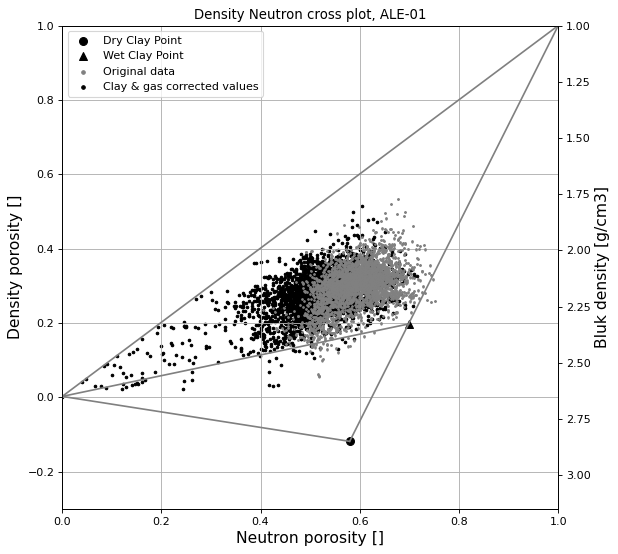

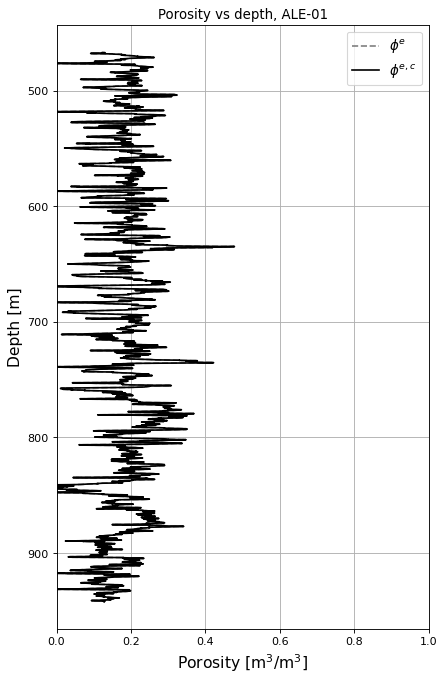

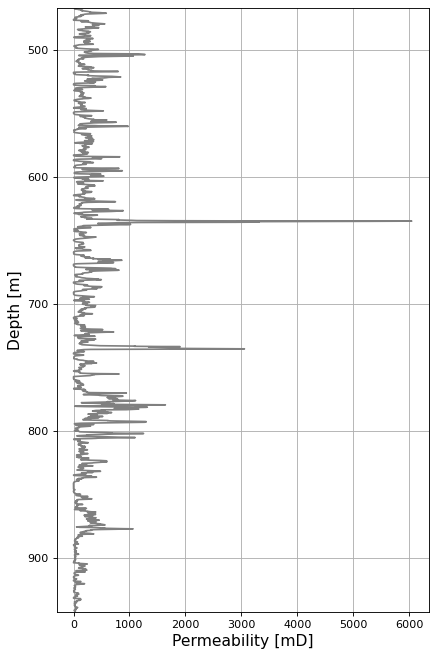

Mean K value = 222.54461046651804 mD
GRV = 474.88 m, Net sand = 339.85 m, Net sand frac = 0.72


In [59]:
" Petrophysics in ALE-01 well "
## Depth
MD = MD_ALE[2:-1]                                       # Depth column without header [m]

## Top, middle and bottom boundaries and corresponding indeces
LMU = 467.106                                           # Late Miocene Unconformity in well ALE-01 [m depth]
index_LMU = int(np.where(MD==LMU)[0])
MMU = 401.574                                           # Mid Miocene Unconformity in well ALE-01[m depth]
index_MMU = int(np.where(MD==MMU)[0]) 
EMU = 942.137                                           # Early Miocene Unconformity in well ALE-01[m depth]
index_EMU = int(np.where(MD==EMU)[0])

MD_ale = MD[index_LMU:index_EMU]

## Bulk density and Neutron porosity
start_RHOB = 2304                                   # Starting index bulk density porosity log
RHOB = RHOB_ALE[index_LMU:index_EMU]                # Bulk density     [g/cm3]
NPHI = NPHI_ALE[index_LMU:index_EMU]                # Neutron porosity [fraction]

## Calculate Density porosity (RHOP)
RHO_ma = 2.65                                       # matrix density [g/cm3], initial guess = 2.65 g/cm3
RHO_fl = 1.003                                      # fluid density  [g/cm3], based on 3000 ppm salinity measured in well KRD-01
RHOP = (RHO_ma-RHOB)/(RHO_ma-RHO_fl)                # Density porosity over full depth interval [fraction]

## Ternary diagram calculations
x    = np.linspace(0.00,1.01,len(NPHI))             # X value for plotting
# Clean Quartz line (CQL)
QD = 2.65                                           # Quartz density [g/cm3]
CQL  = -1.65*x + QD                                 # Clean quartz line
# Dry clay point line (DCPL)                            
point_DCPL = [0.75, 2.10]                           # Reference point for DCPL
slope_DCPL = -(point_DCPL[1] - 1)/(1 - point_DCPL[0])    # Slope of the Dry clay point line
b = 5.4                                             # Starting point DCPL. b was guessed itteratively
DCPL = slope_DCPL * x + b
DCPD = 2.85                                         # Dry clay point density (should be determined from GR log) [g/cm3]
DCP  = [(DCPD-b)/slope_DCPL, DCPD]                  # Dry clay point [g/cm3]
for i in range(len(DCPL)):                          
    if DCPL[i] > DCPD:                              # Loop to make DCPL stop at DCP
        DCPL[i] = "NaN"
# Dry Clay Fraction Line (DCFL)
slope_DCFL = ((DCP[1]-QD)/DCP[0])                   # Slope for Dry clay fraction line
DCFL = slope_DCFL*x + 2.65                          # Dry clay fraction line
for i in range(len(DCFL)):
    if DCFL[i] > DCPD:                              # Loop to make DCFL stop at DCP
        DCFL[i] = "NaN"
# Total porosity (RHOT)
RHOT = np.zeros(len(NPHI))                          # Total porosity []
for i in range(len(NPHI)): 
#    parallel_DCFL = slope_DCFL*(x-NPHI[i]) + RHOB[i]  # compute parallel lines to DCFL trough all points
    RHOT[i] = (-slope_DCFL*NPHI[i] + RHOB[i] - QD) / (-1.65 - slope_DCFL)  # Compute total porosity

## Wet clay point calculations
# Wet clay fraction line (WCFL)
point_WCFL = [0.65, 2.35]     
slope_WCFL = (QD - point_WCFL[1]) / point_WCFL[0]   # Slope for Wet Clay Fraction Line
WCFL = -slope_WCFL*x + 2.65                         # Wet Clay Fraction Line
WCPx = (2.65 - b)/(slope_WCFL + slope_DCPL)         # Calculate intersection between WCFL and DCPL
WCPD = -slope_WCFL*WCPx + 2.65                      # Calculate density of WCP
WCP = [WCPx, WCPD]                                  # Wet clay point
for i in range(len(WCFL)):
    if WCFL[i] < WCPD:                              # Loop to make WCFL stop at WCP
        WCFL[i] = "NaN"
# Effective porosity (RHOE)
RHOE = np.zeros(len(NPHI))                          # Initiate effective porosity
for i in range(len(NPHI)):
#    parallel_WCFL = -slope_WCFL*(x-NPHI[i]) + RHOB[i]  # compute parallel lines to WCFL trough all points
    RHOE[i] = (slope_WCFL*NPHI[i] + RHOB[i] - QD) / (-1.65 + slope_WCFL)  # Compute Effective porosity []
    if RHOE[i] < 0:
        RHOE[i] = 0

## Vclay
GR = GR_ALE[2:-1]
GR = GR[index_LMU:index_EMU]
#Calculating ‘N’ and Plotting ‘N’ versus Gamma Ray
#N = (ΦNf - ΦN) / (ρb - ρfluid)                    # Plotting 'N' vs GR can aid in determining GRss and GRsh
# Vclay calculation
GRss = 22.05                                       # !! Minimum GR reading (manualy interpreted from Petrel log)
GRsh = 72.28                                       # Maximum GR reading (manualy interpreted from Petrel log)
GRI = (GR - GRss) / (GRsh - GRss)                  # Gamma ray index
#Vcl_ale = GRI                                      # Assuming linear relationship
Vcl_ale = GRI / (3 - 2*GRI)                   # Assuming Stieber

## Clay and gas correction from Gamma ray log
# Correcting for Clay
WCP_RHOP = (RHO_ma-WCPD)/(RHO_ma-RHO_fl)           # Density porosity value wet clay point      
RHOP_cor = RHOP - Vcl_ale*(WCP_RHOP)                   # Density porosity values corrected for clay volume
NPHI_cor = NPHI - Vcl_ale*(WCPx)                       # Neutron porosity values corrected for clay volume
# Gas effect --> Any corrected point above CQL is affected by gas
y_CQL = x                                          # Clean quartz line in density porosity units
for i in range(len(RHOP_cor)):
    if RHOP_cor[i] > NPHI_cor[i]:                  # Select only the points above the clean quartz line
        b2      = RHOP_cor[i] + (2/3)*NPHI_cor[i]
        gasline = -(2/3)*x + b2                    # formula for gas line. Slope is predetermined: -0.66667 (Ransom, 156)
        gas_x   =  (3/5)*b2                        # Intersection between gas line and clean quartz line
        gas_y   = gas_x                            # x intersection = y intersection because it's on the y=x CQL line
        RHOP_cor[i] = gas_y                        # Replace gas-effected RHOP points by new values
        NPHI_cor[i] = gas_x                        # Replace gas-effected NPHI points by new values
        
## Recalculate effective porosity
RHOB_cor = RHO_ma - RHOP_cor*(RHO_ma - RHO_fl)     # Calculate corrected values for RHOB
RHOE_cor = np.zeros(len(NPHI))                     # Initiate recalculated RHOE
for i in range(len(NPHI)):
    RHOE_cor[i] = (slope_WCFL*NPHI_cor[i] + RHOB_cor[i] - QD) / (-1.65 + slope_WCFL)  # Compute recalc. effective porosity []
    if RHOE_cor[i] < 0:
        RHOE_cor[i] = 0
    if RHOE_cor[i] > 0.48:
        RHOE_cor[i] = 0.481
    
## Cross plot Denisty vs Neutron porosity, Ternary diagram and WCFL

# Plot Density porosity vs Neutron porosity (left y-axis)
fig1,ax = plt.subplots(1, figsize = (8,8), dpi=80)
ax.scatter(NPHI, RHOP, s = 1, color = 'grey')
ax.set_xlabel('Neutron porosity []',fontsize=14)
ax.set_ylabel('Density porosity []',fontsize=14)
ax.set_xlim(0.0, 1.0)
ax.set_ylim(-0.3, 1.0)

# Plot Bluk density vs Neutron porosity (right y-axis)
ax2=ax.twinx()
ax2.scatter(NPHI,RHOB, s = 2, color = 'grey')
ax2.set_ylabel('Bluk density [g/cm3]',fontsize=14)
ax2.set_ylim(1.0, 3.15)
ax2.invert_yaxis()

# Plot Ternary diagram and Total porosity
ax2.plot(x,CQL, color = 'grey') # Clean Quartz Line
ax2.plot(x,DCPL, color = 'grey') # Dry Clay Point Line
ax2.plot(x,DCFL, color = 'grey') # Dry Clay Fraction Line
ax2.scatter(DCP[0],DCP[1], s = 50, color = 'black', label = 'Dry Clay Point')
#ax.scatter(RHOT,RHOT, color = 'purple', s = 10)

# Plot Wet Clay Line and Effective porosity
ax2.plot(x,WCFL, color = 'grey') # Wet Clay Fraction Line'
#ax.scatter(RHOE,RHOE, color = 'orange', s = 5)
ax2.scatter(WCP[0], WCP[1], marker = '^', s = 50, color = 'black', label = 'Wet Clay Point')

# Plot clay and gas corrected points
ax.scatter(NPHI_cor,RHOP_cor, color = 'black', s = 5)
ax2.scatter(20,20, s=10, color = 'grey', label = 'Original data')
ax2.scatter(20,20, color = 'black', s = 10, label = 'Clay & gas corrected values') # For labelling

# Plotting lay-out extras and saving
plt.title('Density Neutron cross plot, ALE-01')
ax2.legend()
ax.grid()
plt.show()
fig1.savefig('FDCCNL_ALE-01.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## Plot porosity vs depth
fig2 = plt.figure(2, figsize = (6,10), dpi=80)
#plt.plot(RHOP, MD[index_LMU:index_EMU], label = 'Density porosity')
#plt.plot(RHOT,MD[index_LMU:index_EMU], '--', label = 'Total porosity')
plt.plot(RHOE,MD[index_LMU:index_EMU], '--', c = 'grey', label = '$\phi^e$')
plt.plot(RHOE_cor,MD[index_LMU:index_EMU], c = 'black' , label = '$\phi^{e,c}$')
#plt.plot(NPHI,MD[index_LMU:index_EMU], label = 'Neutron porosity')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]',fontsize=14)
plt.xlabel('Porosity [m$^3$/m$^3$]',fontsize=14)
plt.title('Porosity vs depth, ALE-01')
plt.legend(fontsize=12)
plt.grid()
plt.xlim(0,1)
plt.show()
fig2.savefig('PorDepth_ALE-01.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## Permeability
sph = 0.58                                   # Sphericity, chosen as constant from literature (Rorato et al., 2019)
i_top = np.where(LMU>M_smooth)[0][0]         # Index grain size at top 
i_bot = np.where(EMU>M_smooth)[0][0]          # Index grain size at bottom
Dpmax = xnew_M[i_top]                        # Grain size at top of this well, based on top depth (um)
Dpmin = xnew_M[i_bot]                        # Grain size at bot of this well, based on bottom depth (um)
Dp    = np.linspace(Dpmax,Dpmin,len(RHOE_cor)) / 1e6  # !! Grain sizes over depth interval in this well (m)
K = np.zeros(len(RHOE_cor))                     # !! Initiale permeability (mD)
K2 = np.zeros(len(RHOE_cor))
for i in range(len(RHOE_cor)):               # !!
    K[i] = sph**2 * (RHOE_cor[i]**3 * Dp[i]**2) / (150*(1-RHOE_cor[i])**2)*1.01324997e15  # !! Calculate perm through Kozeny-Carman with Darcy (mD)
    K2[i] = sph**2 * (RHOE_cor[i]**3 * Dp[i]**2) / (150*(1-RHOE_cor[i])**2)*1.01324997e15
    if RHOE_cor[i] > 0.48:
        K[i] = 'nan'
        K2[i] = 'nan'

# Plot permeability vs depth
plt.figure(2, figsize = (6,10), dpi=80)        
plt.plot(K,MD[index_LMU:index_EMU], c = 'grey')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]',fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.ylim(EMU,LMU)
plt.grid()
plt.show()
print('Mean K value =',np.nanmean(K),'mD')

## Net sand
MD_steps = np.zeros(len(MD_ale))  # !!
for i in range(0,len(MD_ale)-1):  # !!
    MD_steps[i] = MD_ale[i+1] - MD_ale[i]   # !!   # Make array of each depth entry and its depth increase
GRV = sum(MD_steps)                                # Safe GRV for this well. Used later for fraction

for i in range(len(MD_ale)):  # !!
    if RHOE_cor[i] < 0.15 or Vcl_ale[i] > 0.35:#!! # Define porosity and Vcl cutoff
        MD_steps[i] = 0                            # Apply cutoffs

MD_net = sum(MD_steps)                             # Compute net sand value
MD_netfrac = MD_net / GRV                          # Compute net sand fraction
# Print outcome
print('GRV =', "%.2f" % GRV, 'm, Net sand =', "%.2f" % MD_net, 'm, Net sand frac =', "%.2f" % MD_netfrac)
# Compute export net sand
Net_exp = MD_steps
for i in range(len(MD_steps)):
    if MD_steps[i] > 0:
        Net_exp[i] = 1                           # Create array where included cells are 1 and excluded cells 0

## New permeability for non reservoir rock
for i in range(len(Net_exp)):
    if Net_exp[i] == 0:
        K2[i] = 10

## Export to las file
MD_final = np.zeros(len(K))
for i in range(len(K)):
    MD_final[i] = MD[index_LMU:index_EMU][i]

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Phi eff', RHOE_cor, unit = 'm3/m3', descr = 'Porosity') # !!
las.add_curve('Perm', K,   unit = 'mD',    descr = 'Permeability')
las.add_curve('NTG', Net_exp , unit = ' ', descr = 'NTG')
las.write('ALE_01_porperm.las', version=2) # !!

In [215]:
phi_ale = RHOE_cor


las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Perm', K2,   unit = 'mD',    descr = 'Permeability')
las.write('ALE_01_porperm2.las', version=2) # !!

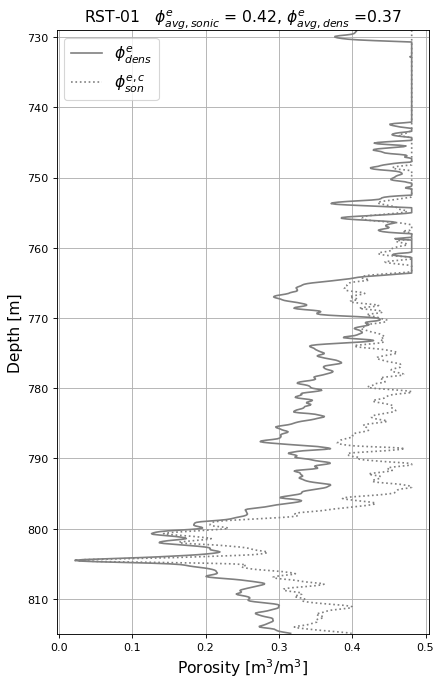

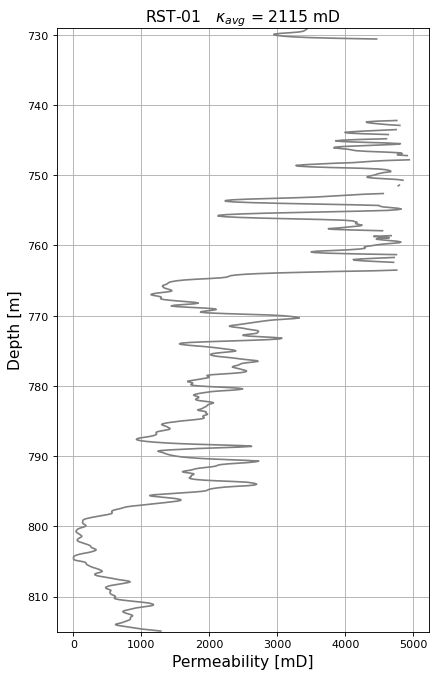

Mean K value in RST-01 = 2115 mD
Median K value in RST-01 = 1910.0590876241495 mD
GRV = 85.90 m, Net sand = 75.20 m, Net sand frac = 0.88


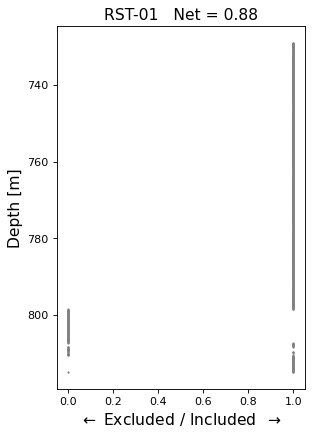

In [15]:
" Petrophysics in RST-01 well " 

# Depth
MD = MD_RST[2:-1]                              # Depth column without header [m]

# Top, middle and bottom boundaries and corresponding indeces
LMU = 729                                      # !! Late Miocene Unconformity [m depth]
index_LMU = int(np.where(MD==LMU)[0])
MMU = 755                                      # !! Mid Miocene Unconformity [m depth]
index_MMU = int(np.where(MD==MMU)[0])
EMU = 815                                      # !! Early Miocene Unconformity [m depth]
index_EMU = int(np.where(MD==EMU)[0])

MD_rst = MD[index_LMU:index_EMU]

## GR log
GR   = GR_RST[2:-1]
GR   = GR[index_LMU:index_EMU]
# Vclay calculation
GRss = 20                                    # !! Minimum GR reading
GRsh = max(GR)                               # Maximum GR reading
GRI  = (GR - GRss) / (GRsh - GRss)           # Gamma ray index
#Vcl_rst  = GRI                               # Assuming linear relationship
Vcl_rst = GRI / (3 - 2*GRI)                   # Assuming Stieber

## Bulk density
RHOB_full = RHOB_RST[2:-1]                   # Bulk density over full interval [g/cm3]
RHOB      = RHOB_full[index_LMU:index_EMU]   # Bulk density over reservoir interval [g/cm3]
# Calculate Density porosity (RHOP)
RHO_ma    = 2.65                                  # matrix porosity  [g/cm3], initial guess = 2.65 g/cm3
RHO_fl    = 1.0                                   # !! fluid porosity [g/cm3], based on salinity measurement in this well
RHOP_full = (RHO_ma-RHOB_full)/(RHO_ma-RHO_fl)    # Density porosity over full interval []
RHOP      = (RHO_ma-RHOB)/(RHO_ma-RHO_fl)         # Density porosity over reservoir interval []
RHO_sh    = 2.02                                   # !! Shale density in underlying shale formation [g/cm3]
RHOPE     = RHOP - Vcl_rst*(RHO_ma - RHO_sh)/(RHO_ma - RHO_fl)  # Effective density porosity
for i in range(len(RHOPE)):
    if RHOPE[i] > 0.48:
        RHOPE[i] = 0.481

## Sonic log (not used in this well. Density log more reliable)
DT_full = DT_RST[2:-1]                       # DT column without header [m]
DT = DT_full[index_LMU:index_EMU]
# Calculate sonic porosity (PHIS)
DTm   = 56                                   # Matrix transit time [micro s/ft]
DTf   = 185                                  # !! Fluid transit time [micro s/ft]
DTsh  = 152                                  # !! Transit time trough underlying shale formation [micro s/ft]
DTcsh = 100                                  # Compacted shale transit time [micro s/ft]
Cp    = DTsh / DTcsh
PHIS  = (DT - DTm)/(DTf - DTm)               # Sonic porosity
PHISE = PHIS - Vcl_rst*(DTsh - DTm)/(DTf - DTm)  # Effective Sonic porosity
PHISE_cor = PHISE*(1/Cp)                     # Sonic porosity, corrected for compaction
for i in range(len(PHISE_cor)):
    if PHISE_cor[i] < 0:
        PHISE_cor[i] = 0
    if PHISE_cor[i] > 0.48:
        PHISE_cor[i] = 0.481
phi_avg_sonic = np.mean(PHISE_cor)
phi_avg_dens = np.mean(RHOPE)

PHI_avg = (PHISE_cor + RHOPE) / 2
        
## Plot porosity vs depth
plt.figure(1, figsize = (6,10), dpi=80)
plt.plot(RHOPE    , MD[index_LMU:index_EMU]     , c = 'grey', label = '$\phi_{dens}^{e}$')
plt.plot(PHISE_cor, MD[index_LMU:index_EMU], ':', c = 'grey', label = '$\phi_{son}^{e,c}$')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]',fontsize=14)
plt.xlabel('Porosity [m$^3$/m$^3$]',fontsize=14)
plt.title('RST-01   $\phi_{avg, sonic}^{e}$ = '+ str("%.2f" % phi_avg_sonic) + ', $\phi_{avg, dens}^{e}$ ='  \
          + str("%.2f" % phi_avg_dens), fontsize = 14)
plt.legend(fontsize = 14)
plt.ylim(EMU,LMU)
plt.grid()
plt.show()
    
## Permeability
sph = 0.58                                   # Sphericity, chosen as constant from literature (Rorato et al., 2019)
i_top = np.where(LMU>M_smooth)[0][0]         # Index grain size at top 
i_bot = np.where(EMU>M_smooth)[0][0]         # Index grain size at bottom
Dpmax = xnew_M[i_top]                        # Grain size at top of this well, based on top depth (um)
Dpmin = xnew_M[i_bot]                        # Grain size at bot of this well, based on bottom depth (um)
Dp    = np.linspace(Dpmax,Dpmin,len(RHOPE)) / 1e6  # Grain sizes over depth interval in this well (m)
K = np.zeros(len(RHOPE))                     # Initiale permeability (mD)
K2 = np.zeros(len(RHOPE))
for i in range(len(RHOPE)):
    K[i] = sph**2 * (PHI_avg[i]**3 * Dp[i]**2) / (150*(1-PHI_avg[i])**2)*1.01324997e15   # !! Calculate perm trough Kozeny-Carman with Darcy (mD)
    K2[i] = sph**2 * (PHI_avg[i]**3 * Dp[i]**2) / (150*(1-PHI_avg[i])**2)*1.01324997e15   # !! Calculate perm trough Kozeny-Carman with Darcy (mD)
    if PHI_avg[i] > 0.48:
        K[i] = 'nan'
        K2[i] = 'nan'
K_avg = round(np.nanmean(K))

# Plot permeability vs depth
plt.figure(2, figsize = (6,10), dpi=80)        
plt.plot(K,MD[index_LMU:index_EMU], c = 'grey')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]',fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.title('RST-01   $\kappa_{avg}$ = '+ str(K_avg) + ' mD', fontsize=14)
plt.ylim(EMU,LMU)
plt.grid()
plt.show()
print('Mean K value in RST-01 =',K_avg,'mD')
print('Median K value in RST-01 =',np.nanmedian(K),'mD')

## Net sand
MD_steps = np.zeros(len(MD_rst))  # !!
for i in range(0,len(MD_rst)-1):  # !!
    MD_steps[i] = MD_rst[i+1] - MD_rst[i]   # !!   # Make array of each depth entry and its depth increase
GRV = sum(MD_steps)                                # Safe GRV for this well. Used later for fraction

for i in range(len(MD_rst)):  # !!
    if RHOPE[i] < 0.15 or Vcl_rst[i] > 0.35: #!!   # Define porosity and Vcl cutoff
        MD_steps[i] = 0                            # Apply cutoffs

MD_net = sum(MD_steps)                             # Compute net sand value
MD_netfrac = MD_net / GRV                          # Compute net sand fraction

# Print outcome
print('GRV =', "%.2f" % GRV, 'm, Net sand =', "%.2f" % MD_net, 'm, Net sand frac =', "%.2f" % MD_netfrac)
# Compute export net sand
Net_exp = MD_steps
for i in range(len(MD_steps)):
    if MD_steps[i] > 0:
        Net_exp[i] = 1                           # Create array where included cells are 1 and excluded cells 0

## New permeability for non reservoir rock
for i in range(len(Net_exp)):
    if Net_exp[i] == 0:
        K2[i] = 10
        
plt.figure(7, figsize = (4,6), dpi=80)
plt.scatter(Net_exp, MD_rst, c = 'grey', s = 1)
plt.gca().invert_yaxis()
plt.title('RST-01   Net = '+ str("%.2f" % MD_netfrac), fontsize = 14)
plt.ylabel('Depth [m]', fontsize = 14)
plt.xlabel(r'$\leftarrow$ Excluded / Included $\;\rightarrow$', fontsize = 14)
plt.show()

## Export to las file
MD_final = np.zeros(len(K))
RHOPE_exp = np.zeros(len(K))
for i in range(len(K)):
    MD_final[i] = MD[index_LMU:index_EMU][i]
    RHOPE_exp[i] = RHOPE[i]  

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Phi eff', RHOPE_exp, unit = 'm3/m3', descr = 'Porosity') # !!
las.add_curve('Perm', K,   unit = 'mD',    descr = 'Permeability')
las.add_curve('NTG', Net_exp , unit = ' ', descr = 'NTG')
las.write('RST_01_porperm.las', version=2) # !!

In [171]:
phi_rst = RHOPE

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Perm', K2,   unit = 'mD',    descr = 'Permeability')
las.write('RST_01_porperm2.las', version=2) # !!

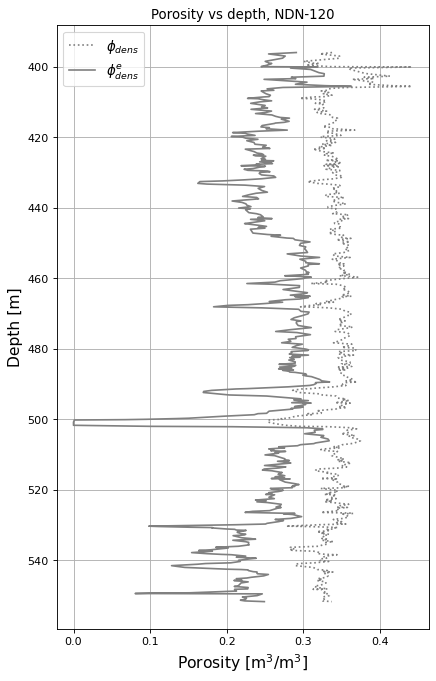

KC - Stieber mean =  597.0718682097877 , with std 336.38920051430694
van B - Stieber mean =  1833.9771803829053 , with std 1313.369642608312
Kozeny - Stieber mean =  1054.0009894093148 , with std 557.1151819659738
Barr - Stieber mean =  1479.0722062271793 , with std 833.306580742932


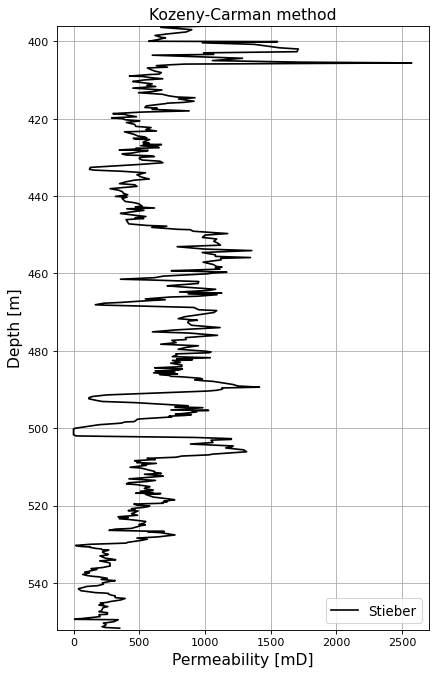

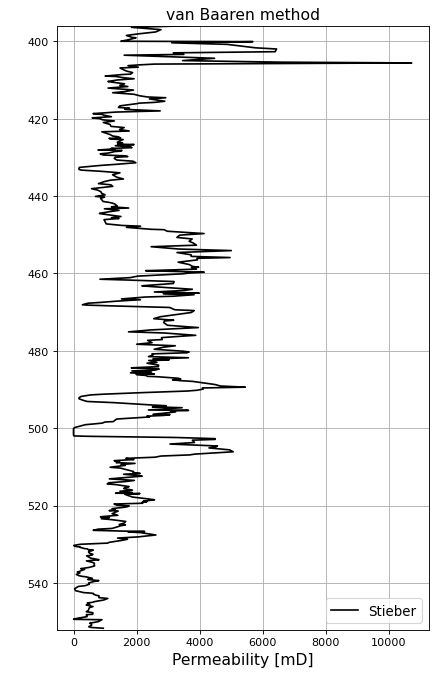

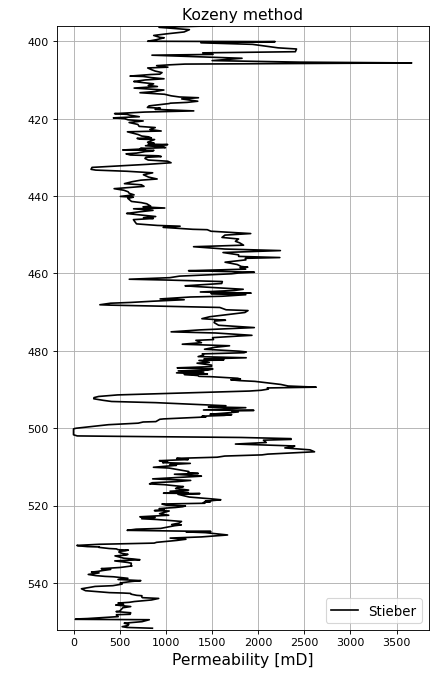

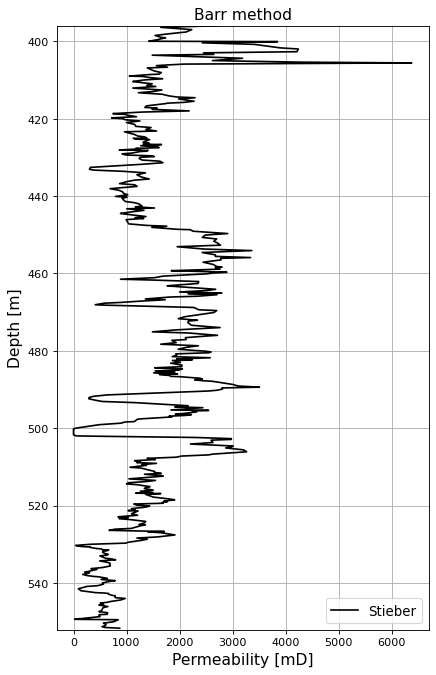

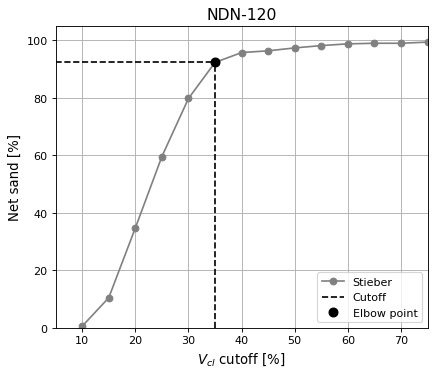

GRV = 155.70 m, Net sand = 145.20 m, Net sand frac = 0.93


In [201]:
" Petrophysics in NDN-120 well " 

## Depth
MD = MD_NDN[2:-1]                                    # Depth column without header [m]

## Top, middle and bottom boundaries and corresponding indeces
LMU = 396                                            # Late Miocene Unconformity [m depth]
index_LMU = int(np.where(MD==LMU)[0])
#MMU =                                               # Mid Miocene Unconformity [m depth]
#index_MMU = int(np.where(MD==MMU)[0])
TD = 552.1                                           # Termination Depth
index_TD = int(np.where(MD==TD)[0])

MD_ndn = MD[index_LMU:index_TD]

## GR log
GR   = GR_NDN[2:-1]
GR   = GR[index_LMU:index_TD]
# Vclay calculation
GRss = 27                                    # !! Minimum GR reading
GRsh = max(GR)                               # Maximum GR reading
GRI = np.zeros(len(GR))
for i in range(len(GR)):
    GRI[i]  = (GR[i] - GRss) / (GRsh - GRss)  # Gamma ray index
#Vcl_ndn = 0.083*(2**(3.7*GRI) - 1)           # Assuming Larionov for tertiary rocks 
#Vcl_ndn = 0.33 * (2**(2*GRI) - 1)             # Assuming Larionov for old rocks
#Vcl_ndn = 1.7 - np.sqrt(3.38 - (GRI + 0.7)**2) # Assuming Clavier
Vcl_ndn = GRI / (3 - 2*GRI)                   # Assuming Stieber
#Vcl_ndn  = GRI                               # Assuming linear relationship

## Bulk density
RHOB_full = RHOB_NDN[2:-1]                    # Bulk density over full interval [g/cm3]
RHOB_int  = RHOB_full[index_LMU:index_TD]
RHOB = np.zeros(len(RHOB_int))
for i in range(len(RHOB_int)):
    RHOB[i] = RHOB_int[i]     # Bulk density over reservoir interval [g/cm3]
# Calculate Density porosity (RHOP)
RHO_ma    = 2.65                                  # matrix porosity  [g/cm3], initial guess = 2.65 g/cm3
RHO_fl    = 1.0                                   # !! fluid porosity [g/cm3], based on salinity measurement in this well
RHOP_full = (RHO_ma-RHOB_full)/(RHO_ma-RHO_fl)    # Density porosity over full interval []
RHOP      = (RHO_ma-RHOB)/(RHO_ma-RHO_fl)         # Density porosity over reservoir interval []
RHO_sh    = 2.07                                   # !! Shale density in underlying shale formation [g/cm3] <- taken from WSP-01
RHOPE     = RHOP - Vcl_ndn*(RHO_ma - RHO_sh)/(RHO_ma - RHO_fl)  # Effective density porosity

for i in range(len(RHOPE)):
    if RHOPE[i] < 0:
        RHOPE[i] = 0
    if RHOPE[i] > 0.48:
        RHOPE[i] = 0.481
        
## Plot porosity vs depth
plt.figure(2, figsize = (6,10), dpi=80)
plt.plot(RHOP, MD[index_LMU:index_TD],':', c = 'grey', label = '$\phi_{dens}$')
plt.plot(RHOPE, MD[index_LMU:index_TD],c = 'grey', label = '$\phi_{dens}^{e}$')
#plt.plot(NPHI,MD[start_NPHI:index_EMU], label = 'Neutron porosity')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]', fontsize = 14)
plt.xlabel('Porosity [m$^3$/m$^3$]', fontsize = 14)
plt.title('Porosity vs depth, NDN-120')
plt.legend(loc = 'upper left', fontsize = 12)
plt.grid()
plt.show()

## Permeability
# Kozeny-Carman
sph = 0.58                                   # Sphericity, chosen as constant from literature (Rorato et al., 2019)
i_top = np.where(LMU>M_smooth)[0][0]         # Index grain size at top 
i_bot = np.where(TD>M_smooth)[0][0]          # Index grain size at bottom
Dpmax = xnew_M[i_top]                        # Grain size at top of this well, based on top depth (um)
Dpmin = xnew_M[i_bot]                        # Grain size at bot of this well, based on bottom depth (um)
Dp    = np.linspace(Dpmax,Dpmin,len(RHOPE)) # !! Grain sizes over depth interval in this well (um)
K = np.zeros(len(RHOPE))                     # Initiate permeability (mD)
K2 = np.zeros(len(RHOPE))
for i in range(len(RHOPE)):
    K[i] = sph**2 * (RHOPE[i]**3 * (Dp[i]/1e6)**2) / (150*(1-RHOPE[i])**2)*1.01324997e15   # !! Calculate perm trough Kozeny-Carman with Darcy (mD)
    K2[i] = sph**2 * (RHOPE[i]**3 * (Dp[i]/1e6)**2) / (150*(1-RHOPE[i])**2)*1.01324997e15

C = 0.7
m = 1.4
Cs = 1
K_vb = np.zeros(len(RHOPE))                     # !! initiate
K_k = np.zeros(len(RHOPE))                      # !! initiate
K_b  = np.zeros(len(RHOPE))                     # !! initiate

for i in range(len(RHOPE)):                    # !!
    K_vb[i] = 10 * Dp[i]**2 * C**(-3.64) * (m+3.64) * RHOPE[i]**(m+3.64)  # van Baaren equation:
    K_k[i]  = 5.53 * Dpmin**2 * (RHOPE[i]**3 /(1-RHOPE[i])**2)  # Kozeny equation
    K_b[i]  = (1/(36*5*Cs) * (RHOPE[i]**3 / (1-RHOPE[i])**2) * (Dp[i]/1e6)**2) *1.01324997e15  # Barr equation

# perm from larionov or stieber
#K_lart = K   # !!
#K_vb_lart = K_vb  # !!
#K_k_lart = K_k # !!
#K_b_lart = K_b # !!
K_stieb = K  # !!
K_vb_stieb = K_vb # !!
K_k_stieb = K_k # !!
K_b_stieb = K_b # !!

# Mean & median
#K_avg_lart    = np.mean(K_lart)
#K_vb_avg_lart = np.mean(K_vb_lart)
#K_k_avg_lart  = np.mean(K_k_lart)
#K_b_avg_lart  = np.mean(K_b_lart)
K_avg_stieb    = np.mean(K_stieb)
K_vb_avg_stieb = np.mean(K_vb_stieb)
K_k_avg_stieb  = np.mean(K_k_stieb)
K_b_avg_stieb  = np.mean(K_b_stieb)
# Standard deviation
#K_std_lart    = math.sqrt(sum((K_lart    - K_avg_lart)**2)/len(K_lart))
#K_vb_std_lart = math.sqrt(sum((K_vb_lart - K_vb_avg_lart)**2)/len(K_vb_lart))
#K_k_std_lart  = math.sqrt(sum((K_k_lart  - K_k_avg_lart)**2)/len(K_k_lart))
#K_b_std_lart  = math.sqrt(sum((K_b_lart  - K_b_avg_lart)**2)/len(K_b_lart))
K_std_stieb    = math.sqrt(sum((K_stieb    - K_avg_stieb)**2)/len(K_stieb))
K_vb_std_stieb = math.sqrt(sum((K_vb_stieb - K_vb_avg_stieb)**2)/len(K_vb_stieb))
K_k_std_stieb  = math.sqrt(sum((K_k_stieb  - K_k_avg_stieb)**2)/len(K_k_stieb))
K_b_std_stieb  = math.sqrt(sum((K_b_stieb  - K_b_avg_stieb)**2)/len(K_b_stieb))
#print('KC - Larionov mean = ',K_avg_lart, ', with std', K_std_lart)
print('KC - Stieber mean = ',K_avg_stieb, ', with std', K_std_stieb)
#print('van B - Larionov mean = ',K_vb_avg_lart, ', with std', K_vb_std_lart)
print('van B - Stieber mean = ',K_vb_avg_stieb, ', with std', K_vb_std_stieb)
#print('Kozeny - Larionov mean = ', K_k_avg_lart, ', with std', K_k_std_lart)
print('Kozeny - Stieber mean = ',K_k_avg_stieb, ', with std', K_k_std_stieb)
#print('Barr - Larionov mean = ', K_b_avg_lart, ', with std', K_b_std_lart)
print('Barr - Stieber mean = ',K_b_avg_stieb, ', with std', K_b_std_stieb)


# Plot permeability vs depth
plt.figure(2, figsize = (6,10), dpi=80)        
#plt.plot(K_lart,MD[index_LMU:index_TD], c = 'grey', label = 'Larionov Tertiary')
plt.plot(K_stieb,MD[index_LMU:index_TD], c = 'black', label = 'Stieber')
plt.gca().invert_yaxis()
plt.title('Kozeny-Carman method',fontsize=14, wrap=True)
plt.ylabel('Depth [m]',fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.ylim(TD,LMU)
plt.grid()
plt.legend(loc = 'lower right', fontsize = 12)
plt.show()

plt.figure(3, figsize = (6,10), dpi=80)        
#plt.plot(K_vb_lart,MD[index_LMU:index_TD], c = 'grey', label = 'Larionov Tertiary')
plt.plot(K_vb_stieb,MD[index_LMU:index_TD], c = 'black', label = 'Stieber')
plt.gca().invert_yaxis()
plt.title('van Baaren method',fontsize=14)
plt.ylabel(' ',fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.ylim(TD,LMU)
plt.grid()
plt.legend(loc = 'lower right', fontsize = 12)
plt.show()

plt.figure(4, figsize = (6,10), dpi=80)
#plt.plot(K_k_lart,MD[index_LMU:index_TD], c = 'grey', label = 'Larionov Tertiary')
plt.plot(K_k_stieb,MD[index_LMU:index_TD], c = 'black', label = 'Stieber')
plt.gca().invert_yaxis()
plt.title('Kozeny method',fontsize=14)
plt.ylabel(' ',fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.ylim(TD,LMU)
plt.grid()
plt.legend(loc = 'lower right', fontsize = 12)
plt.show()

plt.figure(6, figsize = (6,10), dpi=80)        
#plt.plot(K_b_lart,MD[index_LMU:index_TD], c = 'grey', label = 'Larionov Tertiary')
plt.plot(K_b_stieb,MD[index_LMU:index_TD], c = 'black', label = 'Stieber')
plt.gca().invert_yaxis()
plt.title('Barr method', fontsize=14) #$\kappa_{avg}$ = ' + str(int(K_b_avg)) + ' mD, $\kappa_{\sigma}$ = ' + str(int(K_b_std)) + ' mD',fontsize=14)
plt.ylabel('Depth [m]',fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.ylim(TD,LMU)
plt.grid()
plt.legend(loc = 'lower right', fontsize = 12)
plt.show()

### Vclay cutoff and N/G for NDN-120
# Initiate
MD_10    = np.ones(len(Vcl_ndn))  
MD_15    = np.ones(len(Vcl_ndn))
MD_20    = np.ones(len(Vcl_ndn))
MD_25    = np.ones(len(Vcl_ndn))
MD_30    = np.ones(len(Vcl_ndn))
MD_35    = np.ones(len(Vcl_ndn))
MD_40    = np.ones(len(Vcl_ndn))
MD_45    = np.ones(len(Vcl_ndn))
MD_50    = np.ones(len(Vcl_ndn))
MD_55    = np.ones(len(Vcl_ndn))
MD_60    = np.ones(len(Vcl_ndn))
MD_65    = np.ones(len(Vcl_ndn))
MD_70    = np.ones(len(Vcl_ndn))
MD_75    = np.ones(len(Vcl_ndn))
MD_total = len(MD[index_LMU:index_TD])

for i in range(len(Vcl_ndn)):  # !!
    if Vcl_ndn[i] >= 0.10:
        MD_10[i] = 0
    if Vcl_ndn[i] >= 0.15:
        MD_15[i] = 0
    if Vcl_ndn[i] >= 0.20:
        MD_20[i] = 0
    if Vcl_ndn[i] >= 0.25:
        MD_25[i] = 0
    if Vcl_ndn[i] >= 0.30:
        MD_30[i] = 0
    if Vcl_ndn[i] >= 0.35:
        MD_35[i] = 0
    if Vcl_ndn[i] >= 0.40:
        MD_40[i] = 0
    if Vcl_ndn[i] >= 0.45:
        MD_45[i] = 0
    if Vcl_ndn[i] >= 0.50:
        MD_50[i] = 0
    if Vcl_ndn[i] >= 0.55:
        MD_55[i] = 0
    if Vcl_ndn[i] >= 0.60:
        MD_60[i] = 0
    if Vcl_ndn[i] >= 0.65:
        MD_65[i] = 0
    if Vcl_ndn[i] >= 0.70:
        MD_70[i] = 0
    if Vcl_ndn[i] >= 0.75:
        MD_75[i] = 0

MD_net_10 = sum(MD_10)/MD_total*100   # net MD with Vcl cutoff of 0.10
MD_net_15 = sum(MD_15)/MD_total*100   # net MD with Vcl cutoff of 0.15
MD_net_20 = sum(MD_20)/MD_total*100   # ""
MD_net_25 = sum(MD_25)/MD_total*100   # ...
MD_net_30 = sum(MD_30)/MD_total*100
MD_net_35 = sum(MD_35)/MD_total*100
MD_net_40 = sum(MD_40)/MD_total*100
MD_net_45 = sum(MD_45)/MD_total*100
MD_net_50 = sum(MD_50)/MD_total*100
MD_net_55 = sum(MD_55)/MD_total*100
MD_net_60 = sum(MD_60)/MD_total*100
MD_net_65 = sum(MD_65)/MD_total*100
MD_net_70 = sum(MD_70)/MD_total*100
MD_net_75 = sum(MD_75)/MD_total*100
MD_nets   = np.array([MD_net_10, MD_net_15, MD_net_20, MD_net_25, MD_net_30, MD_net_35, MD_net_40, MD_net_45, MD_net_50, MD_net_55, MD_net_60, MD_net_65, MD_net_70, MD_net_75])   # All net MD cutoffs together

#MD_nets_lart = MD_nets
#MD_nets_laro = MD_nets
#MD_nets_clav = MD_nets
MD_nets_stieb = MD_nets
#MD_nets_lin   = MD_nets

# plot Vclay cutoff
Vcl_cutoffs = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])
elbowx = np.array([35, 35])
elbowy = np.array([0,MD_net_35])
netresx = np.array([0, 35])
netresy = np.array([MD_net_35,MD_net_35])

fig7 = plt.figure(7, figsize = (6,5), dpi=80) 
#plt.plot(Vcl_cutoffs,MD_nets_lart, '-P', color = 'grey', label = 'Larionov Tertiary', markersize=9)
plt.plot(Vcl_cutoffs,MD_nets_stieb, '-o', color = 'grey', label = 'Stieber')
plt.plot(elbowx,elbowy,'--', color = 'black', label = 'Cutoff')
plt.plot(35,MD_net_35, 'o', color = 'black', label = 'Elbow point', zorder = 10, markersize=8)
#plt.plot(Vcl_cutoffs,MD_nets_clav, '-^' , color = 'grey', label = 'Clavier', markersize=8)
#plt.plot(Vcl_cutoffs,MD_nets_laro, '-1', color = 'grey', label = 'Larionov old', markersize=10)
#plt.plot(Vcl_cutoffs,MD_nets_lin,   '-*', color = 'grey', label = 'Linear', markersize=10)
plt.plot(netresx,netresy,'--', color = 'black')
plt.xlabel('$V_{cl}$ cutoff [%]', fontsize=12)
plt.ylabel('Net sand [%]', fontsize=12)
plt.title('NDN-120', fontsize = 14)
plt.ylim(0,105)
plt.xlim(5,75)
plt.legend()
plt.grid()
plt.show()
fig7.savefig('Vcl_cutoff_models.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## Net sand
MD_steps = np.zeros(len(MD_ndn))  # !!
for i in range(0,len(MD_ndn)-1):  # !!
    MD_steps[i] = MD_ndn[i+1] - MD_ndn[i]   # !!   # Make array of each depth entry and its depth increase
GRV = sum(MD_steps)                                # Safe GRV for this well. Used later for fraction

for i in range(len(MD_ndn)):  # !!
    if RHOPE[i] < 0.15 or Vcl_ndn[i] > 0.35: #!!   # Define porosity and Vcl cutoff
        MD_steps[i] = 0                            # Apply cutoffs

MD_net = sum(MD_steps)                             # Compute net sand value
MD_netfrac = MD_net / GRV                          # Compute net sand fraction

# Print outcome
print('GRV =', "%.2f" % GRV, 'm, Net sand =', "%.2f" % MD_net, 'm, Net sand frac =', "%.2f" % MD_netfrac)
# Compute export net sand
Net_exp = MD_steps
for i in range(len(MD_steps)):
    if MD_steps[i] > 0:
        Net_exp[i] = 1                           # Create array where included cells are 1 and excluded cells 0
                
## New permeability for non reservoir rock
for i in range(len(Net_exp)):
    if Net_exp[i] == 0:
        K2[i] = 10
            
## Export to las file
MD_final = np.zeros(len(K))
MD_extra = np.arange(551.8,800.2,0.3)
RHOPE_exp = np.zeros(len(K))
NaN = np.empty(len(MD_extra))
NaN[:] = np.NaN
for i in range(len(K)):
    MD_final[i] = MD[index_LMU:index_TD][i] # !!
    RHOPE_exp[i] = RHOPE[i]
# Insert NaN values below TD, up to 800 m depth
MD_final  = np.append(MD_final, MD_extra)
RHOPE_exp = np.append(RHOPE_exp, NaN)
K         = np.append(K, NaN)
K2        = np.append(K2, NaN)
Net_exp   = np.append(Net_exp, NaN)

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Phi eff', RHOPE_exp, unit = 'm3/m3', descr = 'Porosity') # !!
las.add_curve('Perm', K,   unit = 'mD',    descr = 'Permeability')
las.add_curve('NTG', Net_exp , unit = ' ', descr = 'NTG')
las.write('NDN_120_porperm.las', version=2) # !!

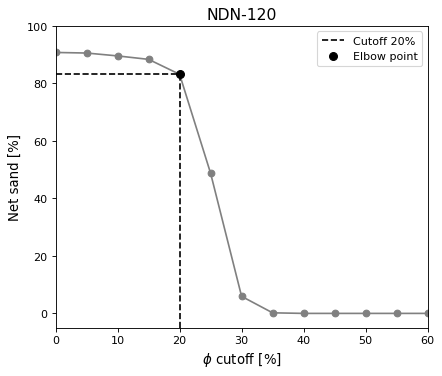

In [36]:
## Porosity cutoff for NDN-120

# Initiate
MDp_00    = np.ones(len(RHOPE))  
MDp_05    = np.ones(len(RHOPE))  
MDp_10    = np.ones(len(RHOPE))  
MDp_15    = np.ones(len(RHOPE))
MDp_20    = np.ones(len(RHOPE))
MDp_25    = np.ones(len(RHOPE))
MDp_30    = np.ones(len(RHOPE))
MDp_35    = np.ones(len(RHOPE))
MDp_40    = np.ones(len(RHOPE))
MDp_45    = np.ones(len(RHOPE))
MDp_50    = np.ones(len(RHOPE))
MDp_55    = np.ones(len(RHOPE))
MDp_60    = np.ones(len(RHOPE))
MDp_65    = np.ones(len(RHOPE))
MDp_70    = np.ones(len(RHOPE))
MDp_75    = np.ones(len(RHOPE))
#MDp_total = len(MD[index_LMU:index_TD])
MDp_total = len(MD[index_LMU:index_EMU])

for i in range(len(RHOPE)):  # !!
    if RHOPE[i] <= 0:
        MDp_00[i] = 0
    if RHOPE[i] <= 0.05:
        MDp_05[i] = 0
    if RHOPE[i] <= 0.10:
        MDp_10[i] = 0
    if RHOPE[i] <= 0.15:
        MDp_15[i] = 0
    if RHOPE[i] <= 0.20:
        MDp_20[i] = 0
    if RHOPE[i] <= 0.25:
        MDp_25[i] = 0
    if RHOPE[i] <= 0.30:
        MDp_30[i] = 0
    if RHOPE[i] <= 0.35:
        MDp_35[i] = 0
    if RHOPE[i] <= 0.40:
        MDp_40[i] = 0
    if RHOPE[i] <= 0.45:
        MDp_45[i] = 0
    if RHOPE[i] <= 0.50:
        MDp_50[i] = 0
    if RHOPE[i] <= 0.55:
        MDp_55[i] = 0
    if RHOPE[i] <= 0.60:
        MDp_60[i] = 0
    if RHOPE[i] <= 0.65:
        MDp_65[i] = 0
    if RHOPE[i] <= 0.70:
        MDp_70[i] = 0
    if RHOPE[i] <= 0.75:
        MDp_75[i] = 0

MDp_net_00 = sum(MDp_00)/MDp_total*100 - (100 - MD_net_35)
MDp_net_05 = sum(MDp_05)/MDp_total*100 - (100 - MD_net_35)
MDp_net_10 = sum(MDp_10)/MDp_total*100 - (100 - MD_net_35)
MDp_net_15 = sum(MDp_15)/MDp_total*100 - (100 - MD_net_35)  
MDp_net_20 = sum(MDp_20)/MDp_total*100 - (100 - MD_net_35)  
MDp_net_25 = sum(MDp_25)/MDp_total*100 - (100 - MD_net_35)  
MDp_net_30 = sum(MDp_30)/MDp_total*100 - (100 - MD_net_35)
MDp_net_35 = sum(MDp_35)/MDp_total*100 
MDp_net_40 = sum(MDp_40)/MDp_total*100 
MDp_net_45 = sum(MDp_45)/MDp_total*100 
MDp_net_50 = sum(MDp_50)/MDp_total*100
MDp_net_55 = sum(MDp_55)/MDp_total*100
MDp_net_60 = sum(MDp_60)/MDp_total*100 
MDp_net_65 = sum(MDp_65)/MDp_total*100
MDp_net_70 = sum(MDp_70)/MDp_total*100
MDp_net_75 = sum(MDp_75)/MDp_total*100
MDp_nets   = np.array([MDp_net_00, MDp_net_05, MDp_net_10, MDp_net_15, MDp_net_20, MDp_net_25, MDp_net_30, MDp_net_35, MDp_net_40, MDp_net_45, MDp_net_50, MDp_net_55, MDp_net_60])   # All net MD cutoffs together

RHOPE_cutoffs = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
elbowpx = np.array([20, 20])
elbowpy = np.array([-5, MDp_net_20])
netrespx = np.array([0, 20])
netrespy = np.array([MDp_net_20,MDp_net_20])
pointpx = 20
pointpy = MDp_net_20

fig1 = plt.figure(1, figsize = (6,5), dpi=80)
plt.plot(RHOPE_cutoffs, MDp_nets, '-o', color = 'grey')
plt.plot(elbowpx,elbowpy, '--', color = 'black', label = 'Cutoff 20%')
plt.plot(netrespx, netrespy, '--', color = 'black')
plt.scatter(pointpx, pointpy, c = 'black', s = 50, label = 'Elbow point', zorder = 10)
plt.xlabel('$\phi$ cutoff [%]', fontsize = 12)
plt.ylabel('Net sand [%]', fontsize = 12)
plt.ylim(-5,100)
plt.xlim(0,60)
plt.title('NDN-120', fontsize = 14)
plt.legend()
plt.show()

In [202]:
phi_ndn = RHOPE

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Perm', K2,   unit = 'mD',    descr = 'Permeability')
las.write('NDN_120_porperm2.las', version=2) # !!

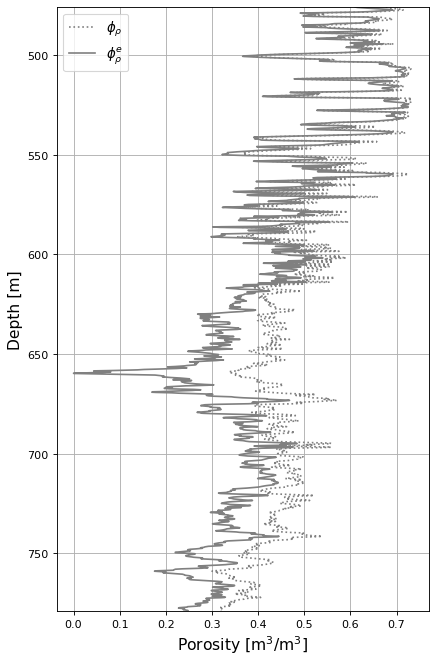

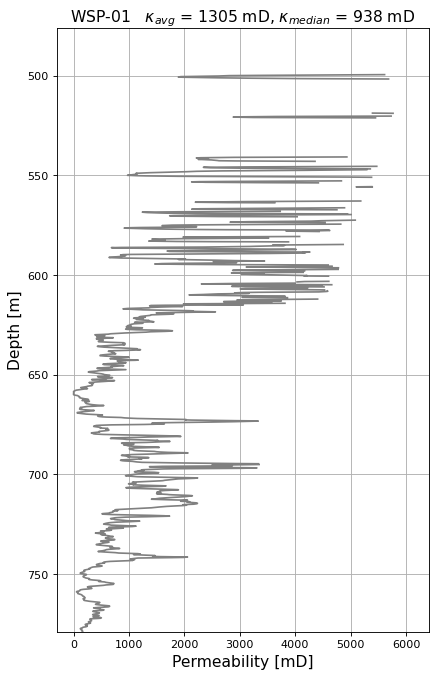

Mean K value in WSP-01 = 1305 mD
Median K value in WSP-01 = 938 mD
GRV = 302.90 m, Net sand = 269.20 m, Net sand frac = 0.89


In [178]:
" Petrophysics in WSP-01 well " 

MD = MD_WSP[2:-1]                            # Depth column without header [m]

# Top, middle and bottom boundaries and corresponding indeces
LMU = 476                                    # !! Late Miocene Unconformity [m depth]
index_LMU = int(np.where(MD==LMU)[0])
MMU = 628                                    # !! Mid Miocene Unconformity [m depth]
index_MMU = int(np.where(MD==MMU)[0])
EMU = 779                                    # !! Early Miocene Unconformity [m depth]
index_EMU = int(np.where(MD==EMU)[0])

MD_wsp = MD[index_LMU:index_EMU]

## GR log
GR   = GR_WSP[2:-1]
GR   = GR[index_LMU:index_EMU]
# Vclay calculation
GRss = 21                                    # Minimum GR reading
GRsh = max(GR)                               # Maximum GR reading
GRI  = (GR - GRss) / (GRsh - GRss)           # Gamma ray index
#Vcl_wsp  = GRI                               # Assuming linear relationship
Vcl_wsp = GRI / (3 - 2*GRI)                   # Assuming Stieber


## Bulk density
RHOB_full = RHOB_WSP[2:-1]                   # Bulk density over full interval [g/cm3]
RHOB      = RHOB_full[index_LMU:index_EMU]   # Bulk density over reservoir interval [g/cm3]
# Calculate Density porosity (RHOP)
RHO_ma    = 2.65                                  # matrix porosity  [g/cm3], initial guess = 2.65 g/cm3
RHO_fl    = 1.00                                  # !! drilling mud density [g/cm3], based on salinity measurement in this well
RHOP_full = (RHO_ma-RHOB_full)/(RHO_ma-RHO_fl)    # Density porosity over full interval []
RHOP      = (RHO_ma-RHOB)/(RHO_ma-RHO_fl)         # Density porosity over reservoir interval []
RHO_sh    = 2.07                                  # !! Shale density in underlying shale formation [g/cm3]
RHOPE     = RHOP - Vcl_wsp*(RHO_ma - RHO_sh)/(RHO_ma - RHO_fl)  # Effective density porosity
for i in range(len(RHOPE)):
    if RHOPE[i] < 0:
        RHOPE[i] = 0

## Sonic log (not used in this well. Density log more reliable)
DT_full = DT_WSP[2:-1]                       # DT column without header [m]
DT = DT_full[index_LMU:index_EMU]
# Calculate sonic porosity (PHIS)
DTm   = 56                                   # Matrix transit time [micro s/ft]
DTf   = 218                                  # !! Fluid transit time [micro s/ft]
DTsh  = 55                                   # !! Transit time trough underlying shale formation [micro s/ft]
DTcsh = 100                                  # Compacted shale transit time [micro s/ft]
Cp    = DTsh / DTcsh
PHIS  = (DT - DTm)/(DTf - DTm)               # Sonic porosity
PHISE = PHIS - Vcl_wsp*(DTsh - DTm)/(DTf - DTm)  # Effective Sonic porosity
for i in range(len(PHISE)):
    if PHISE[i] < 0:
        PHISE[i] = 0
PHISE_cor = PHISE*(1/Cp)                     # Sonic porosity, corrected for compaction

## Porosity > 0.48 for plotting
phi_max = 0.48*np.ones(len(RHOPE))
RHOPE_max_plt = np.zeros(len(RHOPE))
for i in range(len(RHOPE)):
    if RHOPE[i] > 0.48:
        RHOPE_max_plt[i] = RHOPE[i]
    else:
        RHOPE_max_plt[i] = 'nan'

## Plot porosity vs depth
plt.figure(1, figsize = (6,10), dpi=80)
plt.plot(RHOP, MD[index_LMU:index_EMU], ':', c = 'grey', label = r'$\phi_{\rho}$ ')
plt.plot(RHOPE, MD[index_LMU:index_EMU], c = 'grey'    , label = r'$\phi_{\rho}^{e}$')
#plt.plot(phi_max,MD[index_LMU:index_EMU], '-.', c = 'black'  , label = ' $\phi_{max}$')
#plt.plot(RHOPE_max_plt, MD[index_LMU:index_EMU], c = 'black' , label = '$\phi_{excluded}$')
#plt.plot(PHISE, MD[index_LMU:index_EMU], label = 'Effective sonic porosity')
#plt.plot(PHISE_cor, MD[index_LMU:index_EMU], label = '$\phi_{son}^{e,c}$')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]',fontsize=14)
#plt.ylabel(' ',fontsize = 14)
plt.xlabel('Porosity [m$^3$/m$^3$]',fontsize=14)
plt.ylim(EMU,LMU)
#plt.title('WSP-01  Porosity vs depth',fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

## Permeability
sph = 0.58                                   # Sphericity, chosen as constant from literature (Rorato et al., 2019)
i_top = np.where(LMU>M_smooth)[0][0]         # Index grain size at top 
i_bot = np.where(EMU>M_smooth)[0][0]          # Index grain size at bottom
Dpmax = xnew_M[i_top]                        # Grain size at top of this well, based on top depth (um)
Dpmin = xnew_M[i_bot]                        # Grain size at bot of this well, based on bottom depth (um)
Dp    = np.linspace(Dpmax,Dpmin,len(RHOPE)) / 1e6  # !! Grain sizes over depth interval in this well (m)
K = np.zeros(len(RHOPE))                     # Initiale permeability (mD)
K2 = np.zeros(len(RHOPE))
for i in range(len(RHOPE)):
    K[i] = sph**2 * (RHOPE[i]**3 * Dp[i]**2) / (150*(1-RHOPE[i])**2)*1.01324997e15   # !! Calculate perm trough Kozeny-Carman with Darcy (mD)
    K2[i] = sph**2 * (RHOPE[i]**3 * Dp[i]**2) / (150*(1-RHOPE[i])**2)*1.01324997e15
    if RHOPE[i] > 0.48:
        K[i] = 'nan'
        K2[i] = 'nan'
K_avg = int(np.nanmean(K))
K_med = int(np.nanmedian(K))

# Plot permeability vs depth
plt.figure(2, figsize = (6,10), dpi=80)        
plt.plot(K,MD[index_LMU:index_EMU], c = 'grey')
plt.gca().invert_yaxis()
plt.title('WSP-01   $\kappa_{avg}$ = '+ str(K_avg) +' mD, $\kappa_{median}$ = ' + str(K_med) + ' mD', fontsize=14)
plt.ylabel('Depth [m]',fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.ylim(EMU,LMU)
plt.grid()
plt.show()

print('Mean K value in WSP-01 =',K_avg,'mD')
print('Median K value in WSP-01 =',K_med,'mD')

## Net sand
MD_steps = np.zeros(len(MD_wsp))  # !!
for i in range(0,len(MD_wsp)-1):  # !!
    MD_steps[i] = MD_wsp[i+1] - MD_wsp[i]   # !!   # Make array of each depth entry and its depth increase
GRV = sum(MD_steps)                                # Safe GRV for this well. Used later for fraction

for i in range(len(MD_wsp)):  # !!
    if RHOPE[i] < 0.15 or Vcl_wsp[i] > 0.35: #!!   # Define porosity and Vcl cutoff
        MD_steps[i] = 0                            # Apply cutoffs

MD_net = sum(MD_steps)                             # Compute net sand value
MD_netfrac = MD_net / GRV                          # Compute net sand fraction

# Print outcome
print('GRV =', "%.2f" % GRV, 'm, Net sand =', "%.2f" % MD_net, 'm, Net sand frac =', "%.2f" % MD_netfrac)
# Compute export net sand
Net_exp = MD_steps
for i in range(len(MD_steps)):
    if MD_steps[i] > 0:
        Net_exp[i] = 1                           # Create array where included cells are 1 and excluded cells 0

## New permeability for non reservoir rock
for i in range(len(Net_exp)):
    if Net_exp[i] == 0:
        K2[i] = 10        

## Export to las file
MD_final = np.zeros(len(K))
RHOPE_exp = np.zeros(len(K))
for i in range(len(K)):
    MD_final[i] = MD[index_LMU:index_EMU][i] # !!
    RHOPE_exp[i] = RHOPE[i]
    if RHOPE_exp[i] > 0.48:
        RHOPE_exp[i] = 0.481

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Phi eff', RHOPE_exp, unit = 'm3/m3', descr = 'Porosity') # !!
las.add_curve('Perm', K,   unit = 'mD',    descr = 'Permeability')
las.add_curve('NTG', Net_exp , unit = ' ', descr = 'NTG')
las.write('WSP_01_porperm.las', version=2) # !!

In [179]:
phi_wsp = RHOPE

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Perm', K2,   unit = 'mD',    descr = 'Permeability')
las.write('WSP_01_porperm2.las', version=2) # !!

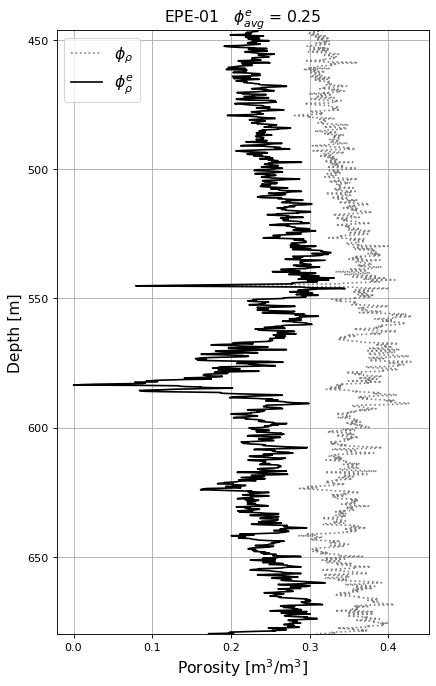

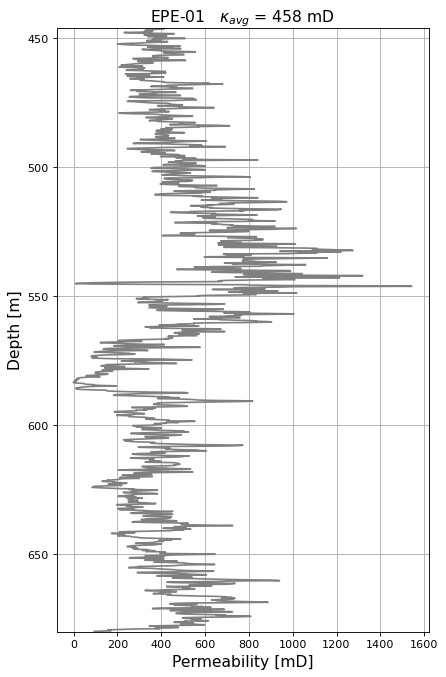

Mean K value in EPE-01 = 458 mD
Median K value in EPE-01 = 426 mD
GRV = 233.78 m, Net sand = 193.70 m, Net sand frac = 0.83


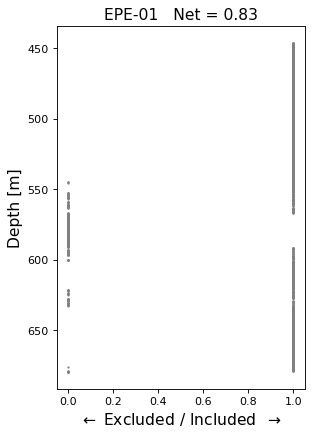

In [9]:
" Petrophysics in EPE-01 well " 

## Depth
MD = MD_EPE[2:-1]                            # Depth column without header [m]

# Top, middle and bottom boundaries and corresponding indeces
LMU = 446.075                                    # !! Late Miocene Unconformity [m depth]
index_LMU = int(np.where(MD==LMU)[0])
MMU = 556.108                                    # !! Mid Miocene Unconformity [m depth]
index_MMU = int(np.where(MD==MMU)[0])
EMU = 680.009                                    # !! Early Miocene Unconformity [m depth]
index_EMU = int(np.where(MD==EMU)[0])

MD_epe = MD[index_LMU:index_EMU]

## GR log
GR   = GR_EPE[2:-1]
GR   = GR[index_LMU:index_EMU]
# Vclay calculation
GRss = 15                                    # Minimum GR reading
GRsh = max(GR)                               # Maximum GR reading
GRI  = (GR - GRss) / (GRsh - GRss)           # Gamma ray index
#Vcl_bla  = GRI                              # Assuming linear relationship
Vcl_epe = GRI / (3 - 2*GRI)                  # Assuming Stieber

## Bulk density
RHOB_full = RHOB_EPE[2:-1]                   # Bulk density over full interval [g/cm3]
RHOB      = RHOB_full[index_LMU:index_EMU]   # Bulk density over reservoir interval [g/cm3]
# Calculate Density porosity (RHOP)
RHO_ma    = 2.65                                  # matrix porosity  [g/cm3], initial guess = 2.65 g/cm3
RHO_fl    = 1.11                                  # !! fluid density [g/cm3], based on salinity measurement in this well
RHOP_full = (RHO_ma-RHOB_full)/(RHO_ma-RHO_fl)    # Density porosity over full interval []
RHOP      = (RHO_ma-RHOB)/(RHO_ma-RHO_fl)         # Density porosity over reservoir interval []
RHO_sh    = 2.10                                  # !! Shale density in underlying shale formation [g/cm3]
RHOPE     = RHOP - Vcl_epe*(RHO_ma - RHO_sh)/(RHO_ma - RHO_fl)  # Effective density porosity
for i in range(len(RHOPE)):
    if RHOPE[i] < 0:
        RHOPE[i] = 0
phi_avg = np.mean(RHOPE)    

## Plot porosity vs depth
plt.figure(1, figsize = (6,10), dpi=80)
plt.plot(RHOP, MD[index_LMU:index_EMU], ':', c = 'grey', label = r'$\phi_{\rho}$ ')
plt.plot(RHOPE, MD[index_LMU:index_EMU], c = 'black'    , label = r'$\phi_{\rho}^{e}$')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]',fontsize=14)
plt.xlabel('Porosity [m$^3$/m$^3$]',fontsize=14)
plt.ylim(EMU,LMU)
plt.title('EPE-01   $\phi_{avg}^{e}$ = '+ str("%.2f" % phi_avg), fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

## Permeability
sph = 0.58                                   # Sphericity, chosen as constant from literature (Rorato et al., 2019)
i_top = np.where(LMU>M_smooth)[0][0]         # Index grain size at top 
i_bot = np.where(EMU>M_smooth)[0][0]          # Index grain size at bottom
Dpmax = xnew_M[i_top]                        # Grain size at top of this well, based on top depth (um)
Dpmin = xnew_M[i_bot]                        # Grain size at bot of this well, based on bottom depth (um)
Dp    = np.linspace(Dpmax,Dpmin,len(RHOPE)) / 1e6  # !! Grain sizes over depth interval in this well (m)
K = np.zeros(len(RHOPE))                     # Initiale permeability (mD)
K2 = np.zeros(len(RHOPE))
for i in range(len(RHOPE)):
    K[i] = sph**2 * (RHOPE[i]**3 * Dp[i]**2) / (150*(1-RHOPE[i])**2)*1.01324997e15   # !! Calculate perm trough Kozeny-Carman with Darcy (mD)
    K2[i] = sph**2 * (RHOPE[i]**3 * Dp[i]**2) / (150*(1-RHOPE[i])**2)*1.01324997e15
    if RHOPE[i] > 0.48:
        K[i] = 'nan'                # If porosity > 0.48, perm value not trusted and set to 'nan'
        K2[i] = 'nan'
K_avg = int(np.nanmean(K))
K_med = int(np.nanmedian(K))

# Plot permeability vs depth
plt.figure(2, figsize = (6,10), dpi=80)        
plt.plot(K,MD[index_LMU:index_EMU], c = 'grey')
plt.gca().invert_yaxis()
plt.title('EPE-01   $\kappa_{avg}$ = '+ str(K_avg) + ' mD', fontsize=14)
plt.ylabel('Depth [m]',fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.ylim(EMU,LMU)
plt.grid()
plt.show()

print('Mean K value in EPE-01 =',K_avg,'mD')
print('Median K value in EPE-01 =',K_med,'mD')

## Net sand
MD_steps = np.zeros(len(MD_epe))  # !!
for i in range(0,len(MD_epe)-1):  # !!
    MD_steps[i] = MD_epe[i+1] - MD_epe[i]   # !!   # Make array of each depth entry and its depth increase
GRV = sum(MD_steps)                                # Safe GRV for this well. Used later for fraction

for i in range(len(MD_epe)):  # !!
    if RHOPE[i] < 0.15 or Vcl_epe[i] > 0.35: #!!   # Define porosity and Vcl cutoff
        MD_steps[i] = 0                            # Apply cutoffs

MD_net = sum(MD_steps)                             # Compute net sand value
MD_netfrac = MD_net / GRV                          # Compute net sand fraction

# Print outcome
print('GRV =', "%.2f" % GRV, 'm, Net sand =', "%.2f" % MD_net, 'm, Net sand frac =', "%.2f" % MD_netfrac)
# Compute export net sand
Net_exp = MD_steps
for i in range(len(MD_steps)):
    if MD_steps[i] > 0:
        Net_exp[i] = 1                           # Create array where included cells are 1 and excluded cells 0

## New permeability for non reservoir rock
for i in range(len(Net_exp)):
    if Net_exp[i] == 0:
        K2[i] = 10        

plt.figure(7, figsize = (4,6), dpi=80)
plt.scatter(Net_exp, MD_epe, c = 'grey', s = 1)
plt.gca().invert_yaxis()
plt.title('EPE-01   Net = '+ str("%.2f" % MD_netfrac), fontsize = 14)
plt.ylabel('Depth [m]', fontsize = 14)
plt.xlabel(r'$\leftarrow$ Excluded / Included $\;\rightarrow$', fontsize = 14)
plt.show()
        
## Export to las file
MD_final = np.zeros(len(K))
RHOPE_exp = np.zeros(len(K))
for i in range(len(K)):
    MD_final[i] = MD[index_LMU:index_EMU][i] # !!
    RHOPE_exp[i] = RHOPE[i]
    if RHOPE_exp[i] > 0.48:
        RHOPE_exp[i] = 0.481

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Phi eff', RHOPE_exp, unit = 'm3/m3', descr = 'Porosity') # !!
las.add_curve('Perm', K,   unit = 'mD',    descr = 'Permeability')
las.add_curve('NTG', Net_exp , unit = ' ', descr = 'NTG')
las.write('EPE_01_porperm.las', version=2) # !!

In [181]:
phi_epe = RHOPE

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Perm', K2,   unit = 'mD',    descr = 'Permeability')
las.write('EPE_01_porperm2.las', version=2) # !!

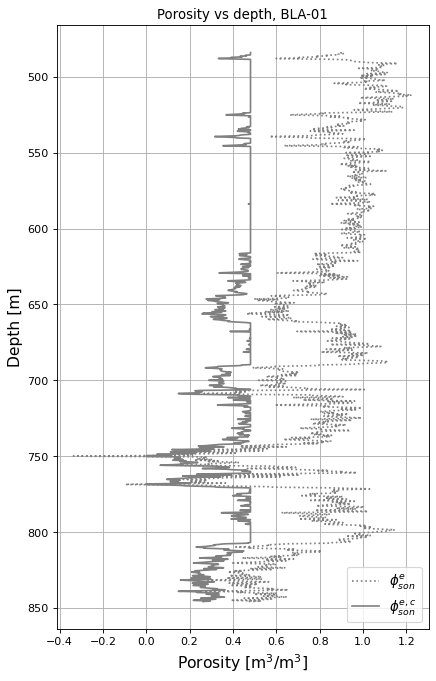

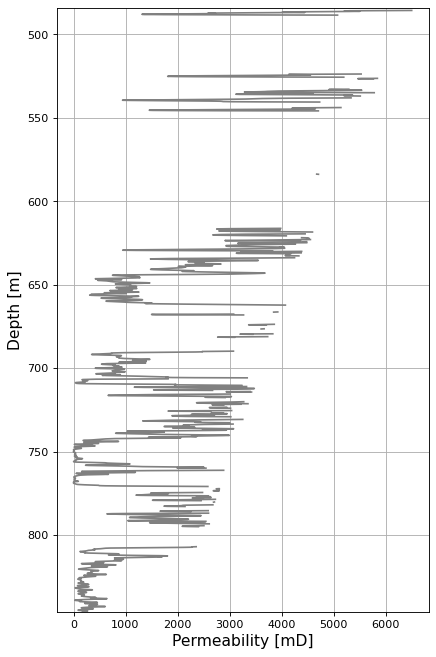

Mean K value = 1472 mD
GRV = 361.90 m, Net sand = 327.80 m, Net sand frac = 0.91


In [187]:
" Petrophysics in BLA-01 well " 

## Depth
MD = MD_BLA[2:-1]                            # Depth column without header [m]

# Top, middle and bottom boundaries and corresponding indeces
LMU = 484                                    # !! Late Miocene Unconformity [m depth]
index_LMU = int(np.where(MD==LMU)[0])
MMU = 710                                    # !! Mid Miocene Unconformity [m depth]
index_MMU = int(np.where(MD==MMU)[0])
EMU = 846                                    # !! Early Miocene Unconformity [m depth]
index_EMU = int(np.where(MD==EMU)[0])

MD_bla = MD[index_LMU:index_EMU]

## GR log
GR   = GR_BLA[2:-1]
GR   = GR[index_LMU:index_EMU]
# Vclay calculation
GRss = 22                               # Minimum GR reading
GRsh = max(GR)                               # Maximum GR reading
GRI  = (GR - GRss) / (GRsh - GRss)           # Gamma ray index
#Vcl_bla  = GRI                              # Assuming linear relationship
Vcl_bla = GRI / (3 - 2*GRI)                  # Assuming Stieber


## Sonic log
DT_full = DT_BLA[2:-1]                       # DT column without header [m]
DT = DT_full[index_LMU:index_EMU]
# Calculate sonic porosity (PHIS)
DTm   = 56                                   # Matrix transit time [micro s/ft]
DTf   = 180                                  # !! Fluid transit time [micro s/ft]
DTsh  = 180                                  # !! Transit time trough underlying shale formation [micro s/ft]
DTcsh = 100                                  # Compacted shale transit time [micro s/ft]
Cp    = DTsh / DTcsh
PHIS  = (DT - DTm)/(DTf - DTm)                 # Sonic porosity
PHISE = PHIS - Vcl_bla*(DTsh - DTm)/(DTf - DTm) # Effective Sonic porosity
PHISE_cor = PHISE*(1/Cp)                 # Sonic porosity, corrected for compaction
for i in range(len(PHISE_cor)):
    if PHISE_cor[i] < 0:
        PHISE_cor[i] = 0
    if PHISE_cor[i] > 0.48:
        PHISE_cor[i] = 0.481

# Plot porosity vs depth
plt.figure(2, figsize = (6,10), dpi=80)
#plt.plot(PHIS,MD[index_LMU:index_EMU], label = '$\phi_{son}$')
plt.plot(PHISE,MD[index_LMU:index_EMU], ':', c = 'grey', label = '$\phi_{son}^{e}$')
plt.plot(PHISE_cor,MD[index_LMU:index_EMU], c = 'grey' , label = '$\phi_{son}^{e,c}$')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]',fontsize = 14)
plt.xlabel('Porosity [m$^3$/m$^3$]',fontsize = 14)
plt.title('Porosity vs depth, BLA-01')
plt.legend(loc = 'lower right', fontsize=12)
plt.grid()
plt.show()

## Permeability
sph = 0.58                                   # Sphericity, chosen as constant from literature (Rorato et al., 2019)
i_top = np.where(LMU>M_smooth)[0][0]         # Index grain size at top 
i_bot = np.where(EMU>M_smooth)[0][0]         # Index grain size at bottom
Dpmax = xnew_M[i_top]                        # Grain size at top of this well, based on top depth (um)
Dpmin = xnew_M[i_bot]                        # Grain size at bot of this well, based on bottom depth (um)
Dp    = np.linspace(Dpmax,Dpmin,len(PHISE_cor)) / 1e6  # !! Grain sizes over depth interval in this well (m)
K = np.zeros(len(PHISE_cor))                     # !! Initiale permeability (mD)
K2 = np.zeros(len(PHISE_cor)) 
for i in range(len(PHISE_cor)):  # !!
    K[i] = sph**2 * (PHISE_cor[i]**3 * Dp[i]**2) / (150*(1-PHISE_cor[i])**2)*1.01324997e15   # !! Calculate perm trough Kozeny-Carman with Darcy (mD)
    K2[i] = sph**2 * (PHISE_cor[i]**3 * Dp[i]**2) / (150*(1-PHISE_cor[i])**2)*1.01324997e15
    if PHISE_cor[i] > 0.48:
        K[i] = 'nan'
        K2[i] = 'nan'
        

# Plot permeability vs depth
plt.figure(2, figsize = (6,10), dpi=80)        
plt.plot(K,MD[index_LMU:index_EMU], c = 'grey')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]',fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.ylim(EMU,LMU)
plt.grid()
plt.show()

K_avg = int(np.nanmean(K))
print('Mean K value =',K_avg,'mD')

## Net sand
MD_steps = np.zeros(len(MD_bla))  # !!
for i in range(0,len(MD_bla)-1):  # !!
    MD_steps[i] = MD_bla[i+1] - MD_bla[i]   # !!   # Make array of each depth entry and its depth increase
GRV = sum(MD_steps)                                # Safe GRV for this well. Used later for fraction

for i in range(len(MD_bla)):  # !!
    if PHISE_cor[i] < 0.15 or Vcl_bla[i] > 0.35: #!! # Define porosity and Vcl cutoff
        MD_steps[i] = 0                            # Apply cutoffs

MD_net = sum(MD_steps)                             # Compute net sand value
MD_netfrac = MD_net / GRV                          # Compute net sand fraction

# Print outcome
print('GRV =', "%.2f" % GRV, 'm, Net sand =', "%.2f" % MD_net, 'm, Net sand frac =', "%.2f" % MD_netfrac)
# Compute export net sand
Net_exp = MD_steps
for i in range(len(MD_steps)):
    if MD_steps[i] > 0:
        Net_exp[i] = 1                           # Create array where included cells are 1 and excluded cells 0

## New permeability for non reservoir rock
for i in range(len(Net_exp)):
    if Net_exp[i] == 0:
        K2[i] = 10 
        
## Export to las file
MD_final = np.zeros(len(K))
PHISE_exp = np.zeros(len(K))
for i in range(len(K)):
    MD_final[i] = MD[index_LMU:index_EMU][i] # !!
    PHISE_exp[i] = PHISE_cor[i]

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Phi eff', PHISE_exp, unit = 'm3/m3', descr = 'Porosity') # !!
las.add_curve('Perm', K,   unit = 'mD',    descr = 'Permeability')
las.add_curve('NTG', Net_exp , unit = ' ', descr = 'NTG')
las.write('BLA_01_porperm.las', version=2) # !!

In [188]:
phi_bla = PHISE_cor

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Perm', K2,   unit = 'mD',    descr = 'Permeability')
las.write('BLA_01_porperm2.las', version=2) # !!

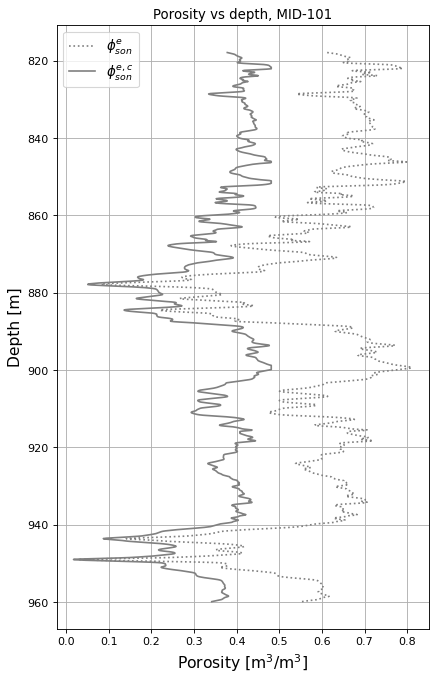

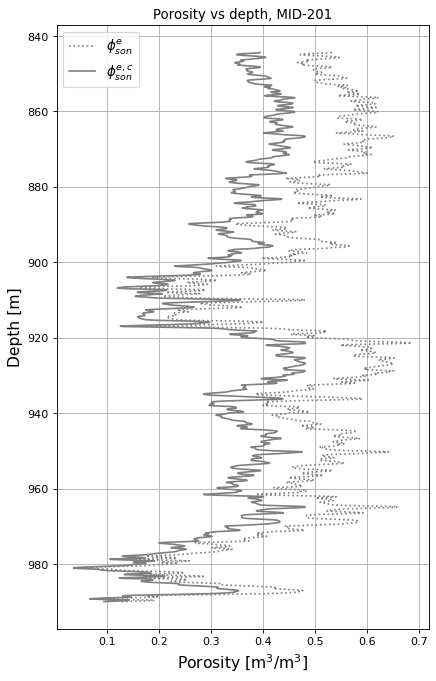

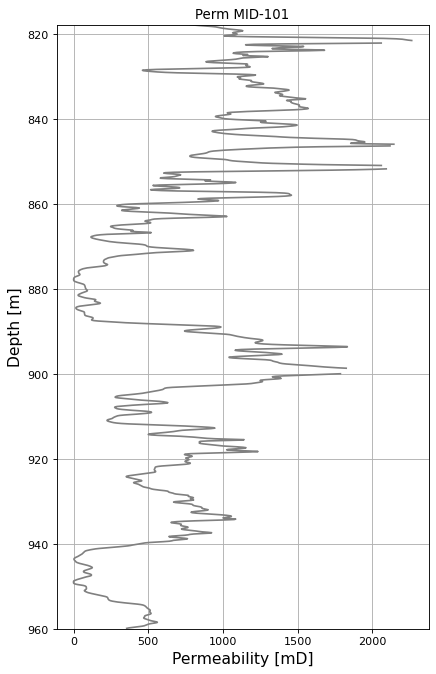

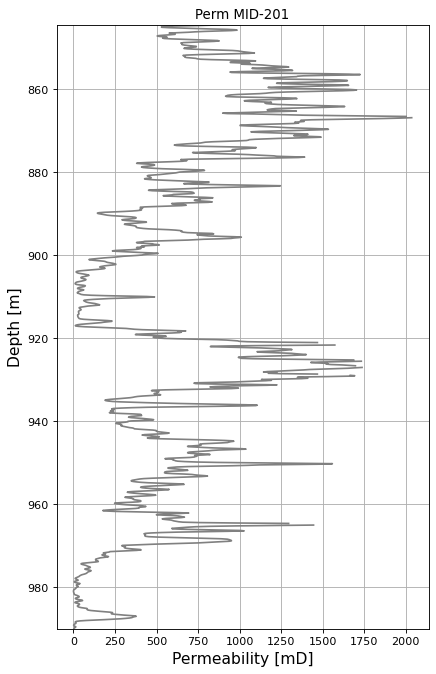

Mean K1 value = 720 mD
Mean K2 value = 606 mD
GRV1 = 142.00 m, Net sand1 = 90.90 m, Net sand frac1 = 0.64
GRV2 = 145.50 m, Net sand2 = 96.70 m, Net sand frac2 = 0.66


In [184]:
"MID-101 & MID-201 wells"

## Depth
MD1 = MD_MID1[2:-1]                            # Depth column without header [m]
MD2 = MD_MID2[2:-1]                            # Depth column without header [m]

# Top, middle and bottom boundaries and corresponding indeces
LMU1 = 817.9                                    # !! Late Miocene Unconformity [m depth]
index_LMU1 = int(np.where(MD1==LMU1)[0])
MMU1 = 876.5                                    # !! Mid Miocene Unconformity [m depth]
index_MMU1 = int(np.where(MD1==MMU1)[0])
EMU1 = 960                                      # !! Early Miocene Unconformity [m depth]
index_EMU1 = int(np.where(MD1==EMU1)[0])

LMU2 = 844.4                                    # !! Late Miocene Unconformity [m depth]
index_LMU2 = int(np.where(MD2==LMU2)[0])
MMU2 = 889.4                                    # !! Mid Miocene Unconformity [m depth]
index_MMU2 = int(np.where(MD2==MMU2)[0])
EMU2 = 990                                    # !! Early Miocene Unconformity [m depth]
index_EMU2 = int(np.where(MD2==EMU2)[0])

MD_mid1 = MD[index_LMU1:index_EMU1]
MD_mid2 = MD[index_LMU2:index_EMU2]

## GR log
GR1   = GR_MID1[2:-1]
GR2   = GR_MID2[2:-1]
GR1   = GR1[index_LMU1:index_EMU1]
GR2   = GR2[index_LMU2:index_EMU2]
# Vclay calculation
GRss1 = 25                                     # Minimum GR reading
GRss2 = 24                                     # Minimum GR reading
GRsh1 = max(GR1)                               # Maximum GR reading
GRsh2 = max(GR2)                               # Maximum GR reading
GRI1  = (GR1 - GRss1) / (GRsh1 - GRss1)        # Gamma ray index
GRI2  = (GR2 - GRss2) / (GRsh2 - GRss2)        # Gamma ray index
#Vcl1  = GRI1                                   # Assuming linear relationship
#Vcl2  = GRI2                                   # Assuming linear relationship
Vcl1 = GRI1 / (3 - 2*GRI1)                       # Assuming Stieber
Vcl2 = GRI2 / (3 - 2*GRI2)                       # Assuming Stieber

## Sonic log
DT_full1 = DT_MID1[2:-1]                       # DT column without header [m]
DT_full2 = DT_MID2[2:-1]                       # DT column without header [m]
DT1 = DT_full1[index_LMU1:index_EMU1]
DT2 = DT_full2[index_LMU2:index_EMU2]
# Calculate sonic porosity (PHIS)
DTm1   = 56                                   # Matrix transit time [micro s/ft]
DTm2   = 56                                   # Matrix transit time [micro s/ft]
DTf1   = 188                                  # !! Fluid transit time [micro s/ft]
DTf2   = 184                                  # !! Fluid transit time [micro s/ft]
DTsh1  = 162                                  # !! Transit time trough underlying shale formation [micro s/ft]
DTsh2  = 135                                  # !! Transit time trough underlying shale formation [micro s/ft]
DTcsh1 = 100                                  # Compacted shale transit time [micro s/ft]
DTcsh2 = 100                                  # Compacted shale transit time [micro s/ft]
Cp1    = DTsh1 / DTcsh1
Cp2    = DTsh2 / DTcsh2
PHIS1  = (DT1 - DTm1)/(DTf1 - DTm1)                 # Sonic porosity
PHIS2  = (DT2 - DTm2)/(DTf2 - DTm2)                 # Sonic porosity
PHISE1 = PHIS1 - Vcl1*(DTsh1 - DTm1)/(DTf1 - DTm1) # Effective Sonic porosity
PHISE2 = PHIS2 - Vcl2*(DTsh2 - DTm2)/(DTf2 - DTm2) # Effective Sonic porosity
PHISE_cor1 = PHISE1*(1/Cp1)                 # Sonic porosity, corrected for compaction
PHISE_cor2 = PHISE2*(1/Cp2)                 # Sonic porosity, corrected for compaction
for i in range(len(PHISE_cor1)):
    if PHISE_cor1[i] < 0:
        PHISE_cor1[i] = 0
    if PHISE_cor1[i] > 0.48:
        PHISE_cor1[i] = 0.481
for i in range(len(PHISE_cor2)):
    if PHISE_cor2[i] < 0:
        PHISE_cor2[i] = 0
    if PHISE_cor2[i] > 0.48:
        PHISE_cor2[i] = 0.481


# Plot porosity vs depth MID-101
plt.figure(1, figsize = (6,10), dpi=80)
#plt.plot(PHIS1,MD1[index_LMU1:index_EMU1], label = '$\phi_{son}$')
plt.plot(PHISE1,MD1[index_LMU1:index_EMU1], ':', c = 'grey', label = '$\phi_{son}^{e}$')
plt.plot(PHISE_cor1,MD1[index_LMU1:index_EMU1],  c = 'grey', label = '$\phi_{son}^{e,c}$')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]',fontsize=14)
plt.xlabel('Porosity [m$^3$/m$^3$]',fontsize=14)
plt.title('Porosity vs depth, MID-101')
plt.legend(loc = 'upper left',fontsize=12)
plt.grid()
plt.show()

# Plot porosity vs depth MID-201
plt.figure(2, figsize = (6,10), dpi=80)
#plt.plot(PHIS2,MD2[index_LMU2:index_EMU2], label = '$\phi_{son}$')
plt.plot(PHISE2,MD2[index_LMU2:index_EMU2], ':', c = 'grey', label = '$\phi_{son}^{e}$')
plt.plot(PHISE_cor2,MD2[index_LMU2:index_EMU2],  c = 'grey', label = '$\phi_{son}^{e,c}$')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]',fontsize=14)
plt.xlabel('Porosity [m$^3$/m$^3$]',fontsize=14)
plt.title('Porosity vs depth, MID-201')
plt.legend(loc = 'upper left',fontsize=12)
plt.grid()
plt.show()

## Permeability
sph = 0.58                                   # Sphericity, chosen as constant from literature (Rorato et al., 2019)
i_top1 = np.where(LMU1>M_smooth)[0][0]         # Index grain size at top 
i_top2 = np.where(LMU2>M_smooth)[0][0]         # Index grain size at top 
i_bot1 = np.where(EMU1>M_smooth)[0][0]          # Index grain size at bottom
i_bot2 = np.where(EMU2>M_smooth)[0][0]          # Index grain size at bottom
Dpmax1 = xnew_M[i_top1]                        # Grain size at top of this well, based on top depth (um)
Dpmax2 = xnew_M[i_top2]                        # Grain size at top of this well, based on top depth (um)
Dpmin1 = xnew_M[i_bot1]                        # Grain size at bot of this well, based on bottom depth (um)
Dpmin2 = xnew_M[i_bot2]                        # Grain size at bot of this well, based on bottom depth (um)
Dp1    = np.linspace(Dpmax1,Dpmin1,len(PHISE_cor1)) # !! Grain sizes over depth interval in this well (um)
Dp2    = np.linspace(Dpmax2,Dpmin2,len(PHISE_cor2)) # !! Grain sizes over depth interval in this well (um)
K1 = np.zeros(len(PHISE_cor1))                     # Initiate permeability (mD)
K12 = np.zeros(len(PHISE_cor1))
K2 = np.zeros(len(PHISE_cor2))                     # Initiate permeability (mD)
K22 = np.zeros(len(PHISE_cor2))
for i in range(len(PHISE_cor1)):
    K1[i] = sph**2 * (PHISE_cor1[i]**3 * (Dp1[i]/1e6)**2) / (150*(1-PHISE_cor1[i])**2)*1.01324997e15   # !! Calculate perm trough Kozeny-Carman with Darcy (mD)
    K12[i] = sph**2 * (PHISE_cor1[i]**3 * (Dp1[i]/1e6)**2) / (150*(1-PHISE_cor1[i])**2)*1.01324997e15
    if PHISE_cor1[i] > 0.48:
        K1[i] = 'nan'
        K12[i] = 'nan'
for i in range(len(PHISE_cor2)):
    K2[i] = sph**2 * (PHISE_cor2[i]**3 * (Dp2[i]/1e6)**2) / (150*(1-PHISE_cor2[i])**2)*1.01324997e15   # !! Calculate perm trough Kozeny-Carman with Darcy (mD)
    K22[i] = sph**2 * (PHISE_cor2[i]**3 * (Dp2[i]/1e6)**2) / (150*(1-PHISE_cor2[i])**2)*1.01324997e15
    if PHISE_cor2[i] > 0.48:
        K2[i] = 'nan'
        K22[i] = 'nan'
        
# Plot permeability vs depth
plt.figure(3, figsize = (6,10), dpi=80)
plt.plot(K1,MD1[index_LMU1:index_EMU1], c = 'grey')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]', fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.ylim(EMU1,LMU1)
plt.title('Perm MID-101')
plt.grid()
plt.show()

plt.figure(4, figsize = (6,10), dpi=80)
plt.plot(K2,MD2[index_LMU2:index_EMU2], c = 'grey')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]', fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.ylim(EMU2,LMU2)
plt.title('Perm MID-201')
plt.grid()
plt.show()

K_avg1 = int(np.nanmean(K1))
K_avg2 = int(np.nanmean(K2))
print('Mean K1 value = ' + str(K_avg1) + ' mD')
print('Mean K2 value = ' + str(K_avg2) + ' mD')

## Net sand
MD_steps1 = np.zeros(len(MD_mid1))  # !!
MD_steps2 = np.zeros(len(MD_mid2))  # !!
for i in range(0,len(MD_mid1)-1):  # !!
    MD_steps1[i] = MD_mid1[i+1] - MD_mid1[i]   # !!   # Make array of each depth entry and its depth increase
GRV1 = sum(MD_steps1)                                # Safe GRV for this well. Used later for fraction
for i in range(0,len(MD_mid2)-1):  # !!
    MD_steps2[i] = MD_mid2[i+1] - MD_mid2[i]   # !!   # Make array of each depth entry and its depth increase
GRV2 = sum(MD_steps2)                                # Safe GRV for this well. Used later for fraction

for i in range(len(MD_mid1)):  # !!
    if PHISE_cor1[i] < 0.15 or Vcl1[i] > 0.35: #!! # Define porosity and Vcl cutoff
        MD_steps1[i] = 0                            # Apply cutoffs
for i in range(len(MD_mid2)):  # !!
    if PHISE_cor2[i] < 0.15 or Vcl2[i] > 0.35: #!! # Define porosity and Vcl cutoff
        MD_steps2[i] = 0                            # Apply cutoffs

MD_net1 = sum(MD_steps1)                             # Compute net sand value
MD_net2 = sum(MD_steps2)                             # Compute net sand value
MD_netfrac1 = MD_net1 / GRV1                          # Compute net sand fraction
MD_netfrac2 = MD_net2 / GRV2                          # Compute net sand fraction

# Print outcome
print('GRV1 =', "%.2f" % GRV1, 'm, Net sand1 =', "%.2f" % MD_net1, 'm, Net sand frac1 =', "%.2f" % MD_netfrac1)
print('GRV2 =', "%.2f" % GRV2, 'm, Net sand2 =', "%.2f" % MD_net2, 'm, Net sand frac2 =', "%.2f" % MD_netfrac2)
# Compute export net sand
Net_exp1 = MD_steps1
Net_exp2 = MD_steps2
for i in range(len(MD_steps1)):
    if MD_steps1[i] > 0:
        Net_exp1[i] = 1                           # Create array where included cells are 1 and excluded cells 0
for i in range(len(MD_steps2)):
    if MD_steps2[i] > 0:
        Net_exp2[i] = 1                           # Create array where included cells are 1 and excluded cells 0

## New permeability for non reservoir rock
for i in range(len(Net_exp1)):
    if Net_exp1[i] == 0:
        K12[i] = 10 
## New permeability for non reservoir rock
for i in range(len(Net_exp2)):
    if Net_exp2[i] == 0:
        K22[i] = 10 

## Export to las file
MD_final1 = np.zeros(len(K1))
MD_final2 = np.zeros(len(K2))
PHISE_exp1 = np.zeros(len(K1))
PHISE_exp2 = np.zeros(len(K2))
for i in range(len(K1)):
    MD_final1[i] = MD1[index_LMU1:index_EMU1][i] # !!
    PHISE_exp1[i] = PHISE_cor1[i]
for i in range(len(K2)):
    MD_final2[i] = MD2[index_LMU2:index_EMU2][i] # !!
    PHISE_exp2[i] = PHISE_cor2[i]

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final1, unit = 'm')
las.add_curve('Phi eff', PHISE_exp1, unit = 'm3/m3', descr = 'Porosity') # !!
las.add_curve('Perm', K1,   unit = 'mD',    descr = 'Permeability')
las.add_curve('NTG', Net_exp1, unit = ' ', descr = 'NTG')
las.write('MID_101_porperm.las', version=2) # !!

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final2, unit = 'm')
las.add_curve('Phi eff', PHISE_exp2, unit = 'm3/m3', descr = 'Porosity') # !!
las.add_curve('Perm', K2,   unit = 'mD',    descr = 'Permeability')
las.add_curve('NTG', Net_exp2, unit = ' ', descr = 'NTG')
las.write('MID_201_porperm.las', version=2) # !!

In [185]:
phi_mid1 = PHISE_cor1
phi_mid2 = PHISE_cor2

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final1, unit = 'm')
las.add_curve('Perm', K12,   unit = 'mD',    descr = 'Permeability')
las.write('MID_101_porperm2.las', version=2) # !!

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final2, unit = 'm')
las.add_curve('Perm', K22,   unit = 'mD',    descr = 'Permeability')
las.write('MID_201_porperm2.las', version=2) # !!

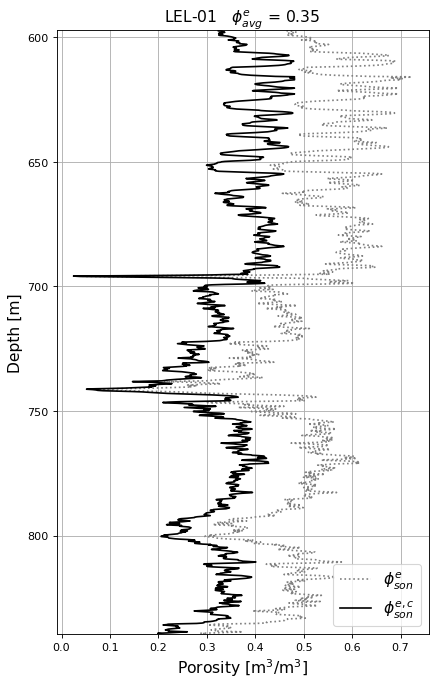

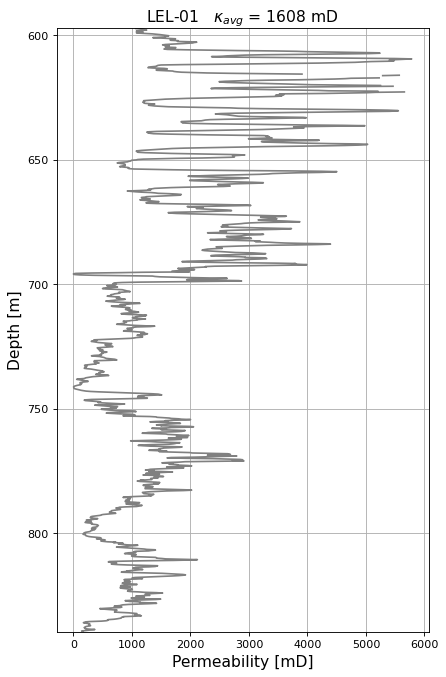

Mean K value = 1608 mD
GRV = 242.32 m, Net sand = 207.42 m, Net sand frac = 0.86


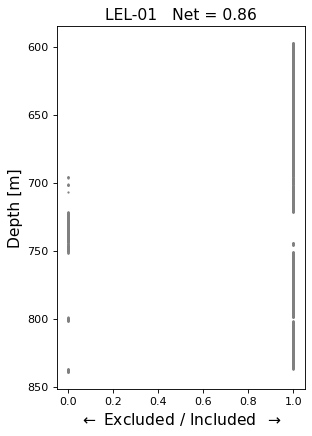

In [11]:
" Petrophysics in LEL-01 well " 

## Depth
MD = MD_LEL[2:-1]                            # Depth column without header [m]

# Top, middle and bottom boundaries and corresponding indeces
LMU = 597.103                                   # !! Late Miocene Unconformity [m depth]
index_LMU = int(np.where(MD==LMU)[0])
MMU = 696.011                                    # !! Mid Miocene Unconformity [m depth]
index_MMU = int(np.where(MD==MMU)[0])
EMU = 839.571                                   # !! Early Miocene Unconformity [m depth]
index_EMU = int(np.where(MD==EMU)[0])

MD_lel = MD[index_LMU:index_EMU]

## GR log
GR   = GR_LEL[2:-1]
GR   = GR[index_LMU:index_EMU]
# Vclay calculation
GRss = 22                               # Minimum GR reading
GRsh = max(GR)                               # Maximum GR reading
GRI  = (GR - GRss) / (GRsh - GRss)           # Gamma ray index
#Vcl_lel  = GRI                                   # Assuming linear relationship
Vcl_lel = GRI / (3 - 2*GRI)                  # Assuming Stieber

## Sonic log
DT_full = DT_LEL[2:-1]                       # DT column without header [m]
DT = DT_full[index_LMU:index_EMU]
# Calculate sonic porosity (PHIS)
DTm   = 56                                   # Matrix transit time [micro s/ft]
DTf   = 218                                  # !! Fluid transit time [micro s/ft]
DTsh  = 144                                  # !! Transit time trough underlying shale formation [micro s/ft]
DTcsh = 100                                  # Compacted shale transit time [micro s/ft]
Cp    = DTsh / DTcsh
PHIS  = (DT - DTm)/(DTf - DTm)               # Sonic porosity
PHISE = PHIS - Vcl_lel*(DTsh - DTm)/(DTf - DTm)  # Effective Sonic porosity
PHISE_cor = PHISE*(1/Cp)                     # Sonic porosity, corrected for compaction
for i in range(len(PHISE_cor)):
    if PHISE_cor[i] < 0:
        PHISE_cor[i] = 0
    if PHISE_cor[i] > 0.48:
        PHISE_cor[i] = 0.481
phi_avg = np.mean(PHISE_cor)

# Plot porosity vs depth
plt.figure(2, figsize = (6,10), dpi=80)
#plt.plot(PHIS,MD[index_LMU:index_EMU], label = '$\phi_{son}$')
plt.plot(PHISE,MD[index_LMU:index_EMU], ':', c = 'grey', label = '$\phi_{son}^{e}$')
plt.plot(PHISE_cor,MD[index_LMU:index_EMU],  c = 'black', label = '$\phi_{son}^{e,c}$')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]',fontsize=14)
plt.xlabel('Porosity [m$^3$/m$^3$]',fontsize=14)
plt.title('LEL-01   $\phi_{avg}^{e}$ = '+ str("%.2f" % phi_avg), fontsize = 14)
plt.legend(loc = 'lower right', fontsize=14)
plt.ylim(EMU,LMU)
plt.grid()
plt.show()

## Permeability
sph = 0.58                                   # Sphericity, chosen as constant from literature (Rorato et al., 2019)
i_top = np.where(LMU>M_smooth)[0][0]         # Index grain size at top 
i_bot = np.where(EMU>M_smooth)[0][0]          # Index grain size at bottom
Dpmax = xnew_M[i_top]                        # Grain size at top of this well, based on top depth (um)
Dpmin = xnew_M[i_bot]                        # Grain size at bot of this well, based on bottom depth (um)
Dp    = np.linspace(Dpmax,Dpmin,len(PHISE_cor)) # !! Grain sizes over depth interval in this well (um)
K = np.zeros(len(PHISE_cor))                     # Initiate permeability (mD)
K2 = np.zeros(len(PHISE_cor))
for i in range(len(PHISE_cor)):
    K[i] = sph**2 * (PHISE_cor[i]**3 * (Dp[i]/1e6)**2) / (150*(1-PHISE_cor[i])**2)*1.01324997e15   # !! Calculate perm trough Kozeny-Carman with Darcy (mD)
    K2[i] = sph**2 * (PHISE_cor[i]**3 * (Dp[i]/1e6)**2) / (150*(1-PHISE_cor[i])**2)*1.01324997e15
    if PHISE_cor[i] > 0.48:
        K[i] = 'nan'
        K2[i] = 'nan'
K_avg = round(np.nanmean(K))
        
# Plot permeability vs depth
plt.figure(2, figsize = (6,10), dpi=80)
plt.plot(K,MD[index_LMU:index_EMU], c = 'grey')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]', fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.title('LEL-01   $\kappa_{avg}$ = '+ str(K_avg) + ' mD', fontsize = 14)
plt.ylim(EMU,LMU)
plt.grid()
plt.show()

print('Mean K value = ' + str(K_avg) + ' mD')

## Net sand
MD_steps = np.zeros(len(MD_lel))  # !!
for i in range(0,len(MD_lel)-1):  # !!
    MD_steps[i] = MD_lel[i+1] - MD_lel[i]   # !!   # Make array of each depth entry and its depth increase
GRV = sum(MD_steps)                                # Safe GRV for this well. Used later for fraction

for i in range(len(MD_lel)):  # !!
    if PHISE_cor[i] < 0.15 or Vcl_lel[i] > 0.35: #!! # Define porosity and Vcl cutoff
        MD_steps[i] = 0                            # Apply cutoffs

MD_net = sum(MD_steps)                             # Compute net sand value
MD_netfrac = MD_net / GRV                          # Compute net sand fraction

# Print outcome
print('GRV =', "%.2f" % GRV, 'm, Net sand =', "%.2f" % MD_net, 'm, Net sand frac =', "%.2f" % MD_netfrac)
# Compute export net sand
Net_exp = MD_steps
for i in range(len(MD_steps)):
    if MD_steps[i] > 0:
        Net_exp[i] = 1                           # Create array where included cells are 1 and excluded cells 0

## New permeability for non reservoir rock
for i in range(len(Net_exp)):
    if Net_exp[i] == 0:
        K2[i] = 10 

plt.figure(7, figsize = (4,6), dpi=80)
plt.scatter(Net_exp, MD_lel, c = 'grey', s = 1)
plt.gca().invert_yaxis()
plt.title('LEL-01   Net = '+ str("%.2f" % MD_netfrac), fontsize = 14)
plt.ylabel('Depth [m]', fontsize = 14)
plt.xlabel(r'$\leftarrow$ Excluded / Included $\;\rightarrow$', fontsize = 14)
plt.show()
        
## Export to las file
MD_final = np.zeros(len(K))
PHISE_exp = np.zeros(len(K))
for i in range(len(K)):
    MD_final[i] = MD[index_LMU:index_EMU][i] # !!
    PHISE_exp[i] = PHISE_cor[i]

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Phi eff', PHISE_exp, unit = 'm3/m3', descr = 'Porosity') # !!
las.add_curve('Perm', K,   unit = 'mD',    descr = 'Permeability')
las.add_curve('NTG', Net_exp, unit = ' ', descr = 'NTG')
las.write('LEL_01_porperm.las', version=2) # !!

In [190]:
phi_lel = PHISE_cor

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Perm', K2,   unit = 'mD',    descr = 'Permeability')
las.write('LEL_01_porperm2.las', version=2) # !!

<ipython-input-191-f9dcf83b358d>:40: RuntimeWarning: invalid value encountered in less
  if PHISE_cor[i] < 0:
<ipython-input-191-f9dcf83b358d>:42: RuntimeWarning: invalid value encountered in greater
  if PHISE_cor[i] > 0.48:


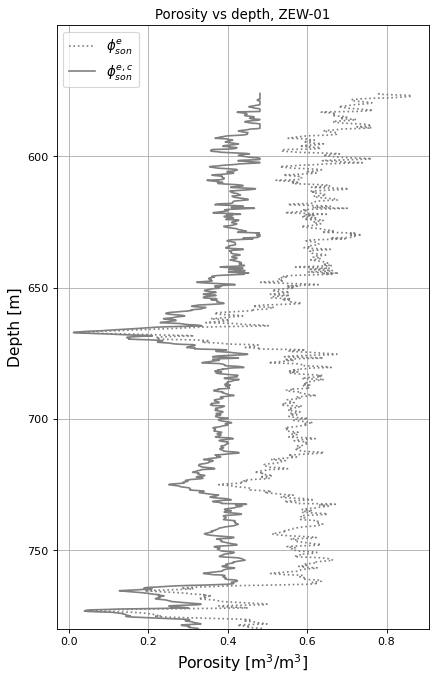

<ipython-input-191-f9dcf83b358d>:71: RuntimeWarning: invalid value encountered in greater
  if PHISE_cor[i] > 0.48:


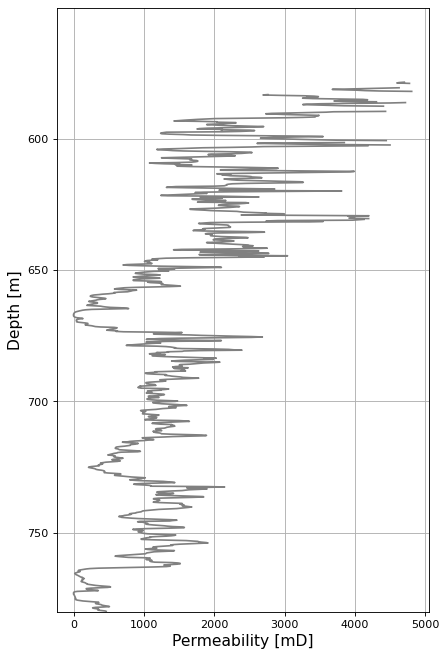

Mean K value = 1422 mD
GRV = 229.97 m, Net sand = 198.58 m, Net sand frac = 0.86


<ipython-input-191-f9dcf83b358d>:95: RuntimeWarning: invalid value encountered in less
  if PHISE_cor[i] < 0.15 or Vcl_zew[i] > 0.35: #!! # Define porosity and Vcl cutoff


In [191]:
" Petrophysics in ZEW-01 well " 

## Depth
MD = MD_ZEW[2:-1]                                # Depth column without header [m]

# Top, middle and bottom boundaries and corresponding indeces
LMU = 550.012                         # !! Late Miocene Unconformity [m depth]
index_LMU = int(np.where(MD==LMU)[0])
MMU = 656.082                                    # !! Mid Miocene Unconformity [m depth]
index_MMU = int(np.where(MD==MMU)[0])
EMU = 780.136                                    # !! Early Miocene Unconformity [m depth]
index_EMU = int(np.where(MD==EMU)[0])

MD_zew = MD[index_LMU:index_EMU]

## GR log
GR   = GR_ZEW[2:-1]
GR   = GR[index_LMU:index_EMU]
# Vclay calculation
GRss = 22                                        # Minimum GR reading
GRsh = max(GR)                                   # Maximum GR reading
GRI  = (GR - GRss) / (GRsh - GRss)               # Gamma ray index
#Vcl_zew  = GRI                                   # Assuming linear relationship
Vcl_zew = GRI / (3 - 2*GRI)                  # Assuming Stieber


## Sonic log
DT_full = DT_ZEW[2:-1]                           # DT column without header [m]
DT = DT_full[index_LMU:index_EMU]
# Calculate sonic porosity (PHIS)
DTm   = 56                                       # Matrix transit time [micro s/ft]
DTf   = 189                                      # !! Fluid transit time [micro s/ft]
DTsh  = 150                                      # !! Transit time trough underlying shale formation [micro s/ft]
DTcsh = 100                                      # Compacted shale transit time [micro s/ft]
Cp    = DTsh / DTcsh
PHIS  = (DT - DTm)/(DTf - DTm)                   # Sonic porosity
PHISE = PHIS - Vcl_zew*(DTsh - DTm)/(DTf - DTm)  # Effective Sonic porosity
PHISE_cor = PHISE*(1/Cp)                         # Sonic porosity, corrected for compaction
for i in range(len(PHISE_cor)):
    if PHISE_cor[i] < 0:
        PHISE_cor[i] = 0
    if PHISE_cor[i] > 0.48: 
        PHISE_cor[i] = 0.481

# Plot porosity vs depth
plt.figure(2, figsize = (6,10), dpi=80)
#plt.plot(PHIS,MD[index_LMU:index_EMU], label = '$\phi_{son}$')
plt.plot(PHISE,MD[index_LMU:index_EMU], ':', c = 'grey', label = '$\phi_{son}^{e}$')
plt.plot(PHISE_cor,MD[index_LMU:index_EMU],  c = 'grey', label = '$\phi_{son}^{e,c}$')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]',fontsize=14)
plt.xlabel('Porosity [m$^3$/m$^3$]',fontsize=14)
plt.title('Porosity vs depth, ZEW-01')
plt.ylim(EMU,LMU)
plt.legend(loc = 'upper left', fontsize=12)
plt.grid()
plt.show()

## Permeability
sph = 0.58                                   # Sphericity, chosen as constant from literature (Rorato et al., 2019)
i_top = np.where(LMU>M_smooth)[0][0]         # Index grain size at top 
i_bot = np.where(EMU>M_smooth)[0][0]          # Index grain size at bottom
Dpmax = xnew_M[i_top]                        # Grain size at top of this well, based on top depth (um)
Dpmin = xnew_M[i_bot]                        # Grain size at bot of this well, based on bottom depth (um)
Dp    = np.linspace(Dpmax,Dpmin,len(PHISE_cor)) # !! Grain sizes over depth interval in this well (um)
K = np.zeros(len(PHISE_cor))                     # Initiate permeability (mD)
K2 = np.zeros(len(PHISE_cor))
for i in range(len(PHISE_cor)):
    K[i] = sph**2 * (PHISE_cor[i]**3 * (Dp[i]/1e6)**2) / (150*(1-PHISE_cor[i])**2)*1.01324997e15   # !! Calculate perm trough Kozeny-Carman with Darcy (mD)
    K2[i] = sph**2 * (PHISE_cor[i]**3 * (Dp[i]/1e6)**2) / (150*(1-PHISE_cor[i])**2)*1.01324997e15
    if PHISE_cor[i] > 0.48:
        K[i] = 'nan'
        K2[i] = 'nan'

# Plot permeability vs depth
plt.figure(2, figsize = (6,10), dpi=80)
plt.plot(K,MD[index_LMU:index_EMU], c = 'grey')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]', fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.ylim(EMU,LMU)
plt.grid()
plt.show()

K_avg = int(np.nanmean(K))
print('Mean K value = ' + str(K_avg) + ' mD')

## Net sand
MD_steps = np.zeros(len(MD_zew))  # !!
for i in range(0,len(MD_zew)-1):  # !!
    MD_steps[i] = MD_zew[i+1] - MD_zew[i]   # !!   # Make array of each depth entry and its depth increase
GRV = sum(MD_steps)                                # Safe GRV for this well. Used later for fraction

for i in range(len(MD_zew)):  # !!
    if PHISE_cor[i] < 0.15 or Vcl_zew[i] > 0.35: #!! # Define porosity and Vcl cutoff
        MD_steps[i] = 0                            # Apply cutoffs

MD_net = sum(MD_steps)                             # Compute net sand value
MD_netfrac = MD_net / GRV                          # Compute net sand fraction

# Print outcome
print('GRV =', "%.2f" % GRV, 'm, Net sand =', "%.2f" % MD_net, 'm, Net sand frac =', "%.2f" % MD_netfrac)
# Compute export net sand
Net_exp = MD_steps
for i in range(len(MD_steps)):
    if MD_steps[i] > 0:
        Net_exp[i] = 1                           # Create array where included cells are 1 and excluded cells 0

## New permeability for non reservoir rock
for i in range(len(Net_exp)):
    if Net_exp[i] == 0:
        K2[i] = 10 
        
## Export to las file
MD_final = np.zeros(len(K))
PHISE_exp = np.zeros(len(K))
for i in range(len(K)):
    MD_final[i] = MD[index_LMU:index_EMU][i] # !!
    PHISE_exp[i] = PHISE_cor[i]

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Phi eff', PHISE_exp, unit = 'm3/m3', descr = 'Porosity') # !!
las.add_curve('Perm', K,   unit = 'mD',    descr = 'Permeability')
las.add_curve('NTG', Net_exp, unit = ' ', descr = 'NTG')
las.write('ZEW_01_porperm.las', version=2) # !!

In [192]:
phi_zew = PHISE_cor

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Perm', K2,   unit = 'mD',    descr = 'Permeability')
las.write('ZEW_01_porperm2.las', version=2) # !!

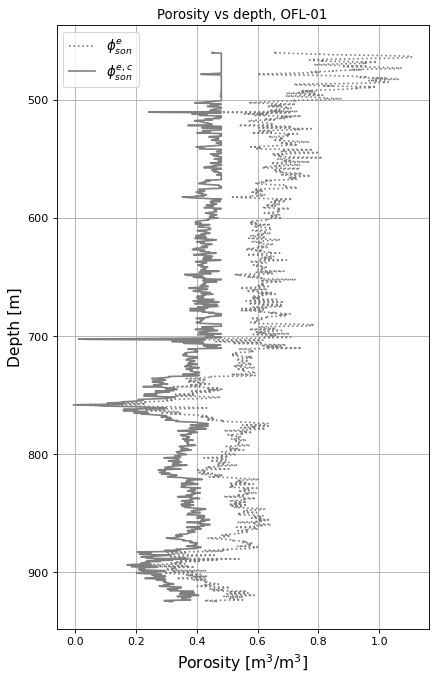

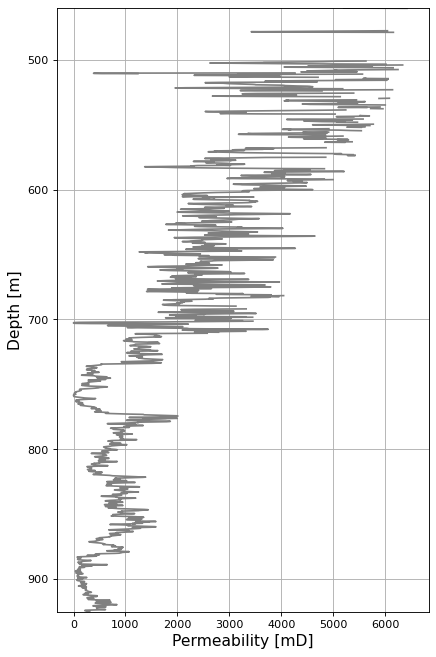

Mean K value = 1840 mD
GRV = 464.82 m, Net sand = 385.72 m, Net sand frac = 0.83


In [193]:
" Petrophysics in OFL-01 well " 

## Depth
MD = MD_OFL[2:-1]                               # Depth column without header [m]

# Top, middle and bottom boundaries and corresponding indeces
LMU = 460.095                        # !! Late Miocene Unconformity [m depth]
index_LMU = int(np.where(MD==LMU)[0])
MMU = 703.021                                   # !! Mid Miocene Unconformity [m depth]
index_MMU = int(np.where(MD==MMU)[0])
EMU = 925.068                                   # !! Early Miocene Unconformity [m depth]
index_EMU = int(np.where(MD==EMU)[0])

MD_ofl = MD[index_LMU:index_EMU]

## GR log
GR   = GR_OFL[2:-1]
GR   = GR[index_LMU:index_EMU]
# Vclay calculation
GRss = 20                                       # Minimum GR reading
GRsh = max(GR)                                  # Maximum GR reading
GRI  = (GR - GRss) / (GRsh - GRss)              # Gamma ray index
#Vcl_ofl  = GRI                                  # Assuming linear relationship
Vcl_ofl = GRI / (3 - 2*GRI)                  # Assuming Stieber


## Sonic log
DT_full = DT_OFL[2:-1]                          # DT column without header [m]
DT = DT_full[index_LMU:index_EMU]
# Calculate sonic porosity (PHIS)
DTm   = 56                                      # Matrix transit time [micro s/ft]
DTf   = 183                                     # !! Fluid transit time [micro s/ft]
DTsh  = 145                                     # !! Transit time trough underlying shale formation [micro s/ft]
DTcsh = 100                                     # Compacted shale transit time [micro s/ft]
Cp    = DTsh / DTcsh
PHIS  = (DT - DTm)/(DTf - DTm)                  # Sonic porosity
PHISE = PHIS - Vcl_ofl*(DTsh - DTm)/(DTf - DTm) # Effective Sonic porosity
PHISE_cor = PHISE*(1/Cp)                        # Sonic porosity, corrected for compaction
for i in range(len(PHISE_cor)):
    if PHISE_cor[i] < 0:
        PHISE_cor[i] = 0
    if PHISE_cor[i] > 0.48:
        PHISE_cor[i] = 0.481

# Plot porosity vs depth
plt.figure(2, figsize = (6,10), dpi=80)
#plt.plot(PHIS,MD[index_LMU:index_EMU], label = '$\phi_{son}$')
plt.plot(PHISE,MD[index_LMU:index_EMU], ':', c = 'grey', label = '$\phi_{son}^{e}$')
plt.plot(PHISE_cor,MD[index_LMU:index_EMU],  c = 'grey', label = '$\phi_{son}^{e,c}$')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]', fontsize = 14)
plt.xlabel('Porosity [m$^3$/m$^3$]', fontsize = 14)
plt.title('Porosity vs depth, OFL-01')
plt.legend(loc = 'upper left', fontsize=12)
plt.grid()
plt.show()

## Permeability
sph = 0.58                                   # Sphericity, chosen as constant from literature (Rorato et al., 2019)
i_top = np.where(LMU>M_smooth)[0][0]         # Index grain size at top 
i_bot = np.where(EMU>M_smooth)[0][0]          # Index grain size at bottom
Dpmax = xnew_M[i_top]                        # Grain size at top of this well, based on top depth (um)
Dpmin = xnew_M[i_bot]                        # Grain size at bot of this well, based on bottom depth (um)
Dp    = np.linspace(Dpmax,Dpmin,len(PHISE_cor)) # !! Grain sizes over depth interval in this well (um)
K = np.zeros(len(PHISE_cor))                     # Initiate permeability (mD)
K2 = np.zeros(len(PHISE_cor))
for i in range(len(PHISE_cor)):
    K[i] = sph**2 * (PHISE_cor[i]**3 * (Dp[i]/1e6)**2) / (150*(1-PHISE_cor[i])**2)*1.01324997e15   # !! Calculate perm trough Kozeny-Carman with Darcy (mD)
    K2[i] = sph**2 * (PHISE_cor[i]**3 * (Dp[i]/1e6)**2) / (150*(1-PHISE_cor[i])**2)*1.01324997e15
    if PHISE_cor[i] > 0.48:
        K[i] = 'nan'
        K2[i] = 'nan'
        
# Plot permeability vs depth
plt.figure(2, figsize = (6,10), dpi=80)
plt.plot(K,MD[index_LMU:index_EMU], c = 'grey')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]', fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.ylim(EMU,LMU)
plt.grid()
plt.show()

K_avg = int(np.nanmean(K))
print('Mean K value = ' + str(K_avg) + ' mD')

## Net sand
MD_steps = np.zeros(len(MD_ofl))  # !!
for i in range(0,len(MD_ofl)-1):  # !!
    MD_steps[i] = MD_ofl[i+1] - MD_ofl[i]   # !!   # Make array of each depth entry and its depth increase
GRV = sum(MD_steps)                                # Safe GRV for this well. Used later for fraction

for i in range(len(MD_ofl)):  # !!
    if PHISE_cor[i] < 0.15 or Vcl_ofl[i] > 0.35: #!! # Define porosity and Vcl cutoff
        MD_steps[i] = 0                            # Apply cutoffs

MD_net = sum(MD_steps)                             # Compute net sand value
MD_netfrac = MD_net / GRV                          # Compute net sand fraction

# Print outcome
print('GRV =', "%.2f" % GRV, 'm, Net sand =', "%.2f" % MD_net, 'm, Net sand frac =', "%.2f" % MD_netfrac)
# Compute export net sand
Net_exp = MD_steps
for i in range(len(MD_steps)):
    if MD_steps[i] > 0:
        Net_exp[i] = 1                           # Create array where included cells are 1 and excluded cells 0

## New permeability for non reservoir rock
for i in range(len(Net_exp)):
    if Net_exp[i] == 0:
        K2[i] = 10 
        
## Export to las file
MD_final = np.zeros(len(K))
PHISE_exp = np.zeros(len(K))
for i in range(len(K)):
    MD_final[i] = MD[index_LMU:index_EMU][i] # !!
    PHISE_exp[i] = PHISE_cor[i]

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Phi eff', PHISE_exp, unit = 'm3/m3', descr = 'Porosity') # !!
las.add_curve('Perm', K,   unit = 'mD',    descr = 'Permeability')
las.add_curve('NTG', Net_exp, unit = ' ', descr = 'NTG')
las.write('OFL_01_porperm.las', version=2) # !!

In [194]:
phi_ofl = PHISE_cor

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Perm', K2,   unit = 'mD',    descr = 'Permeability')
las.write('OFL_01_porperm2.las', version=2) # !!

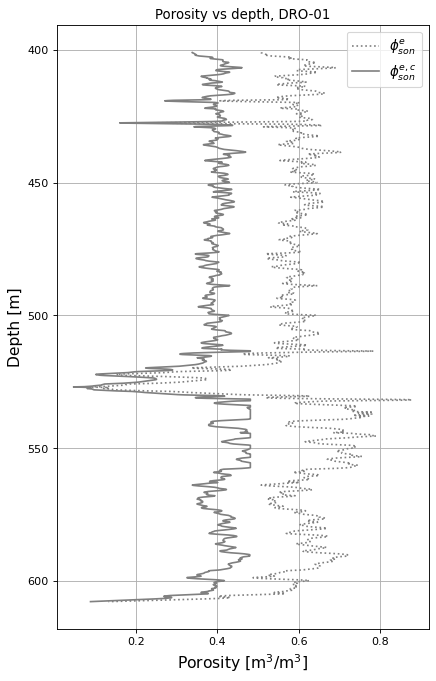

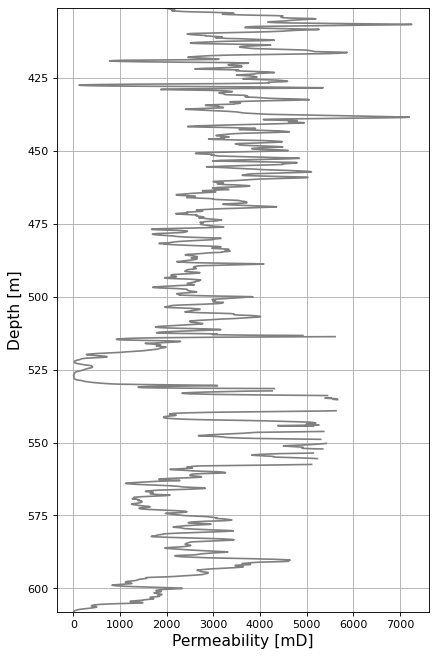

Mean K value = 2819 mD
GRV = 206.90 m, Net sand = 179.70 m, Net sand frac = 0.87


In [195]:
" Petrophysics in DRO-01 well "

## Depth
MD = MD_DRO[2:-1]                            # Depth column without header [m]

# Top, middle and bottom boundaries and corresponding indeces
LMU = 401 #UNCERTAIN                        # !! Late Miocene Unconformity [m depth]
index_LMU = int(np.where(MD==LMU)[0])
MMU = 520                                    # !! Mid Miocene Unconformity [m depth]
index_MMU = int(np.where(MD==MMU)[0])
EMU = 608                                   # !! Early Miocene Unconformity [m depth]
index_EMU = int(np.where(MD==EMU)[0])

MD_dro = MD[index_LMU:index_EMU]

## GR log
GR   = GR_DRO[2:-1]
GR   = GR[index_LMU:index_EMU]
# Vclay calculation
GRss = 20                               # Minimum GR reading
GRsh = max(GR)                               # Maximum GR reading
GRI  = (GR - GRss) / (GRsh - GRss)           # Gamma ray index
#Vcl_dro  = GRI                                   # Assuming linear relationship
Vcl_dro = GRI / (3 - 2*GRI)                  # Assuming Stieber


## Sonic log
DT_full = DT_DRO[2:-1]                       # DT column without header [m]
DT = DT_full[index_LMU:index_EMU]
# Calculate sonic porosity (PHIS)
DTm   = 56                                   # Matrix transit time [micro s/ft]
DTf   = 183                                  # !! Fluid transit time [micro s/ft]
DTsh  = 150                                  # !! Transit time trough underlying shale formation [micro s/ft]
DTcsh = 100                                  # Compacted shale transit time [micro s/ft]
Cp    = DTsh / DTcsh
PHIS  = (DT - DTm)/(DTf - DTm)               # Sonic porosity
PHISE = PHIS - Vcl_dro*(DTsh - DTm)/(DTf - DTm)  # Effective Sonic porosity
PHISE_cor = PHISE*(1/Cp)                     # Sonic porosity, corrected for compaction
for i in range(len(PHISE_cor)):
    if PHISE_cor[i] > 0.48:
        PHISE_cor[i] = 0.481

# Plot porosity vs depth
plt.figure(2, figsize = (6,10), dpi=80)
#plt.plot(PHIS,MD[index_LMU:index_EMU], label = '$\phi_{son}$')
plt.plot(PHISE,MD[index_LMU:index_EMU], ':', c = 'grey', label = '$\phi_{son}^{e}$')
plt.plot(PHISE_cor,MD[index_LMU:index_EMU],  c = 'grey', label = '$\phi_{son}^{e,c}$')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]', fontsize = 14)
plt.xlabel('Porosity [m$^3$/m$^3$]', fontsize = 14)
plt.title('Porosity vs depth, DRO-01')
plt.legend(loc = 'upper right', fontsize=12)
plt.grid()
plt.show()

## Permeability
sph = 0.58                                   # Sphericity, chosen as constant from literature (Rorato et al., 2019)
i_top = np.where(LMU>M_smooth)[0][0]         # Index grain size at top 
i_bot = np.where(EMU>M_smooth)[0][0]          # Index grain size at bottom
Dpmax = xnew_M[i_top]                        # Grain size at top of this well, based on top depth (um)
Dpmin = xnew_M[i_bot]                        # Grain size at bot of this well, based on bottom depth (um)
Dp    = np.linspace(Dpmax,Dpmin,len(PHISE_cor)) # !! Grain sizes over depth interval in this well (um)
K = np.zeros(len(PHISE_cor))                     # Initiate permeability (mD)
K2 = np.zeros(len(PHISE_cor))
for i in range(len(PHISE_cor)):
    K[i] = sph**2 * (PHISE_cor[i]**3 * (Dp[i]/1e6)**2) / (150*(1-PHISE_cor[i])**2)*1.01324997e15   # !! Calculate perm trough Kozeny-Carman with Darcy (mD)
    K2[i] = sph**2 * (PHISE_cor[i]**3 * (Dp[i]/1e6)**2) / (150*(1-PHISE_cor[i])**2)*1.01324997e15
    if PHISE_cor[i] > 0.48:
        K[i] = 'nan'
        K2[i] = 'nan'
        
# Plot permeability vs depth
plt.figure(2, figsize = (6,10), dpi=80)
plt.plot(K,MD[index_LMU:index_EMU], c = 'grey')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]', fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.ylim(EMU,LMU)
plt.grid()
plt.show()

K_avg = int(np.nanmean(K))
print('Mean K value = ' + str(K_avg) + ' mD')

## Net sand
MD_steps = np.zeros(len(MD_dro))  # !!
for i in range(0,len(MD_dro)-1):  # !!
    MD_steps[i] = MD_dro[i+1] - MD_dro[i]   # !!   # Make array of each depth entry and its depth increase
GRV = sum(MD_steps)                                # Safe GRV for this well. Used later for fraction

for i in range(len(MD_dro)):  # !!
    if PHISE_cor[i] < 0.15 or Vcl_dro[i] > 0.35: #!! # Define porosity and Vcl cutoff
        MD_steps[i] = 0                            # Apply cutoffs

MD_net = sum(MD_steps)                             # Compute net sand value
MD_netfrac = MD_net / GRV                          # Compute net sand fraction

# Print outcome
print('GRV =', "%.2f" % GRV, 'm, Net sand =', "%.2f" % MD_net, 'm, Net sand frac =', "%.2f" % MD_netfrac)
# Compute export net sand
Net_exp = MD_steps
for i in range(len(MD_steps)):
    if MD_steps[i] > 0:
        Net_exp[i] = 1                           # Create array where included cells are 1 and excluded cells 0

## New permeability for non reservoir rock
for i in range(len(Net_exp)):
    if Net_exp[i] == 0:
        K2[i] = 10 
        
## Export to las file
MD_final = np.zeros(len(K))
PHISE_exp = np.zeros(len(K))
for i in range(len(K)):
    MD_final[i] = MD[index_LMU:index_EMU][i] # !!
    PHISE_exp[i] = PHISE_cor[i]

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Phi eff', PHISE_exp, unit = 'm3/m3', descr = 'Porosity') # !!
las.add_curve('Perm', K,   unit = 'mD',    descr = 'Permeability')
las.add_curve('NTG', Net_exp, unit = ' ', descr = 'NTG')
las.write('DRO_01_porperm.las', version=2) # !!

In [196]:
phi_dro = PHISE_cor

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Perm', K2,   unit = 'mD',    descr = 'Permeability')
las.write('DRO_01_porperm2.las', version=2) # !!

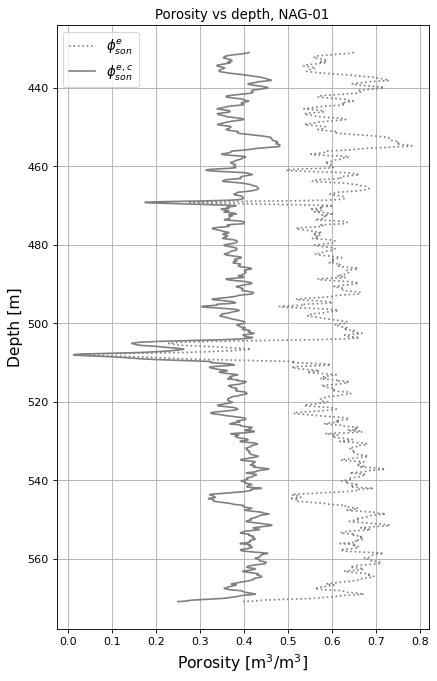

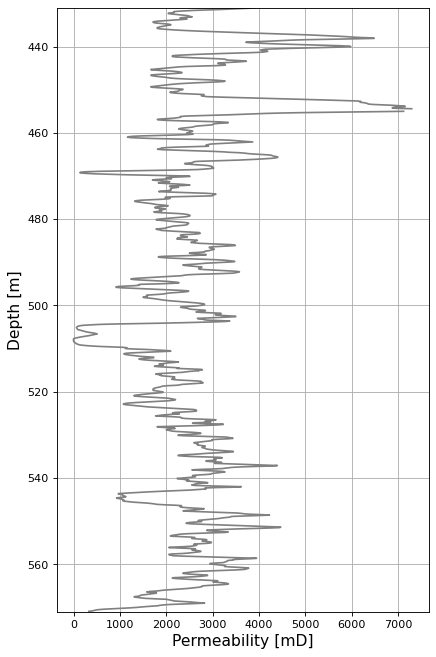

Mean K value = 2501 mD
GRV = 139.90 m, Net sand = 129.00 m, Net sand frac = 0.92


In [197]:
" Petrophysics in NAG-01 well "

## Depth
MD = MD_NAG[2:-1]                            # Depth column without header [m]

# Top, middle and bottom boundaries and corresponding indeces
LMU = 431 #UNCERTAIN                        # !! Late Miocene Unconformity [m depth]
index_LMU = int(np.where(MD==LMU)[0])
MMU = 504                                    # !! Mid Miocene Unconformity [m depth]
index_MMU = int(np.where(MD==MMU)[0])
EMU = 571                                   # !! Early Miocene Unconformity [m depth]
index_EMU = int(np.where(MD==EMU)[0])

MD_nag = MD[index_LMU:index_EMU]

## GR log
GR   = GR_NAG[2:-1]
GR   = GR[index_LMU:index_EMU]
# Vclay calculation
GRss = 20                                    # Minimum GR reading
GRsh = max(GR)                               # Maximum GR reading
GRI  = (GR - GRss) / (GRsh - GRss)           # Gamma ray index
#Vcl_nag  = GRI                              # Assuming linear relationship
Vcl_nag = GRI / (3 - 2*GRI)                  # Assuming Stieber


## Sonic log
DT_full = DT_NAG[2:-1]                       # DT column without header [m]
DT = DT_full[index_LMU:index_EMU]
# Calculate sonic porosity (PHIS)
DTm   = 56                                   # Matrix transit time [micro s/ft]
DTf   = 188                                  # !! Fluid transit time [micro s/ft]
DTsh  = 158                                  # !! Transit time trough underlying shale formation [micro s/ft]
DTcsh = 100                                  # Compacted shale transit time [micro s/ft]
Cp    = DTsh / DTcsh
PHIS  = (DT - DTm)/(DTf - DTm)               # Sonic porosity
PHISE = PHIS - Vcl_nag*(DTsh - DTm)/(DTf - DTm)  # Effective Sonic porosity
PHISE_cor = PHISE*(1/Cp)                     # Sonic porosity, corrected for compaction
for i in range(len(PHISE_cor)):
    if PHISE_cor[i] > 0.48:
        PHISE_cor[i] = 0.481

# Plot porosity vs depth
plt.figure(2, figsize = (6,10), dpi=80)
#plt.plot(PHIS,MD[index_LMU:index_EMU], label = '$\phi_{son}$')
plt.plot(PHISE,MD[index_LMU:index_EMU], ':', c = 'grey', label = '$\phi_{son}^{e}$')
plt.plot(PHISE_cor,MD[index_LMU:index_EMU],  c = 'grey', label = '$\phi_{son}^{e,c}$')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]', fontsize = 14)
plt.xlabel('Porosity [m$^3$/m$^3$]', fontsize = 14)
plt.title('Porosity vs depth, NAG-01')
plt.legend(loc = 'upper left', fontsize=12)
plt.grid()
plt.show()

## Permeability
sph = 0.58                                   # Sphericity, chosen as constant from literature (Rorato et al., 2019)
i_top = np.where(LMU>M_smooth)[0][0]         # Index grain size at top 
i_bot = np.where(EMU>M_smooth)[0][0]          # Index grain size at bottom
Dpmax = xnew_M[i_top]                        # Grain size at top of this well, based on top depth (um)
Dpmin = xnew_M[i_bot]                        # Grain size at bot of this well, based on bottom depth (um)
Dp    = np.linspace(Dpmax,Dpmin,len(PHISE_cor)) # !! Grain sizes over depth interval in this well (um)
K = np.zeros(len(PHISE_cor))                     # Initiate permeability (mD)
K2 = np.zeros(len(PHISE_cor))
for i in range(len(PHISE_cor)):
    K[i] = sph**2 * (PHISE_cor[i]**3 * (Dp[i]/1e6)**2) / (150*(1-PHISE_cor[i])**2)*1.01324997e15   # !! Calculate perm trough Kozeny-Carman with Darcy (mD)
    K2[i] = sph**2 * (PHISE_cor[i]**3 * (Dp[i]/1e6)**2) / (150*(1-PHISE_cor[i])**2)*1.01324997e15
    if PHISE_cor[i] > 0.48:
        K[i] = 'nan'
        K2[i] = 'nan'
        
# Plot permeability vs depth
plt.figure(2, figsize = (6,10), dpi=80)
plt.plot(K,MD[index_LMU:index_EMU], c = 'grey')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]', fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.ylim(EMU,LMU)
plt.grid()
plt.show()

K_avg = int(np.nanmean(K))
print('Mean K value = ' + str(K_avg) + ' mD')

## Net sand
MD_steps = np.zeros(len(MD_nag))  # !!
for i in range(0,len(MD_nag)-1):  # !!
    MD_steps[i] = MD_nag[i+1] - MD_nag[i]   # !!   # Make array of each depth entry and its depth increase
GRV = sum(MD_steps)                                # Safe GRV for this well. Used later for fraction

for i in range(len(MD_nag)):  # !!
    if PHISE_cor[i] < 0.15 or Vcl_nag[i] > 0.35: #!! # Define porosity and Vcl cutoff
        MD_steps[i] = 0                            # Apply cutoffs

MD_net = sum(MD_steps)                             # Compute net sand value
MD_netfrac = MD_net / GRV                          # Compute net sand fraction

# Print outcome
print('GRV =', "%.2f" % GRV, 'm, Net sand =', "%.2f" % MD_net, 'm, Net sand frac =', "%.2f" % MD_netfrac)
# Compute export net sand
Net_exp = MD_steps
for i in range(len(MD_steps)):
    if MD_steps[i] > 0:
        Net_exp[i] = 1                           # Create array where included cells are 1 and excluded cells 0

## New permeability for non reservoir rock
for i in range(len(Net_exp)):
    if Net_exp[i] == 0:
        K2[i] = 10 
        
## Export to las file
MD_final = np.zeros(len(K))
PHISE_exp = np.zeros(len(K))
for i in range(len(K)):
    MD_final[i] = MD[index_LMU:index_EMU][i] # !!
    PHISE_exp[i] = PHISE_cor[i]

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Phi eff', PHISE_exp, unit = 'm3/m3', descr = 'Porosity') # !!
las.add_curve('Perm', K,   unit = 'mD',    descr = 'Permeability')
las.add_curve('NTG', Net_exp, unit = ' ', descr = 'NTG')
las.write('NAG_01_porperm.las', version=2) # !!

In [198]:
phi_nag = PHISE_cor

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Perm', K2,   unit = 'mD',    descr = 'Permeability')
las.write('NAG_01_porperm2.las', version=2) # !!

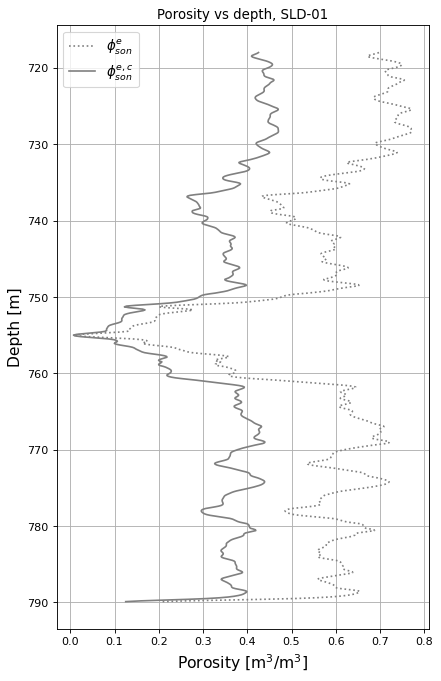

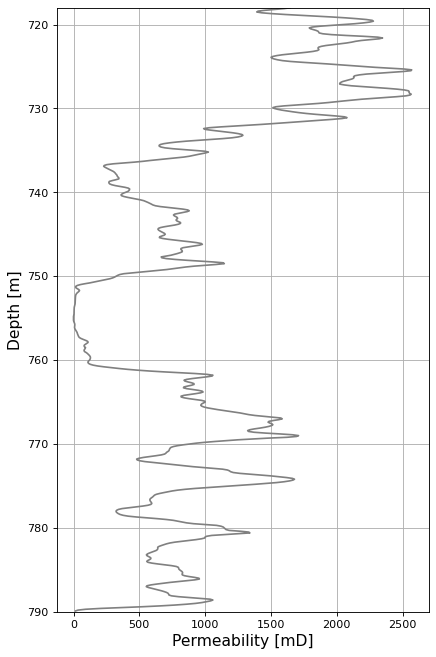

Mean K value = 927 mD
GRV = 71.90 m, Net sand = 58.30 m, Net sand frac = 0.81


In [199]:
" Petrophysics in SLD-01 well "

## Depth
MD = MD_SLD[2:-1]                            # Depth column without header [m]

# Top, middle and bottom boundaries and corresponding indeces
LMU = 718                                    # !! Late Miocene Unconformity [m depth]
index_LMU = int(np.where(MD==LMU)[0])
MMU = 751                                    # !! Mid Miocene Unconformity [m depth]
index_MMU = int(np.where(MD==MMU)[0])
EMU = 790                                    # !! Early Miocene Unconformity [m depth]
index_EMU = int(np.where(MD==EMU)[0])

MD_sld = MD[index_LMU:index_EMU]

## GR log
GR   = GR_SLD[2:-1]
GR   = GR[index_LMU:index_EMU]
# Vclay calculation
GRss = 20                               # Minimum GR reading
GRsh = max(GR)                               # Maximum GR reading
GRI  = (GR - GRss) / (GRsh - GRss)           # Gamma ray index
#Vcl_sld  = GRI                                   # Assuming linear relationship
Vcl_sld = GRI / (3 - 2*GRI)                  # Assuming Stieber


## Sonic log
DT_full = DT_SLD[2:-1]                       # DT column without header [m]
DT = DT_full[index_LMU:index_EMU]
# Calculate sonic porosity (PHIS)
DTm   = 56                                   # Matrix transit time [micro s/ft]
DTf   = 186                                  # !! Fluid transit time [micro s/ft]
DTsh  = 164                                  # !! Transit time trough underlying shale formation [micro s/ft]
DTcsh = 100                                  # Compacted shale transit time [micro s/ft]
Cp    = DTsh / DTcsh
PHIS  = (DT - DTm)/(DTf - DTm)               # Sonic porosity
PHISE = PHIS - Vcl_sld*(DTsh - DTm)/(DTf - DTm)  # Effective Sonic porosity
PHISE_cor = PHISE*(1/Cp)                     # Sonic porosity, corrected for compaction
for i in range(len(PHISE_cor)):
    if PHISE_cor[i] < 0:
        PHISE_cor[i] = 0
    if PHISE_cor[i] > 0.48:
        PHISE_cor[i] = 0.481

# Plot porosity vs depth
plt.figure(2, figsize = (6,10), dpi=80)
#plt.plot(PHIS,MD[index_LMU:index_EMU], label = '$\phi_{son}$')
plt.plot(PHISE,MD[index_LMU:index_EMU], ':', c = 'grey', label = '$\phi_{son}^{e}$')
plt.plot(PHISE_cor,MD[index_LMU:index_EMU],  c = 'grey', label = '$\phi_{son}^{e,c}$')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]', fontsize = 14)
plt.xlabel('Porosity [m$^3$/m$^3$]', fontsize = 14)
plt.title('SLD-01', fontsize = 14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

## Permeability
sph = 0.58                                   # Sphericity, chosen as constant from literature (Rorato et al., 2019)
i_top = np.where(LMU>M_smooth)[0][0]         # Index grain size at top 
i_bot = np.where(EMU>M_smooth)[0][0]          # Index grain size at bottom
Dpmax = xnew_M[i_top]                        # Grain size at top of this well, based on top depth (um)
Dpmin = xnew_M[i_bot]                        # Grain size at bot of this well, based on bottom depth (um)
Dp    = np.linspace(Dpmax,Dpmin,len(PHISE_cor)) # !! Grain sizes over depth interval in this well (um)
K = np.zeros(len(PHISE_cor))                     # Initiate permeability (mD)
K2 = np.zeros(len(PHISE_cor))
for i in range(len(PHISE_cor)):
    K[i] = sph**2 * (PHISE_cor[i]**3 * (Dp[i]/1e6)**2) / (150*(1-PHISE_cor[i])**2)*1.01324997e15   # !! Calculate perm trough Kozeny-Carman with Darcy (mD)
    K2[i] = sph**2 * (PHISE_cor[i]**3 * (Dp[i]/1e6)**2) / (150*(1-PHISE_cor[i])**2)*1.01324997e15
    if PHISE_cor[i] > 0.48:
        K[i] = 'nan'
        K2[i] = 'nan'
        
# Plot permeability vs depth
plt.figure(2, figsize = (6,10), dpi=80)
plt.plot(K,MD[index_LMU:index_EMU], c = 'grey')
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]', fontsize=14)
plt.xlabel('Permeability [mD]', fontsize=14)
plt.title('SLD-01', fontsize = 14)
plt.ylim(EMU,LMU)
plt.grid()
plt.show()

K_avg = int(np.mean(K))
print('Mean K value = ' + str(K_avg) + ' mD')

## Net sand
MD_steps = np.zeros(len(MD_sld))  # !!
for i in range(0,len(MD_sld)-1):  # !!
    MD_steps[i] = MD_sld[i+1] - MD_sld[i]   # !!   # Make array of each depth entry and its depth increase
GRV = sum(MD_steps)                                # Safe GRV for this well. Used later for fraction

for i in range(len(MD_sld)):  # !!
    if PHISE_cor[i] < 0.15 or Vcl_sld[i] > 0.35: #!! # Define porosity and Vcl cutoff
        MD_steps[i] = 0                            # Apply cutoffs

MD_net = sum(MD_steps)                             # Compute net sand value
MD_netfrac = MD_net / GRV                          # Compute net sand fraction

# Print outcome
print('GRV =', "%.2f" % GRV, 'm, Net sand =', "%.2f" % MD_net, 'm, Net sand frac =', "%.2f" % MD_netfrac)
# Compute export net sand
Net_exp = MD_steps
for i in range(len(MD_steps)):
    if MD_steps[i] > 0:
        Net_exp[i] = 1                           # Create array where included cells are 1 and excluded cells 0

## New permeability for non reservoir rock
for i in range(len(Net_exp)):
    if Net_exp[i] == 0:
        K2[i] = 10 
        
## Export to las file
MD_final = np.zeros(len(K))
PHISE_exp = np.zeros(len(K))
for i in range(len(K)):
    MD_final[i] = MD[index_LMU:index_EMU][i] # !!
    PHISE_exp[i] = PHISE_cor[i]

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Phi eff', PHISE_exp, unit = 'm3/m3', descr = 'Porosity') # !!
las.add_curve('Perm', K,   unit = 'mD',    descr = 'Permeability')
las.add_curve('NTG', Net_exp, unit = ' ', descr = 'NTG')
las.write('SLD_01_porperm.las', version=2) # !!

In [200]:
phi_sld = PHISE_cor

las = lasio.LASFile()
las.add_curve('DEPTH',MD_final, unit = 'm')
las.add_curve('Perm', K2,   unit = 'mD',    descr = 'Permeability')
las.write('SLD_01_porperm2.las', version=2) # !!

[nan nan nan nan nan 69. 64. 62. 69. 74. 72. nan 64. nan 65. nan 63. nan
 57. nan 55. nan 53. nan 51. 52.]


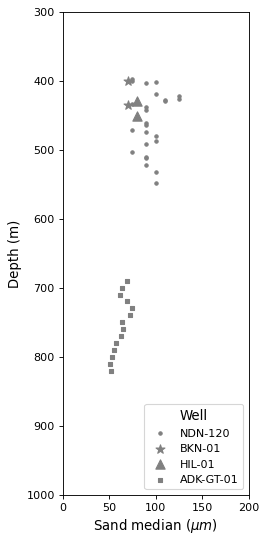

At 500 m depth, sand median = 85 um


In [7]:
"Grain size calculation"
file_loc = 'ADK-GT-01-content.xlsx'

MD_import_ADK    = pd.read_excel(file_loc, sheet_name = 'ADK', index_col=None, na_values=['NA'], usecols="A").to_numpy()
D50_import_ADK   = pd.read_excel(file_loc, sheet_name = 'ADK', index_col=None, na_values=['NA'], usecols="H").to_numpy()
MD_import_ADK    = MD_import_ADK[2:-4]
D50_import_ADK   = D50_import_ADK[2:-4]

MD_ADK = np.zeros(len(MD_import_ADK))
D50_ADK = np.zeros(len(D50_import_ADK))
for i in range(len(MD_import_ADK)):
    MD_ADK[i] = MD_import_ADK[i]
    D50_ADK[i]   = D50_import_ADK[i]


print(D50_ADK)
# Colijnsplaat well
depth_col = np.array([89, 92, 100, 110, 120, 130, 140, 150, 160])
M50_col   = np.array([200, 195, 180, 150, 130, 120, 115, 110, 100])

# Goirle well
depth_go = np.array([110, 115, 154, 215, 278, 287, 329])
M50_go   = np.array([223, 204, 154, 169, 128, 128, 105])

# NDN-120 well
depth_ndn = np.array([398, 400, 402, 404, 420, 422, 426, 428, 430, 434, 438, 442, 462, 464, 472, 474, 480, 488, 492, 504, 510,
                     512, 522, 532, 548])
M50_ndn   = np.array([75, 75, 100, 90, 100, 125, 125, 110, 110, 75, 90, 90, 90, 90, 75, 90, 100, 100, 90, 75, 90, 
                      90, 90, 100, 100])

# SMG-01 well
depth_smg = np.array([620, 810, 986, 1030, 1090])
M50_smg   = np.array([46, 73, 96, 42, 46])

# HIL-01 well
depth_hil = np.array([430, 451])
M50_hil   = np.array([80, 80])

# BKN-01 well
depth_bkn = np.array([401, 436])
M50_bkn   = np.array([70, 70])

# Make min and max lines
depth_U = np.array([1000, 750, 600, 500, 420,  200])
M50_U   = np.array([85, 95, 105, 115, 130, 160])

depth_L = np.array([1000,620,401, 200])
M50_L   = np.array([50 ,55,65, 100])

# Make smooth max and min line
xnew_U = np.linspace(min(M50_U), max(M50_U), 3000) 
spl_U = make_interp_spline(M50_U, depth_U, k=2)  # type: BSpline
U_smooth = spl_U(xnew_U)
xnew_L = np.linspace(min(M50_L), max(M50_L), 3000) 
spl_L = make_interp_spline(M50_L, depth_L, k=1)  # type: BSpline
L_smooth = spl_L(xnew_L)

xnew_M   = (xnew_U + xnew_L)/2
M_smooth = (U_smooth + L_smooth)/2

fig1 = plt.figure(2, figsize = (3,8), dpi=80)
#plt.plot(M50_col,depth_col, ':', c = 'grey')#, label = "Colijn.")
#plt.plot(M50_go,depth_go, '--' , c = 'grey')#, label = "Goirle")
plt.scatter(M50_ndn,depth_ndn, marker = '.',         color = 'grey', label = "NDN-120")
plt.scatter(M50_bkn,depth_bkn, marker = "*", s = 70, color = 'grey', label = "BKN-01")
plt.scatter(M50_hil,depth_hil, marker = "^", s = 70, color = 'grey', label = "HIL-01")  # https://matplotlib.org/3.5.0/api/markers_api.html#module-matplotlib.markers
plt.scatter(D50_ADK,MD_ADK   , marker = "s", s = 10, color = 'grey',label = "ADK-GT-01")
#plt.plot(M50_smg,depth_smg,      c = 'grey')#, label = "SMG-01")
#plt.plot(xnew_U, U_smooth, c = 'grey', alpha=0.3)
#plt.plot(xnew_L, L_smooth, c = 'grey', alpha=0.3)
#plt.plot(xnew_M, M_smooth, c = 'black', label = 'Average sand median')
plt.xlabel('Sand median ($\mu$$m$)', fontsize = 12)
plt.ylabel('Depth (m)', fontsize = 12)
#plt.ylabel(' ', fontsize = 12)
plt.ylim(300,1000)
plt.xlim(0,200)
plt.gca().invert_yaxis()
plt.legend(title = 'Well', title_fontsize = 12, loc = 'lower right')
#plt.legend()

plt.show()

fig1.savefig('M50.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


depth = 500
i = np.where(depth>M_smooth)[0][0]
M50 = int(xnew_M[i])
print('At', depth, 'm depth, sand median =' ,M50, 'um')

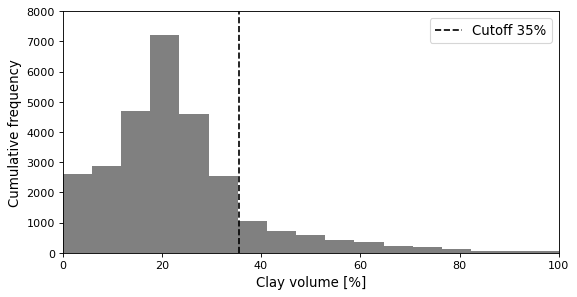

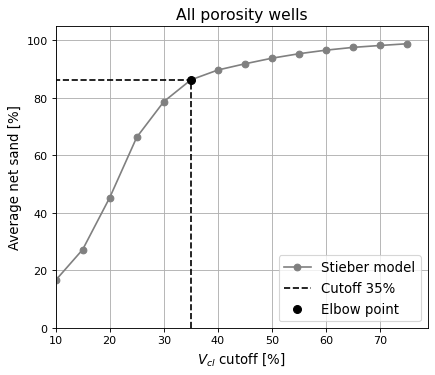

In [63]:
# Vclay cutoff

Vcl_tot = np.append(Vcl_ale, Vcl_krd)
Vcl_tot = np.append(Vcl_tot, Vcl_rst)
Vcl_tot = np.append(Vcl_tot, Vcl_ndn)
Vcl_tot = np.append(Vcl_tot, Vcl_wsp)
Vcl_tot = np.append(Vcl_tot, Vcl_bla)
Vcl_tot = np.append(Vcl_tot, Vcl_lel)
Vcl_tot = np.append(Vcl_tot, Vcl1)
Vcl_tot = np.append(Vcl_tot, Vcl2)
Vcl_tot = np.append(Vcl_tot, Vcl_zew)
Vcl_tot = np.append(Vcl_tot, Vcl_ofl)
Vcl_tot = np.append(Vcl_tot, Vcl_dro)
Vcl_tot = np.append(Vcl_tot, Vcl_nag)
Vcl_tot = np.append(Vcl_tot, Vcl_sld)
Vcl_tot = np.append(Vcl_tot, Vcl_epe)


MD_total = len(Vcl_tot)
MD_tot_abs= (MD_krd[-1] - MD_krd[0])   + (MD_ale[-1] - MD_ale[0]) + (MD_rst[-1] - MD_rst[0]) + (MD_ndn[-1] - MD_ndn[0])   \
        + (MD_wsp[-1] - MD_wsp[0])   + (MD_bla[-1] - MD_bla[0]) + (MD_lel[-1] - MD_lel[0]) + (MD_mid1[-1] - MD_mid1[0]) \
        + (MD_mid2[-1] - MD_mid2[0]) + (MD_zew[-1] - MD_zew[0]) + (MD_ofl[-1] - MD_ofl[0]) + (MD_dro[-1] - MD_dro[0])   \
        + (MD_nag[-1] - MD_nag[0])   + (MD_sld[-1] - MD_sld[0]) + (MD_epe[-1] - MD_epe[0])

MD_10  = np.ones(len(Vcl_tot))
MD_15  = np.ones(len(Vcl_tot))
MD_20  = np.ones(len(Vcl_tot))
MD_25  = np.ones(len(Vcl_tot))
MD_30  = np.ones(len(Vcl_tot))
MD_35  = np.ones(len(Vcl_tot))
MD_40  = np.ones(len(Vcl_tot))
MD_45  = np.ones(len(Vcl_tot))
MD_50  = np.ones(len(Vcl_tot))
MD_55  = np.ones(len(Vcl_tot))
MD_60  = np.ones(len(Vcl_tot))
MD_65  = np.ones(len(Vcl_tot))
MD_70  = np.ones(len(Vcl_tot))
MD_75  = np.ones(len(Vcl_tot))

for i in range(len(Vcl_tot)):
    if Vcl_tot[i] < 0:
        Vcl_tot[i] = 0
    if Vcl_tot[i] >= 0.10:
        MD_10[i] = 0
    if Vcl_tot[i] >= 0.15:
        MD_15[i] = 0
    if Vcl_tot[i] >= 0.20:
        MD_20[i] = 0
    if Vcl_tot[i] >= 0.25:
        MD_25[i] = 0
    if Vcl_tot[i] >= 0.30:
        MD_30[i] = 0
    if Vcl_tot[i] >= 0.35:
        MD_35[i] = 0
    if Vcl_tot[i] >= 0.40:
        MD_40[i] = 0
    if Vcl_tot[i] >= 0.45:
        MD_45[i] = 0
    if Vcl_tot[i] >= 0.50:
        MD_50[i] = 0
    if Vcl_tot[i] >= 0.55:
        MD_55[i] = 0
    if Vcl_tot[i] >= 0.60:
        MD_60[i] = 0
    if Vcl_tot[i] >= 0.65:
        MD_65[i] = 0
    if Vcl_tot[i] >= 0.70:
        MD_70[i] = 0
    if Vcl_tot[i] >= 0.75:
        MD_75[i] = 0

MD_net_10 = sum(MD_10)/MD_total*100   # net MD with Vcl cutoff of 0.10
MD_net_15 = sum(MD_15)/MD_total*100   # net MD with Vcl cutoff of 0.15
MD_net_20 = sum(MD_20)/MD_total*100   # ""
MD_net_25 = sum(MD_25)/MD_total*100   # ...
MD_net_30 = sum(MD_30)/MD_total*100
MD_net_35 = sum(MD_35)/MD_total*100
MD_net_40 = sum(MD_40)/MD_total*100
MD_net_45 = sum(MD_45)/MD_total*100
MD_net_50 = sum(MD_50)/MD_total*100
MD_net_55 = sum(MD_55)/MD_total*100
MD_net_60 = sum(MD_60)/MD_total*100
MD_net_65 = sum(MD_65)/MD_total*100
MD_net_70 = sum(MD_70)/MD_total*100
MD_net_75 = sum(MD_75)/MD_total*100
Vcl_cutoffs = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])
MD_nets   = np.array([MD_net_10, MD_net_15, MD_net_20, MD_net_25, MD_net_30, MD_net_35, MD_net_40, MD_net_45, MD_net_50, MD_net_55, MD_net_60, MD_net_65, MD_net_70, MD_net_75])   # All net MD cutoffs together


# Cutoff line for histogram plotting
y = np.array([0, 9000])
x = np.array([35.5, 35.5])

## Plot histogram
fig1 = plt.figure(1, figsize = (8,4), dpi=80)
plt.hist(Vcl_tot*100, 17, color = 'grey')
plt.plot(x,y, '--', color= 'black', label = 'Cutoff 35%')
plt.xlabel("Clay volume [%]",fontsize=12)
plt.ylabel("Cumulative frequency",fontsize=12)
plt.xlim(0,100)
plt.ylim(0,8000)
plt.legend(fontsize = 12)
plt.show()
fig1.savefig('Vcl_hist.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

# Elbow point lines
elbowy = np.array([0, MD_net_35])
elbowx = np.array([35, 35])
pointx = 35
pointy = MD_net_35
netsandx = np.array([0,35])
netsandy = np.array([MD_net_35,MD_net_35])

## Plot Vcl cutoff vs net sand column
fig2 = plt.figure(2, figsize = (6,5), dpi=80)
plt.plot(Vcl_cutoffs,MD_nets, '-o', color = 'grey', label = 'Stieber model')
plt.plot(elbowx,elbowy, '--', color = 'black', label = 'Cutoff 35%')
plt.plot(netsandx,netsandy, '--', color = 'black')
plt.scatter(pointx,pointy, c = 'black', s = 50, label = 'Elbow point', zorder = 10)
plt.xlabel('$V_{cl}$ cutoff [%]', fontsize = 12)
plt.ylabel('Average net sand [%]', fontsize = 12)
plt.title('All porosity wells', fontsize = 14)
plt.ylim(0,105)
plt.xlim(10)
plt.grid()
plt.legend(loc = 'lower right', fontsize = 12)
plt.show()
fig2.savefig('Vcl_tot_cutoff.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

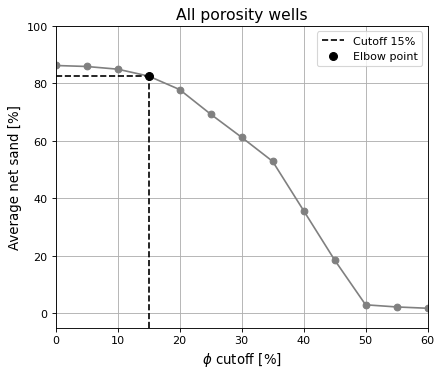

C:\Progra~1\Anaconda\lib\site-packages\numpy\lib\histograms.py:836: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Progra~1\Anaconda\lib\site-packages\numpy\lib\histograms.py:837: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


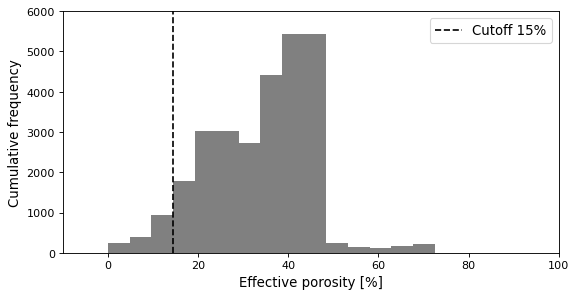

In [66]:
# Porosity cutoff
phi_tot = np.append(phi_ale, phi_krd)
phi_tot = np.append(phi_tot, phi_rst)
phi_tot = np.append(phi_tot, phi_ndn)
phi_tot = np.append(phi_tot, phi_wsp)
phi_tot = np.append(phi_tot, phi_bla)
phi_tot = np.append(phi_tot, phi_lel)
phi_tot = np.append(phi_tot, phi_mid1)
phi_tot = np.append(phi_tot, phi_mid2)
phi_tot = np.append(phi_tot, phi_zew)
phi_tot = np.append(phi_tot, phi_ofl)
phi_tot = np.append(phi_tot, phi_dro)
phi_tot = np.append(phi_tot, phi_nag)
phi_tot = np.append(phi_tot, phi_sld)
phi_tot = np.append(phi_tot, phi_epe)
MDp_total = len(phi_tot)

# Initiate
MDp_00    = np.ones(len(phi_tot))  
MDp_05    = np.ones(len(phi_tot))  
MDp_10    = np.ones(len(phi_tot))  
MDp_15    = np.ones(len(phi_tot))
MDp_20    = np.ones(len(phi_tot))
MDp_25    = np.ones(len(phi_tot))
MDp_30    = np.ones(len(phi_tot))
MDp_35    = np.ones(len(phi_tot))
MDp_40    = np.ones(len(phi_tot))
MDp_45    = np.ones(len(phi_tot))
MDp_50    = np.ones(len(phi_tot))
MDp_55    = np.ones(len(phi_tot))
MDp_60    = np.ones(len(phi_tot))
MDp_65    = np.ones(len(phi_tot))
MDp_70    = np.ones(len(phi_tot))
MDp_75    = np.ones(len(phi_tot))
#MDp_total = len(MD[index_LMU:index_TD])

for i in range(len(phi_tot)):  # !!
    if phi_tot[i] <= 0 or Vcl_tot[i] > 0.35:
        MDp_00[i] = 0
    if phi_tot[i] <= 0.05 or Vcl_tot[i] > 0.35:
        MDp_05[i] = 0
    if phi_tot[i] <= 0.10 or Vcl_tot[i] > 0.35:
        MDp_10[i] = 0
    if phi_tot[i] <= 0.15 or Vcl_tot[i] > 0.35:
        MDp_15[i] = 0
    if phi_tot[i] <= 0.20 or Vcl_tot[i] > 0.35:
        MDp_20[i] = 0
    if phi_tot[i] <= 0.25 or Vcl_tot[i] > 0.35:
        MDp_25[i] = 0
    if phi_tot[i] <= 0.30 or Vcl_tot[i] > 0.35:
        MDp_30[i] = 0
    if phi_tot[i] <= 0.35 or Vcl_tot[i] > 0.35:
        MDp_35[i] = 0
    if phi_tot[i] <= 0.40 or Vcl_tot[i] > 0.35:
        MDp_40[i] = 0
    if phi_tot[i] <= 0.45 or Vcl_tot[i] > 0.35:
        MDp_45[i] = 0
    if phi_tot[i] <= 0.50 or Vcl_tot[i] > 0.35:
        MDp_50[i] = 0
    if phi_tot[i] <= 0.55 or Vcl_tot[i] > 0.35:
        MDp_55[i] = 0
    if phi_tot[i] <= 0.60 or Vcl_tot[i] > 0.35:
        MDp_60[i] = 0
    if phi_tot[i] <= 0.65 or Vcl_tot[i] > 0.35:
        MDp_65[i] = 0
    if phi_tot[i] <= 0.70 or Vcl_tot[i] > 0.35:
        MDp_70[i] = 0
    if phi_tot[i] <= 0.75 or Vcl_tot[i] > 0.35:
        MDp_75[i] = 0

MDp_net_00 = sum(MDp_00)/MDp_total*100 
MDp_net_05 = sum(MDp_05)/MDp_total*100 
MDp_net_10 = sum(MDp_10)/MDp_total*100 
MDp_net_15 = sum(MDp_15)/MDp_total*100   
MDp_net_20 = sum(MDp_20)/MDp_total*100   
MDp_net_25 = sum(MDp_25)/MDp_total*100   
MDp_net_30 = sum(MDp_30)/MDp_total*100 
MDp_net_35 = sum(MDp_35)/MDp_total*100 
MDp_net_40 = sum(MDp_40)/MDp_total*100 
MDp_net_45 = sum(MDp_45)/MDp_total*100 
MDp_net_50 = sum(MDp_50)/MDp_total*100 
MDp_net_55 = sum(MDp_55)/MDp_total*100 
MDp_net_60 = sum(MDp_60)/MDp_total*100 
MDp_net_65 = sum(MDp_65)/MDp_total*100 
MDp_net_70 = sum(MDp_70)/MDp_total*100 
MDp_net_75 = sum(MDp_75)/MDp_total*100 
#if MDp_net_50 < 0:
#    MDp_net_50 = 0
#if MDp_net_55 < 0:
#    MDp_net_55 = 0
#if MDp_net_60 < 0:
#    MDp_net_60 = 0
#if MDp_net_65 < 0:
#    MDp_net_65 = 0
#if MDp_net_70 < 0:
#    MDp_net_70 = 0
#if MDp_net_75 < 0:
#    MDp_net_75 = 0


    
MDp_nets   = np.array([MDp_net_00, MDp_net_05, MDp_net_10, MDp_net_15, MDp_net_20, MDp_net_25, MDp_net_30, MDp_net_35, MDp_net_40, MDp_net_45, MDp_net_50, MDp_net_55, MDp_net_60])   # All net MD cutoffs together

RHOPE_cutoffs = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
elbowpx = np.array([15, 15])
elbowpy = np.array([-5, MDp_net_15])
netrespx = np.array([0, 15])
netrespy = np.array([MDp_net_15,MDp_net_15])
pointpx = 15
pointpy = MDp_net_15

fig1 = plt.figure(1, figsize = (6,5), dpi=80)
plt.plot(RHOPE_cutoffs, MDp_nets, '-o', color = 'grey')
plt.plot(elbowpx,elbowpy, '--', color = 'black', label = 'Cutoff 15%')
plt.plot(netrespx, netrespy, '--', color = 'black')
plt.scatter(pointpx, pointpy, c = 'black', s = 50, label = 'Elbow point', zorder = 10)
plt.xlabel('$\phi$ cutoff [%]', fontsize = 12)
plt.ylabel('Average net sand [%]', fontsize = 12)
plt.ylim(-5,100)
plt.xlim(0,60)
plt.title('All porosity wells', fontsize = 14)
plt.legend()
plt.grid()
plt.show()
fig1.savefig('phi_tot_cutoff.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

# Cutoff line for histogram plotting
yp = np.array([0, 9000])
xp = np.array([14.5, 14.5])

fig2 = plt.figure(2, figsize = (8,4), dpi=80)
plt.hist(phi_tot*100, 15, color = 'grey')
plt.plot(xp,yp, '--', color= 'black', label = 'Cutoff 15%')
plt.xlabel("Effective porosity [%]",fontsize=12)
plt.ylabel("Cumulative frequency",fontsize=12)
plt.xlim(-10,100)
plt.ylim(0,6000)
plt.legend(fontsize = 12)
plt.show()
fig2.savefig('phi_hist.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')